In [788]:
import numpy as np
import pandas as pd

In [789]:
years = [str(i) for i in range(1993, 2022)]
monthes = ['06', '11']
file_path = 'data/TOP500_lists/TOP500_{}.{}'

data = dict()
for year in years:
    for month in monthes:
        date_string = year + month
        suffix = 'xls'
        if (date_string > '2020'):
            suffix = 'xlsx'
        data[year + '/' + month] = pd.read_excel(file_path.format(date_string, suffix))

In [790]:
data['2002/11']

Rank                                    Site     Manufacturer  \
0       1              The Earth Simulator Center              NEC   
1       2          Los Alamos National Laboratory  Hewlett-Packard   
2       3          Los Alamos National Laboratory  Hewlett-Packard   
3       4  Lawrence Livermore National Laboratory              IBM   
4       5  Lawrence Livermore National Laboratory    Linux Networx   
..    ...                                     ...              ...   
495   496                              Government  Hewlett-Packard   
496   497                              Government  Hewlett-Packard   
497   498                              Government  Hewlett-Packard   
498   499                              Government  Hewlett-Packard   
499   500                          LG-EDS Systems  Hewlett-Packard   

                                      Computer         Country  Year  \
0                              Earth-Simulator           Japan  2002   
1          ASCI Q - AlphaServer SC45, 1.25 GHz   United States  2002   
2          ASCI Q - AlphaServer SC45, 1.25 GHz   United States  2002   
3                ASCI White, SP Power3 375 MHz   United States  2000   
4    MCR Linux Cluster Xeon 2.4 GHz - Quadrics   United States  2002   
..                                         ...             ...   ...   
495                        SuperDome/HyperPlex  United Kingdom  2001   
496                        SuperDome/HyperPlex  United Kingdom  2001   
497                        SuperDome/HyperPlex  United Kingdom  2001   
498                        SuperDome/HyperPlex  United Kingdom  2001   
499                        SuperDome/HyperPlex    Korea, South  2001   

     Processors     RMax    RPeak     Nmax   Nhalf Processor Family  \
0          5120  35860.0  40960.0  1075200  266240              NEC   
1          4096   7727.0  10240.0   590000  126100            Alpha   
2          4096   7727.0  10240.0   590000  126100            Alpha   
3          8192   7226.0  12288.0   518096  179000            Power   
4          2304   5694.0  11060.0   450000   90000      Intel IA-32   
..          ...      ...      ...      ...     ...              ...   
495         128    195.8    281.6        0       0          PA-RISC   
496         128    195.8    281.6        0       0          PA-RISC   
497         128    195.8    281.6        0       0          PA-RISC   
498         128    195.8    281.6        0       0          PA-RISC   
499         128    195.8    281.6        0       0          PA-RISC   

                      Processor  Proc. Frequency            System Family  \
0                           NEC           1000.0               NEC Vector   
1                         Alpha           1250.0     HP AlphaServer SC/GS   
2                         Alpha           1250.0     HP AlphaServer SC/GS   
3                        POWER3            375.0                   IBM SP   
4    Intel IA-32 Pentium 4 Xeon           2400.0  Linux Networx Evolocity   
..                          ...              ...                      ...   
495             PA-RISC PA-8600            549.5             HP Superdome   
496             PA-RISC PA-8600            549.5             HP Superdome   
497             PA-RISC PA-8600            549.5             HP Superdome   
498             PA-RISC PA-8600            549.5             HP Superdome   
499             PA-RISC PA-8600            549.5             HP Superdome   

    Operating System    Architecture     Segment     Application Area  \
0           Super-UX             MPP    Research          Environment   
1         Tru64 UNIX         Cluster    Research        Not Specified   
2         Tru64 UNIX         Cluster    Research        Not Specified   
3                AIX             MPP    Research        Not Specified   
4              Linux         Cluster    Research        Not Specified   
..               ...             ...         ...                  ...   
495  HP Un

In [791]:
def get_removed(prev_set, cur_set):
    res = []
    for x in prev_set:
        if x not in cur_set:
            res.append(x)
    
    return res

def get_added(prev_set, cur_set):
    res = []
    for x in cur_set:
        if x not in prev_set:
            res.append(x)
    
    return res

prev_set = set()
for date_string in data:
    cur_set = set(map(str, data[date_string].columns))
    removed_columns = get_removed(prev_set, cur_set)
    added_columns = get_added(prev_set, cur_set)
    if removed_columns or added_columns:
        print('[{}]'.format(date_string))
    if removed_columns:
        print('\nREMOVED COLUMNS:', '\n'.join(removed_columns), sep='\n', end='\n')
    if added_columns:
        print('\nADDED COLUMNS:', '\n'.join(added_columns), sep='\n', end='\n')
    if removed_columns or added_columns:
        print('=' * 20)
    prev_set = cur_set

[1993/06]

ADDED COLUMNS:
Continent
Processor Family
Processors
Operating System
Region
Nhalf
Rank
Manufacturer
Interconnect
Proc. Frequency
System Family
Nmax
RPeak
Segment
RMax
Site
Architecture
Year
Interconnect Family
Processor
Country
Application Area
Computer
[2008/06]

ADDED COLUMNS:
Power
System Model
[2008/11]

REMOVED COLUMNS:
Processors

ADDED COLUMNS:
Cores
[2010/06]

ADDED COLUMNS:
Measured Size
Processor Cores
[2010/11]

REMOVED COLUMNS:
Measured Size
[2011/06]

ADDED COLUMNS:
Accelerator
[2011/11]

REMOVED COLUMNS:
Processor Family
Processor Cores
Cores
Proc. Frequency
RPeak
RMax
Application Area

ADDED COLUMNS:
Cores per Socket
Total Cores
Rpeak
Processor Speed (MHz)
Effeciency (%)
Rmax
Accelerator Cores
Name
OS Family
Processor Generation
Processor Technology
Mflops/Watt
[2012/06]

REMOVED COLUMNS:
Accelerator Cores
Accelerator

ADDED COLUMNS:
Accelerator/Co-Processor Cores
First Rank
First Appearance
Previous Rank
Accelerator/Co-Processor
[2012/11]

REMOVED COLUMNS:
E

## План:

1. Общая зависимость процессоров
    - Посмотреть на тренд компаний процессоров в топ10 компьютерах, топ50 и топ500
    - Посмотреть на тренд processor generation для компьютеров позже 201111
    - Посмотреть на тренд технологий процессоров в топ10, топ50 и топ500
    - Посмотреть на тренд количества ядер на процессор в топ5, топ50, топ500
    - Посмотреть на тренд общего количества ядер в топ10, топ50 и топ500
    - Посмотреть на тренд количества процессоров в топ10, топ50 и топ500
    - Посмотреть на тренд частоты процессоров в топ10, топ50 и топ500
    - Посмотреть на тренд архитектуры процессора в топ10, топ50 и топ500
    - Было бы круто посмотреть еще как развиваются технологии (нанометры), но для этого нужно собирать данные (можно купить заполнение)
2. Зависимость процессоров от местонахождения
    - Тренд местонахождения
    - Тренд компаний процессоров (рассматриваем все процессоры)
    - Тренд технологий процессоров (рассматриваем все процессоры)
3. Зависимость процессоров от поля деятельности
    - Тренд полей деятельности
    - Тренд компаний процессоров (рассматриваем все процессоры)
    - Тренд технологий процессоров (рассматриваем все процессоры)

## Тренд компаний процессоров

In [792]:
processor_technology_df = None
for date_string in data:
    # print(date_string)
    # processor_check = 'KSR'
    res = None
    if date_string < '2011/11':
        res = data[date_string].loc[:, ['Processor Family', 'RMax', 'RPeak', 'Rank']]
        res.rename(columns = {'Processor Family': 'Processor Technology', 
                              'RMax': 'Rmax', 
                              'RPeak': 'Rpeak'}, inplace = True)
        # try_print = data[date_string].loc[data[date_string]['Processor Family'] == processor_check, 'Processor']
    elif date_string < '2017/06':
        res = data[date_string].loc[:, ['Processor Technology', 'Rmax', 'Rpeak', 'Rank']]
        # try_print = data[date_string].loc[data[date_string]['Processor Technology'] == processor_check, 'Processor']
    else:
        res = data[date_string].loc[:, ['Processor Technology', 'Rmax [TFlop/s]', 'Rpeak [TFlop/s]', 'Rank']]
        # try_print = data[date_string].loc[data[date_string]['Processor Technology'] == processor_check, 'Processor']
        res.rename(columns = {'Rmax [TFlop/s]': 'Rmax', 'Rpeak [TFlop/s]': 'Rpeak'}, inplace = True)
    # print(try_print)

    res.loc[:, 'PubDate'] = date_string
    res.loc[:, 'PubYear'] = date_string[:4]
    res.loc[:, 'PubMonth'] = date_string[5:]
    if processor_technology_df is None:
        processor_technology_df = res
    else:
        processor_technology_df = pd.concat([processor_technology_df, res], ignore_index=True)

In [793]:
print('\': ,\n\''.join(np.unique(ans['Processor Technology'])))

AMD': ,
'AMD Zen (Naples)': ,
'AMD Zen-2 (Rome)': ,
'AMD Zen-3 (Milan)': ,
'AMD x86_64': ,
'Alpha': ,
'Cavium': ,
'Convex': ,
'Cray': ,
'Fujitsu': ,
'Fujitsu ARM': ,
'Hitachi': ,
'Hitachi SR8000': ,
'IBM3090': ,
'Intel Broadwell': ,
'Intel Cascade lake': ,
'Intel Core': ,
'Intel EM64T': ,
'Intel Haswell': ,
'Intel IA-32': ,
'Intel IA-64': ,
'Intel Ice Lake': ,
'Intel IvyBridge': ,
'Intel MIC': ,
'Intel Nehalem': ,
'Intel SandyBridge': ,
'Intel Skylake': ,
'Intel Westmere': ,
'Intel Xeon Phi': ,
'Intel i860': ,
'KSR': ,
'MIPS': ,
'Maspar': ,
'NEC': ,
'NEC Vector Engine': ,
'Others': ,
'PA-RISC': ,
'Power': ,
'PowerPC': ,
'ShenWei': ,
'Sparc': ,
'TMC CM2': ,
'ThunderX2': ,
'X86_64': ,
'ap1000': ,
'nCube


In [794]:
processor_technology_df

Processor Technology     Rmax    Rpeak  Rank  PubDate PubYear PubMonth
0                    Sparc    59.70   131.00     1  1993/06    1993       06
1                    Sparc    30.40    69.63     2  1993/06    1993       06
2                    Sparc    30.40    65.54     3  1993/06    1993       06
3                    Sparc    30.40    65.54     4  1993/06    1993       06
4                      NEC    23.20    25.60     5  1993/06    1993       06
...                    ...      ...      ...   ...      ...     ...      ...
28995      Intel Broadwell  1649.11  2119.68   496  2021/11    2021       11
28996      Intel Broadwell  1649.11  2119.68   497  2021/11    2021       11
28997      Intel Broadwell  1649.11  2119.68   498  2021/11    2021       11
28998      Intel Broadwell  1649.11  2119.68   499  2021/11    2021       11
28999      Intel Broadwell  1649.11  2119.68   500  2021/11    2021       11

[29000 rows x 7 columns]

In [795]:
TechnologyCompanyMap = {
    'AMD': 'AMD',
    'AMD Zen (Naples)': 'AMD',
    'AMD Zen-2 (Rome)': 'AMD',
    'AMD Zen-3 (Milan)': 'AMD',
    'AMD x86_64': 'AMD',
    'Alpha': 'DEC',
    'Cavium': 'Cavium',
    'Convex': 'Convex',
    'Cray': 'Cray',
    'Fujitsu': 'Fujitsu',
    'Fujitsu ARM': 'Fujitsu',
    'Hitachi': 'Hitachi',
    'Hitachi SR8000': 'Hitachi',
    'IBM3090': 'IBM',
    'Intel Broadwell': 'Intel',
    'Intel Cascade lake': 'Intel',
    'Intel Core': 'Intel',
    'Intel EM64T': 'Intel',
    'Intel Haswell': 'Intel',
    'Intel IA-32': 'Intel',
    'Intel IA-64': 'Intel',
    'Intel Ice Lake': 'Intel',
    'Intel IvyBridge': 'Intel',
    'Intel MIC': 'Intel',
    'Intel Nehalem': 'Intel',
    'Intel SandyBridge': 'Intel',
    'Intel Skylake': 'Intel',
    'Intel Westmere': 'Intel',
    'Intel Xeon Phi': 'Intel',
    'Intel i860': 'Intel',
    'KSR': 'KSR',
    'MIPS': 'MIPS',
    'Maspar': 'Maspar',
    'NEC': 'NEC',
    'NEC Vector Engine': 'NEC',
    'Others': 'Others',
    'PA-RISC': 'HP',
    'Power': 'IBM',
    'PowerPC': 'IBM',
    'ShenWei': 'Jiangnan Computing Lab',
    'Sparc': 'Sun Microsystems',
    'TMC CM2': 'TMC',
    'ThunderX2': 'Cavium',
    'X86_64': 'Hygon',
    'ap1000': 'Fujitsu',
    'nCube': 'nCube'  
}

processor_technology_df['Processor Company'] = processor_technology_df['Processor Technology'].copy()
processor_technology_df['Processor Company'] = processor_technology_df['Processor Company'].apply(
    lambda key: TechnologyCompanyMap[key])
processor_technology_df

Processor Technology     Rmax    Rpeak  Rank  PubDate PubYear PubMonth  \
0                    Sparc    59.70   131.00     1  1993/06    1993       06   
1                    Sparc    30.40    69.63     2  1993/06    1993       06   
2                    Sparc    30.40    65.54     3  1993/06    1993       06   
3                    Sparc    30.40    65.54     4  1993/06    1993       06   
4                      NEC    23.20    25.60     5  1993/06    1993       06   
...                    ...      ...      ...   ...      ...     ...      ...   
28995      Intel Broadwell  1649.11  2119.68   496  2021/11    2021       11   
28996      Intel Broadwell  1649.11  2119.68   497  2021/11    2021       11   
28997      Intel Broadwell  1649.11  2119.68   498  2021/11    2021       11   
28998      Intel Broadwell  1649.11  2119.68   499  2021/11    2021       11   
28999      Intel Broadwell  1649.11  2119.68   500  2021/11    2021       11   

      Processor Company  
0      Sun Microsystems  
1      Sun Microsystems  
2      Sun Microsystems  
3      Sun Microsystems  
4                   NEC  
...                 ...  
28995             Intel  
28996             Intel  
28997             Intel  
28998             Intel  
28999             Intel  

[29000 rows x 8 columns]

In [796]:
from tqdm.notebook import tqdm

def get_statistics_by_column(data, column, date_keys, top=500):
    columns = ['PubDate', 'PubYear', 'PubMonth']
    for unique_value in data[column].unique():
        columns.append(unique_value + ' %Rmax')
        columns.append(unique_value + ' %Rpeak')
        columns.append(unique_value + ' %Cnt')
    df = pd.DataFrame(columns=columns)
    for date in tqdm(date_keys):
        # print(date)
        values_dict = {'PubDate': date, 'PubYear': date[:4], 'PubMonth': date[5:]}
        sum_Rmax = data[(data['PubDate'] == date) & 
                        (data['Rank'] <= top)]['Rmax'].sum()
        # print(sum_Rmax)
        sum_Rpeak = data[(data['PubDate'] == date) & 
                         (data['Rank'] <= top)]['Rpeak'].sum()
        # print(sum_Rpeak)
        cnt = data[(data['PubDate'] == date) & 
                   (data['Rank'] <= top)].shape[0]
        for unique_value in data[column].unique():
            sum_Rmax_for_value = data[(data['PubDate'] == date) & 
                                      (data[column] == unique_value) & 
                                      (data['Rank'] <= top)]['Rmax'].sum()
            sum_Rpeak_for_value = data[(data['PubDate'] == date) & 
                                       (data[column] == unique_value) &
                                       (data['Rank'] <= top)]['Rpeak'].sum()
            cnt_for_value = data[(data['PubDate'] == date) & 
                                 (data[column] == unique_value) &
                                 (data['Rank'] <= top)].shape[0]
            # print(unique_value, ': ', sum_Rmax_for_value, sum_Rpeak_for_value, cnt_for_value)
            values_dict[unique_value + ' %Rmax'] = sum_Rmax_for_value / sum_Rmax
            values_dict[unique_value + ' %Rpeak'] = sum_Rpeak_for_value / sum_Rpeak
            values_dict[unique_value + ' %Cnt'] = cnt_for_value / cnt
        df = df.append(values_dict, ignore_index=True)
        # print('=' * 20)
    return df

In [797]:
pd.set_option("display.max_columns", 100)

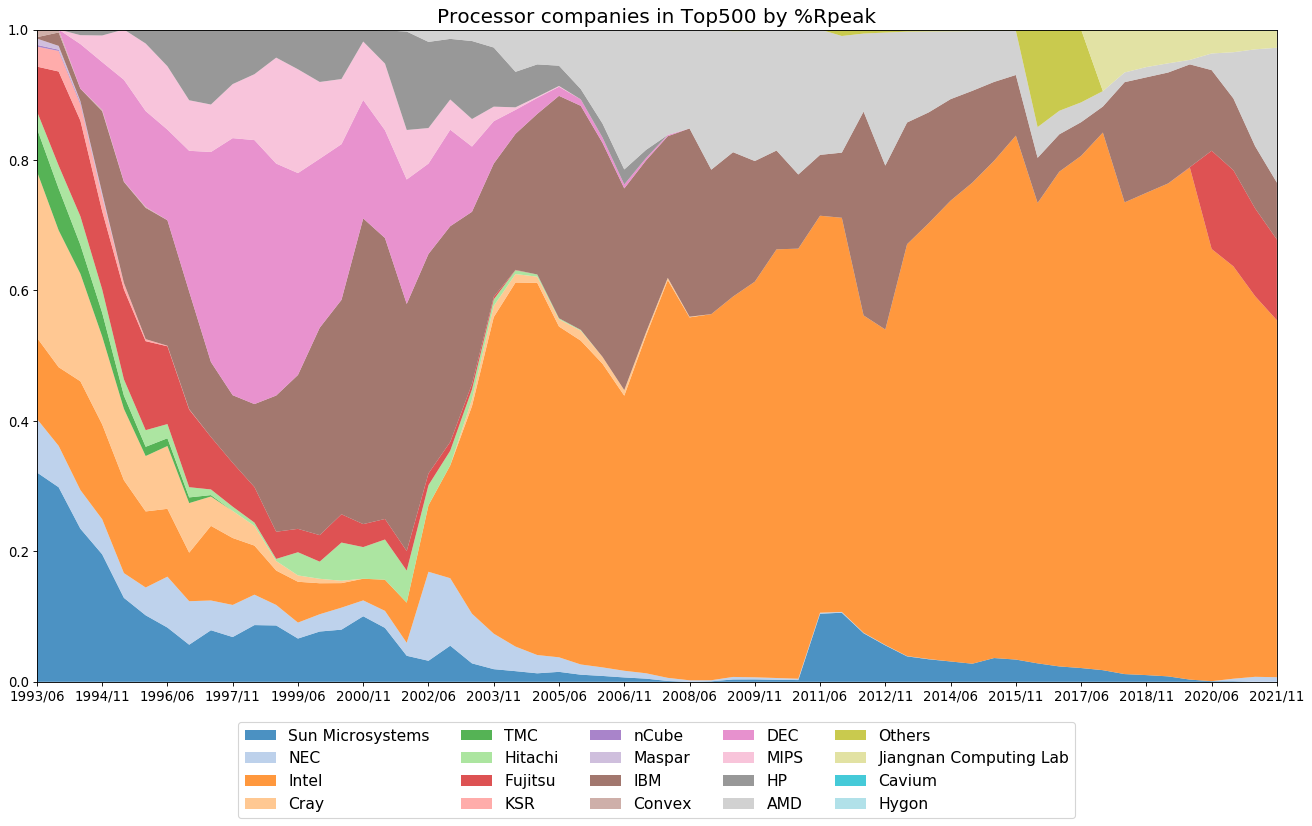

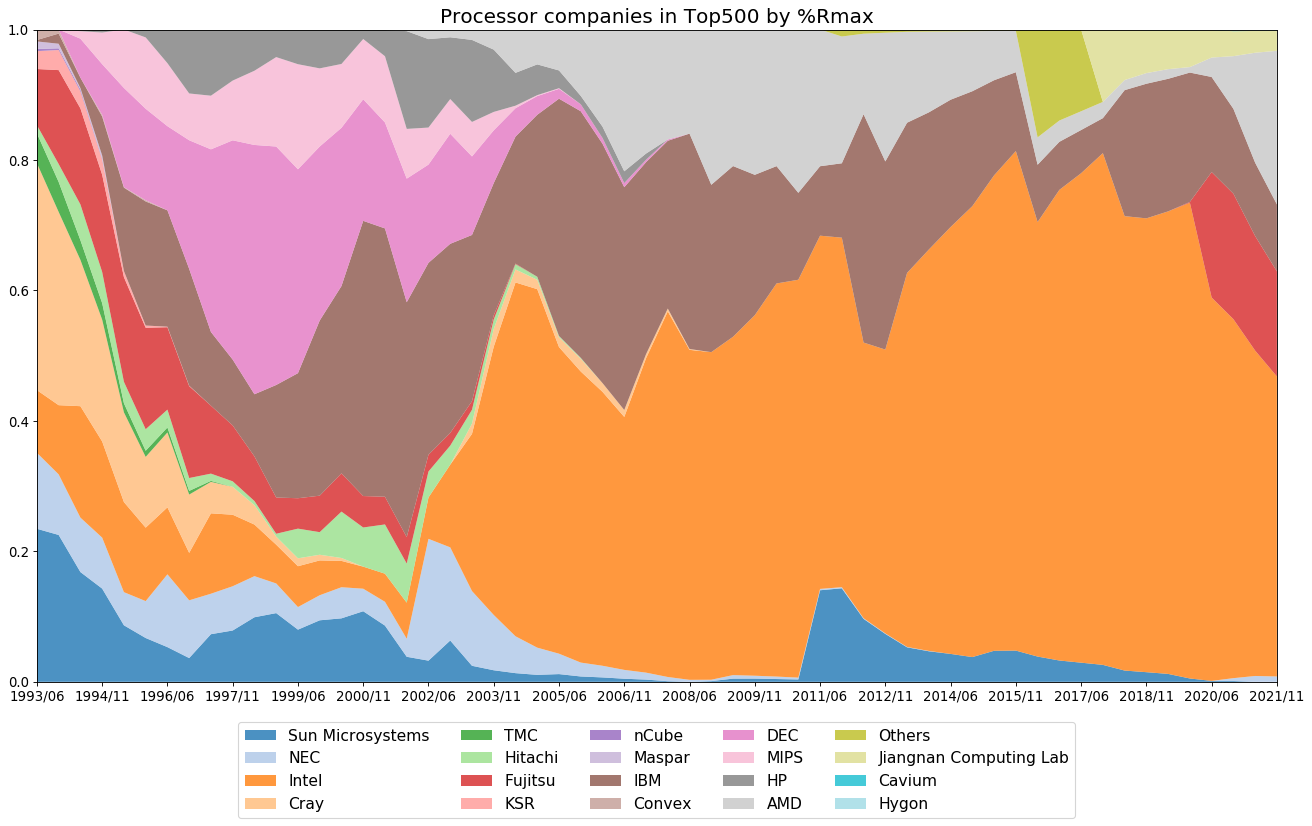

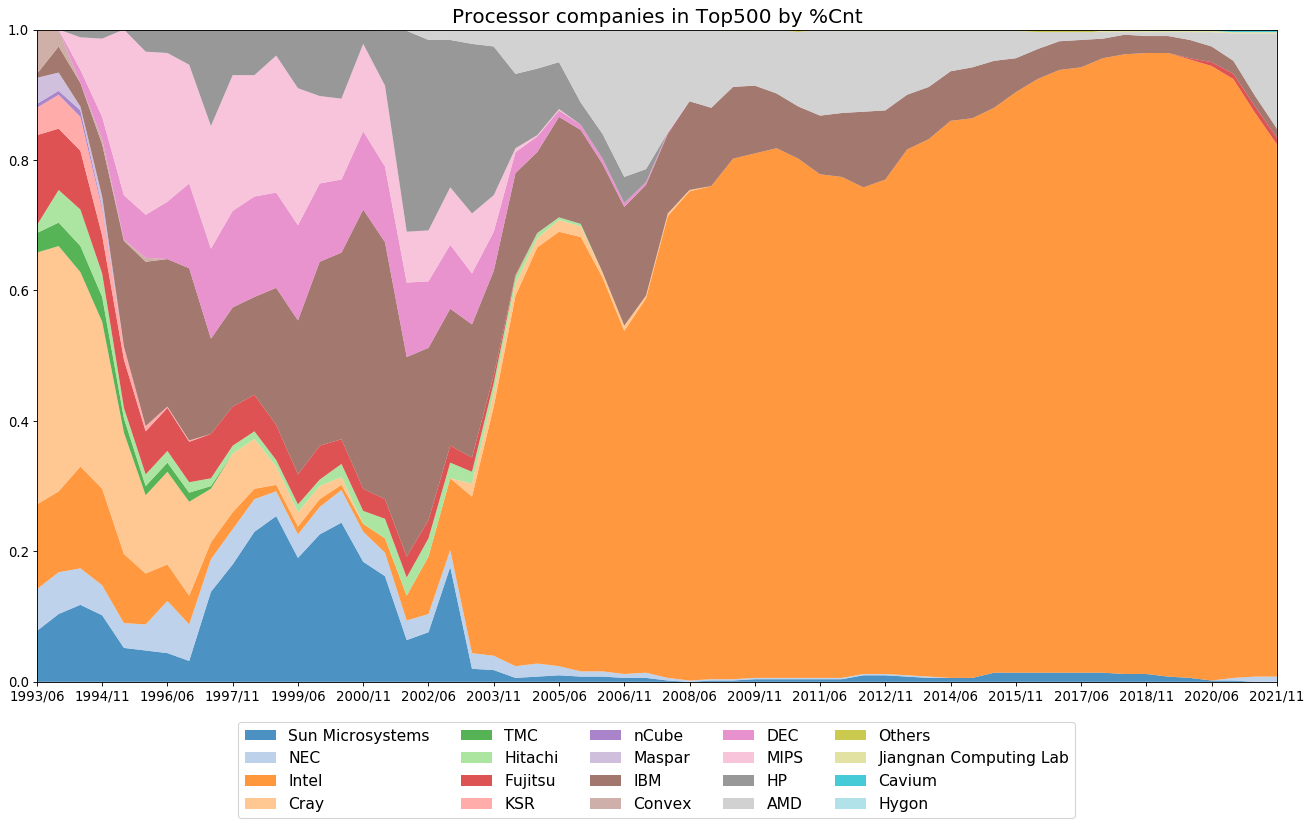

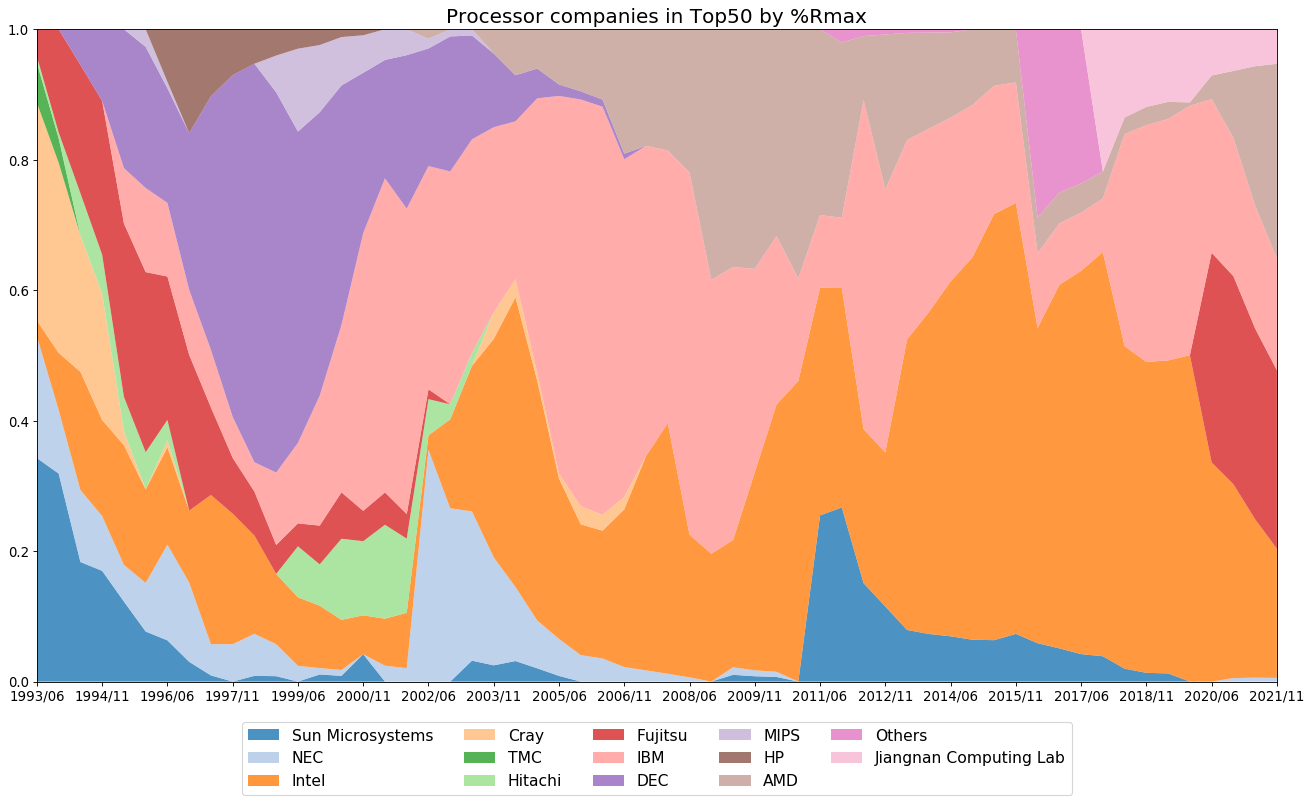

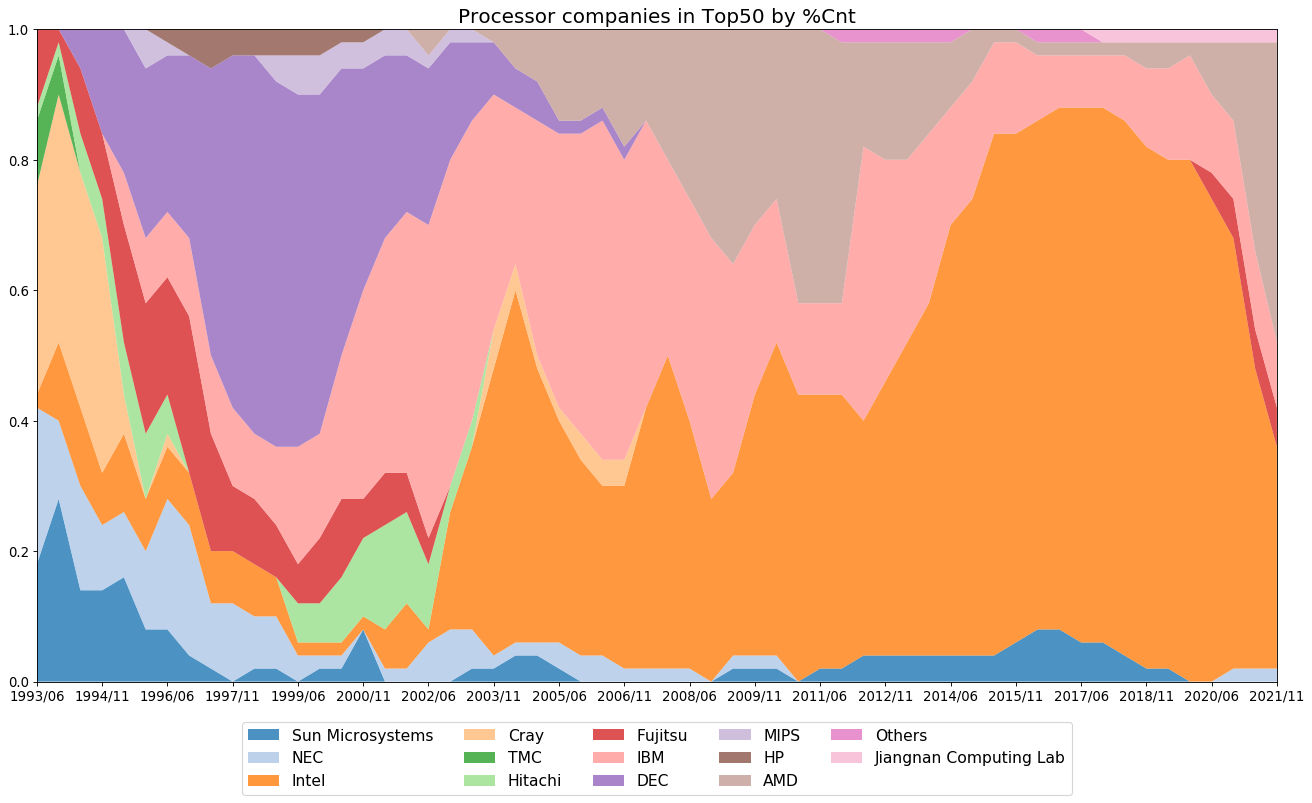

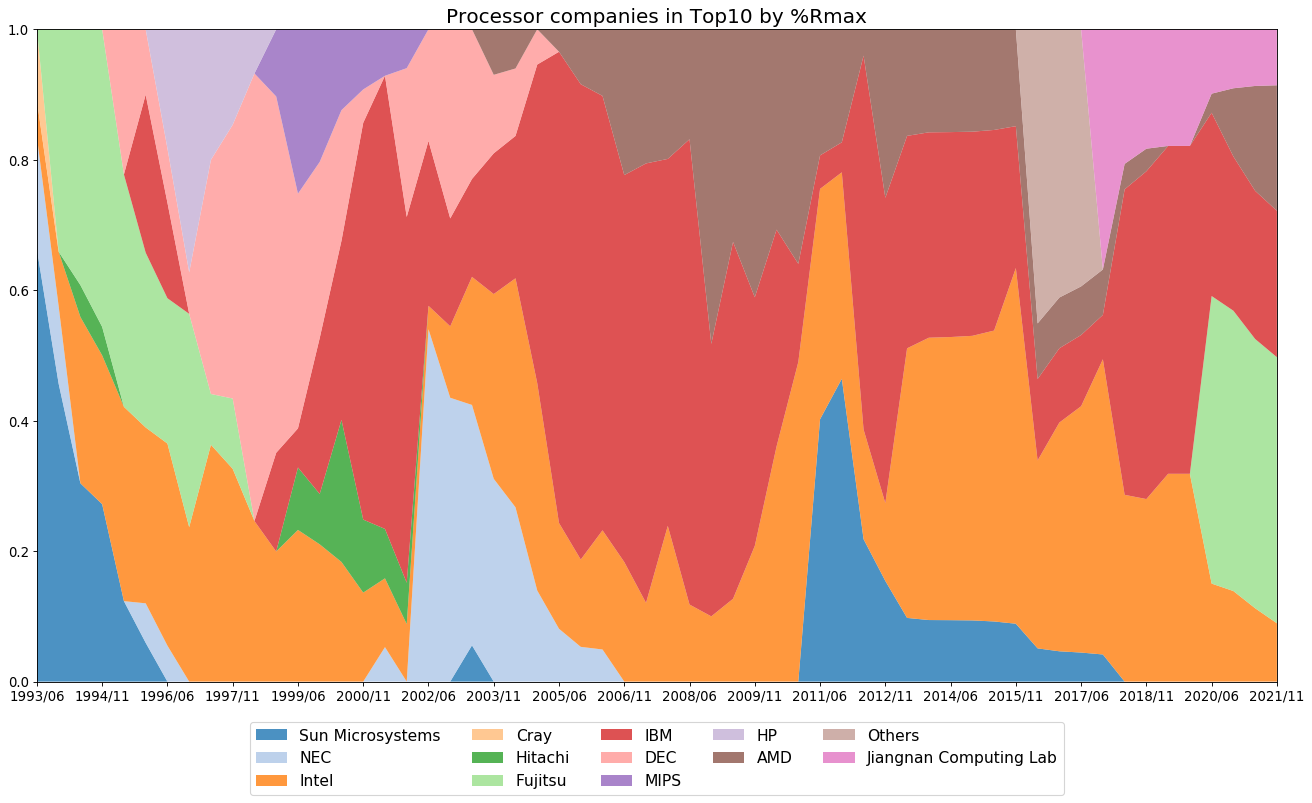

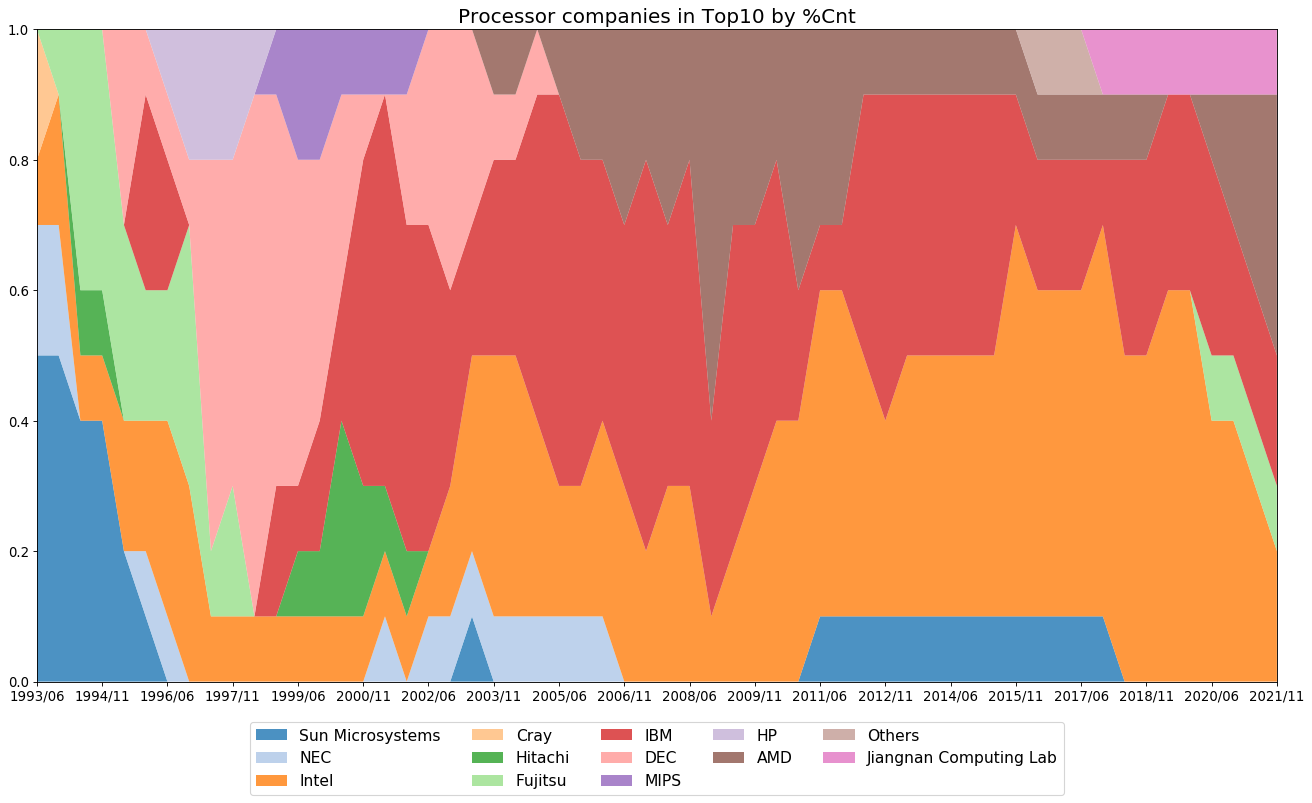

In [798]:
import matplotlib.pyplot as plt
import re

def build_plot(data, title, regex_string, cut_to=6, legend_fontsize=14):
    reg_expr = re.compile(regex_string)
    columns = []
    for column in res.columns:
        if reg_expr.search(column) != None:
            columns.append(column)
    x = data['PubDate'].values.tolist()
    ys = []
    labs = []
    for column in columns:
        if (data[column] != 0.).sum() != 0:
            ys.append(data[column].values.tolist())
            labs.append(column[:-cut_to])
    
    fig, ax = plt.subplots(1, 1, figsize=(20, 12), dpi=80)
    y = np.vstack(ys)
    ax = plt.gca()
    
    cm = plt.cm.get_cmap('tab20')
    ax.stackplot(x, y, labels=labs, alpha=0.8, colors=cm.colors)
    plt.xticks(x[::3], fontsize=12, horizontalalignment='center')
    plt.yticks(fontsize=12)
    ax.set_title(title, fontsize=18)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fontsize=legend_fontsize, ncol=5)

    plt.ylim(0, 1)
    plt.xlim(x[0], x[-1])
    plt.show()

res = get_statistics_by_column(processor_technology_df, 'Processor Company', data.keys(), 500)
build_plot(res, 'Processor companies in Top500 by %Rpeak', '.* %Rpeak$', 7)
build_plot(res, 'Processor companies in Top500 by %Rmax', '.* %Rmax$')
build_plot(res, 'Processor companies in Top500 by %Cnt', '.* %Cnt$', 5)
res = get_statistics_by_column(processor_technology_df, 'Processor Company', data.keys(), 50)
build_plot(res, 'Processor companies in Top50 by %Rmax', '.* %Rmax$')
build_plot(res, 'Processor companies in Top50 by %Cnt', '.* %Cnt$', 5)
res = get_statistics_by_column(processor_technology_df, 'Processor Company', data.keys(), 10)
build_plot(res, 'Processor companies in Top10 by %Rmax', '.* %Rmax$')
build_plot(res, 'Processor companies in Top10 by %Cnt', '.* %Cnt$', 5)

## Processor technology

['Sparc' 'Intel Nehalem' 'AMD x86_64' 'Intel Core' 'Power' 'Others'
 'Intel SandyBridge' 'PowerPC' 'Intel EM64T' 'NEC' 'Intel IA-64'
 'Intel Westmere' 'Intel IvyBridge' 'Intel Haswell' 'Intel MIC'
 'Intel Broadwell' 'Intel Xeon Phi' 'Intel Skylake' 'ShenWei' 'Cavium'
 'Intel Cascade lake' 'AMD Zen-2 (Rome)' 'Fujitsu ARM' 'ThunderX2'
 'AMD Zen (Naples)' 'NEC Vector Engine' 'X86_64' 'AMD Zen-3 (Milan)'
 'Intel Ice Lake']


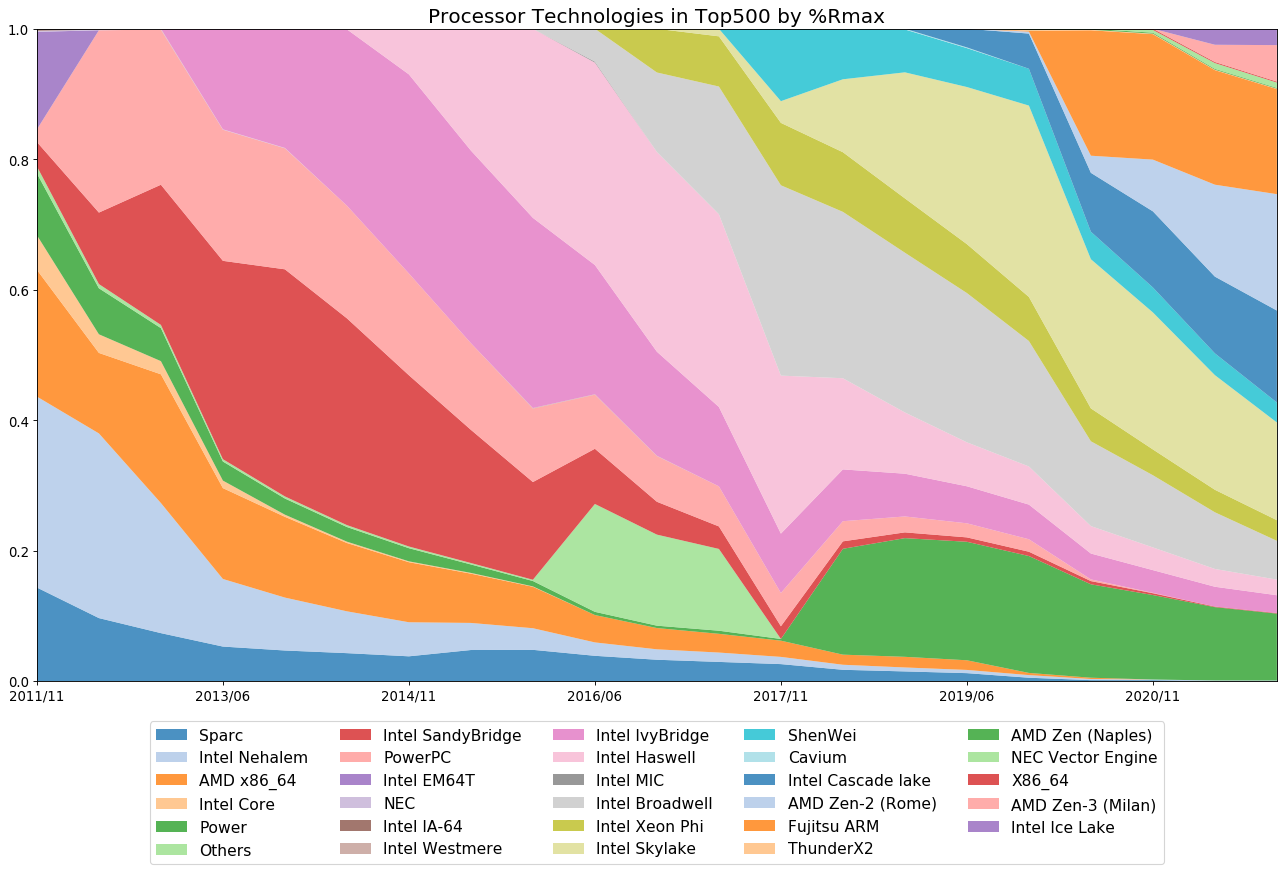

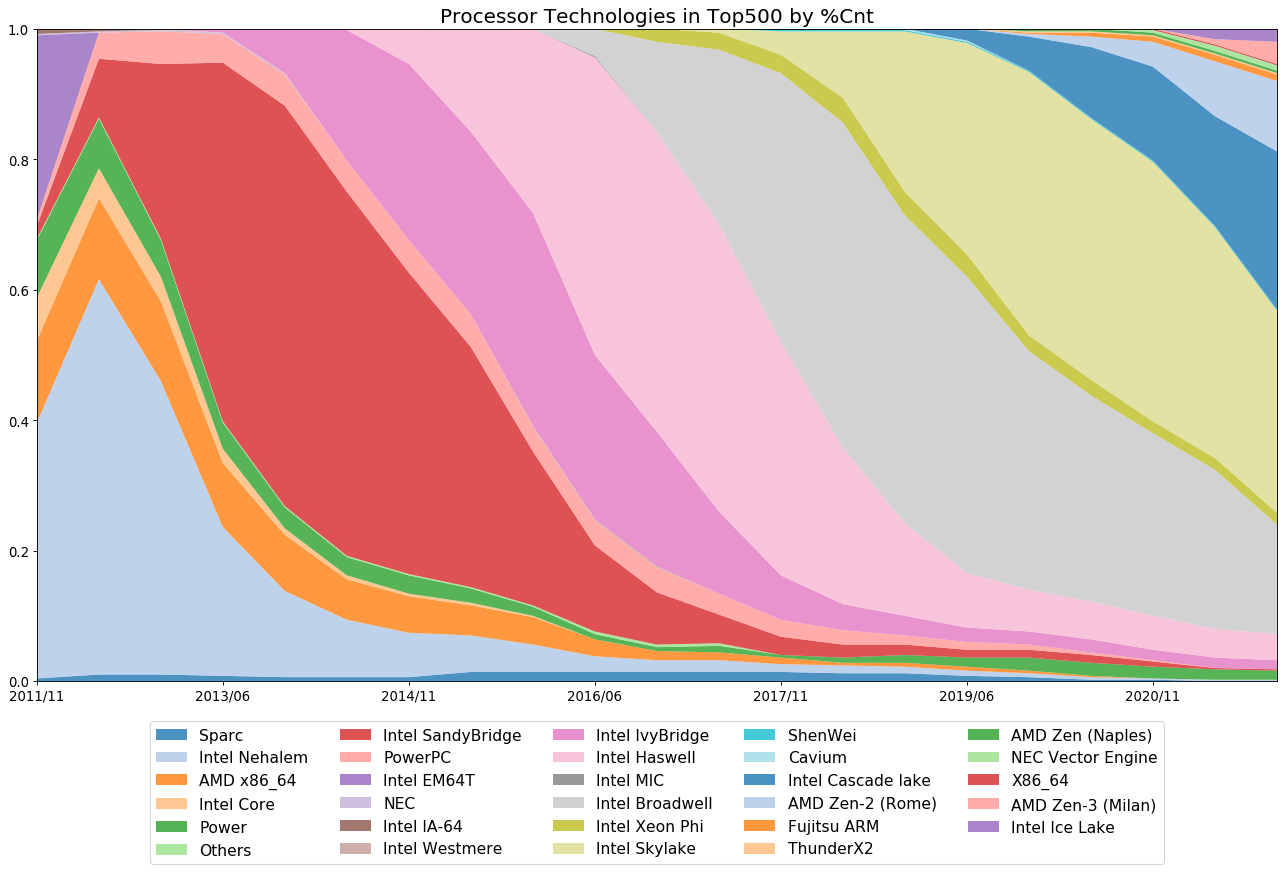

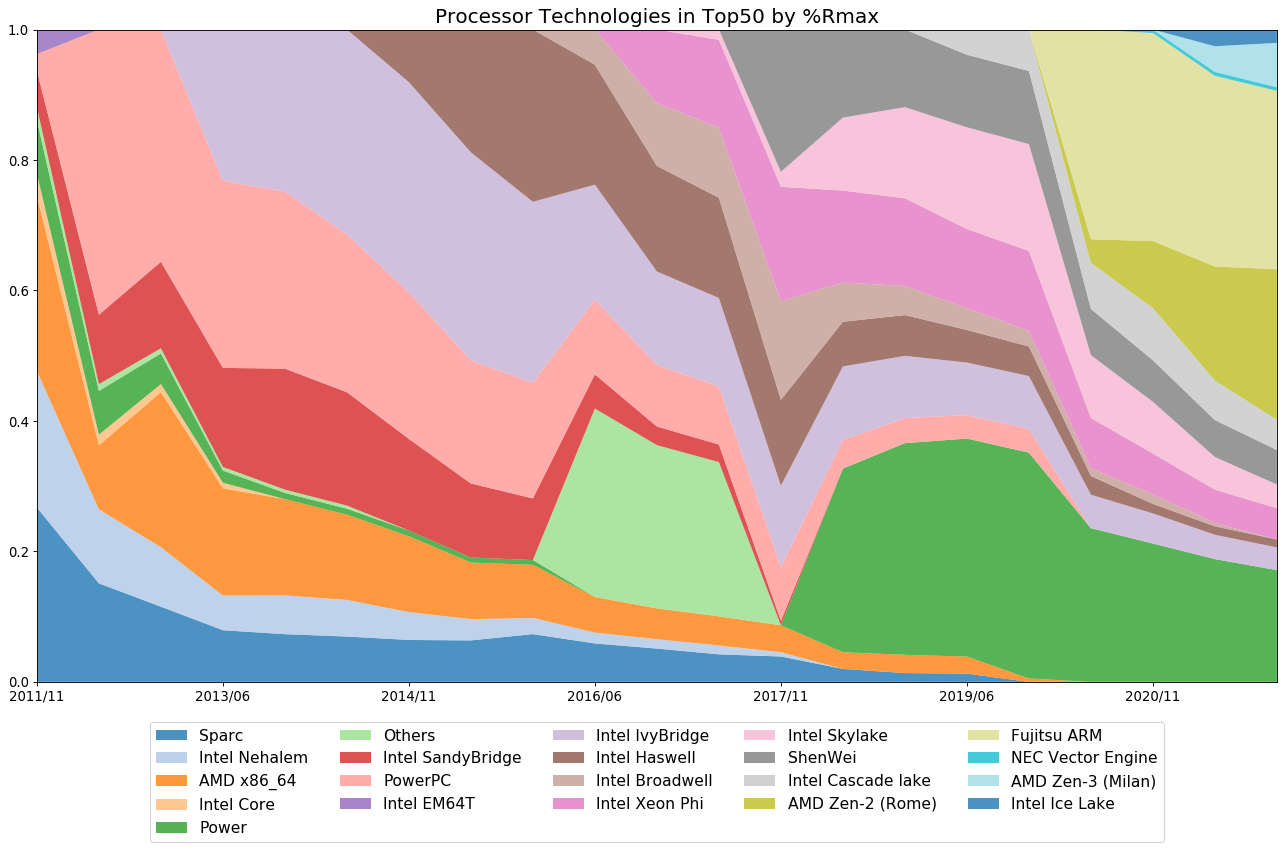

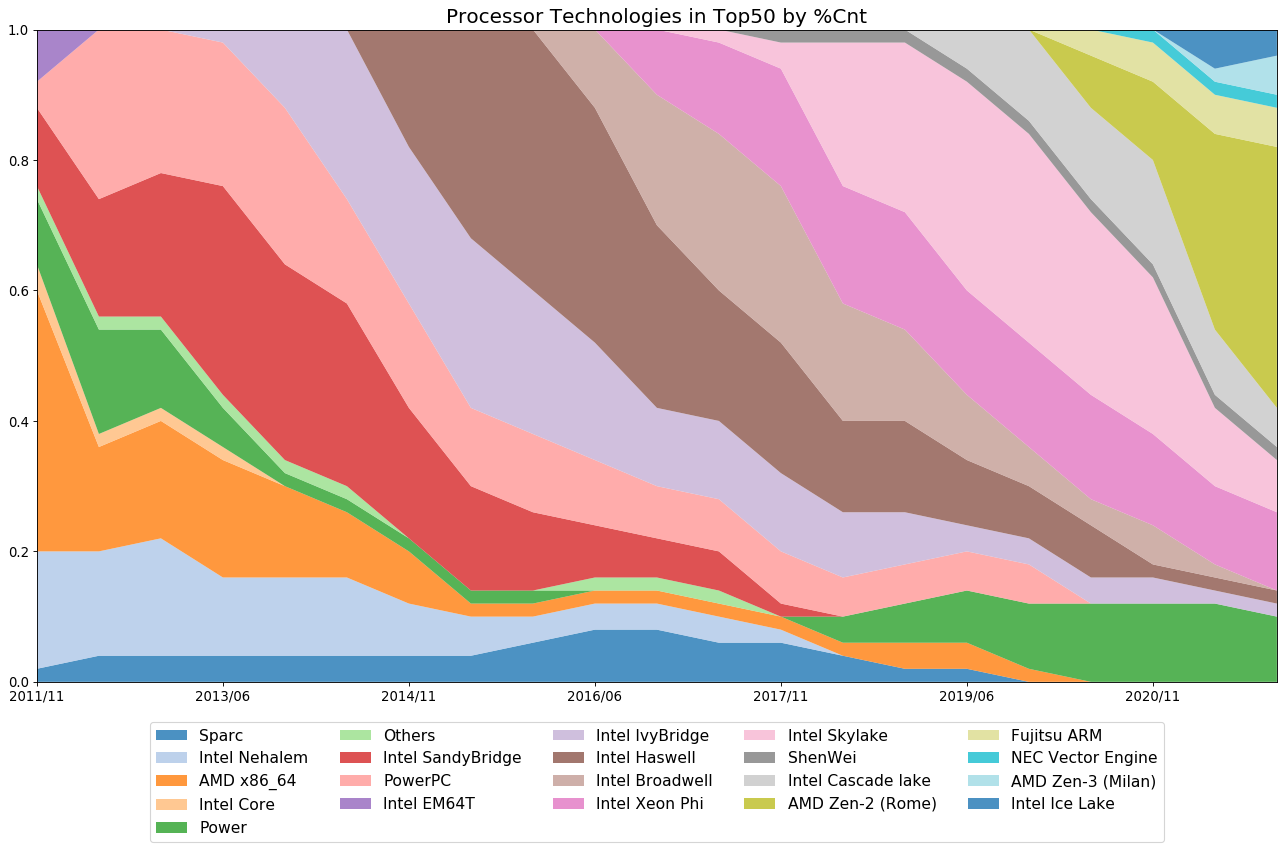

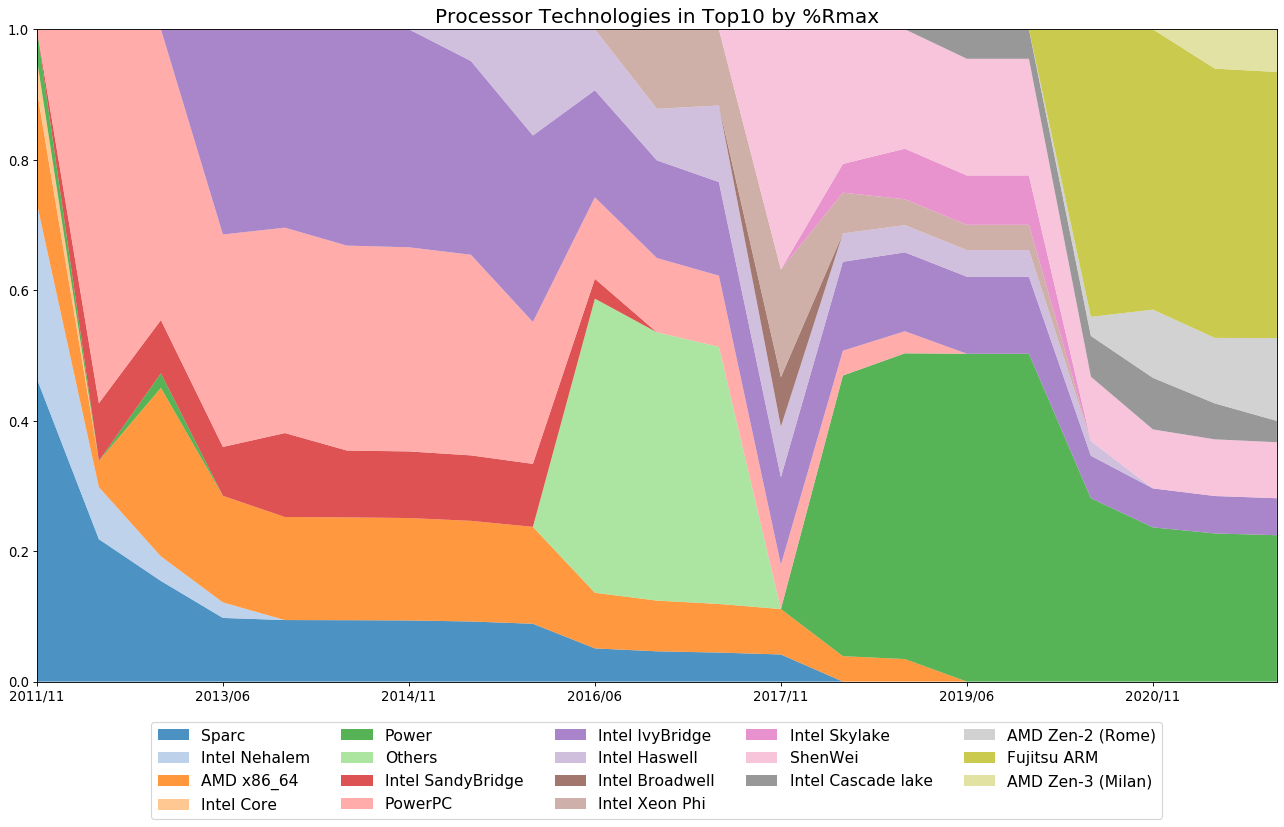

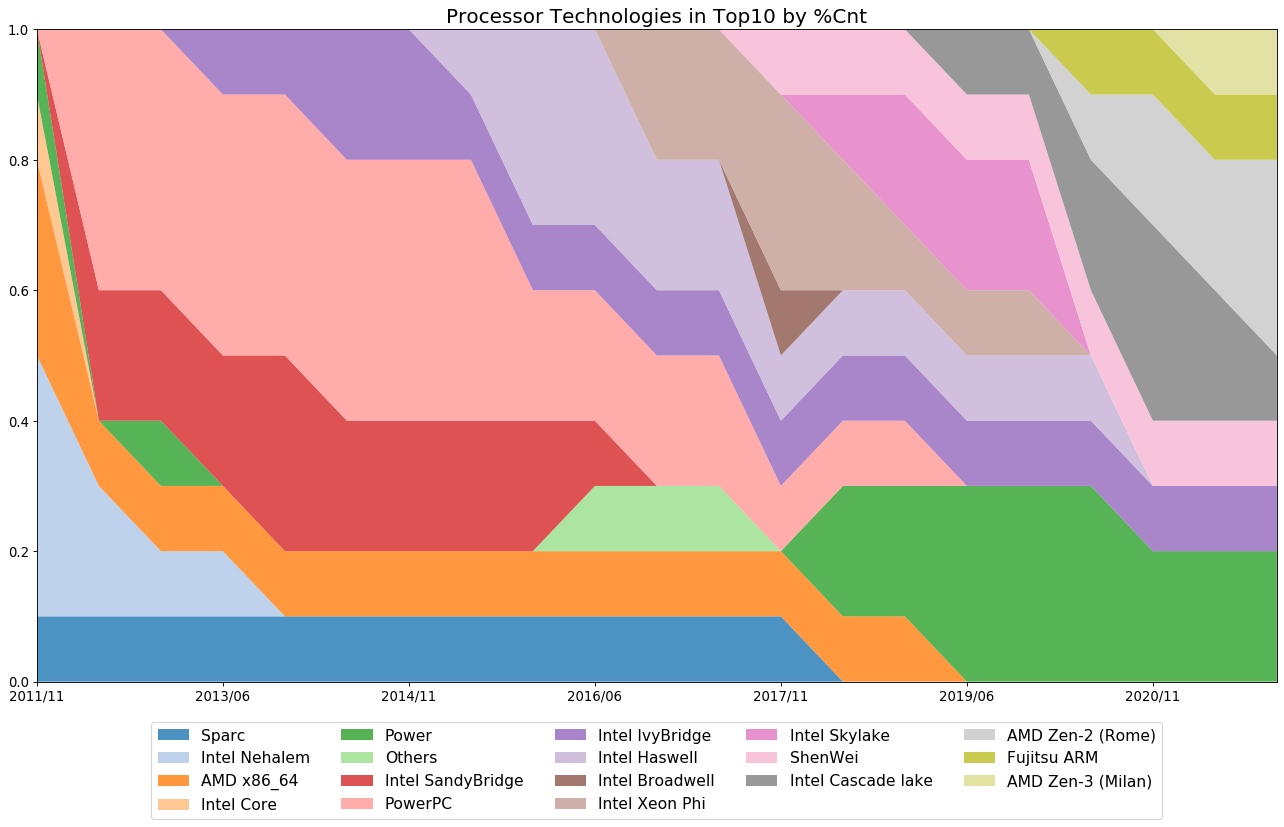

In [799]:
processor_technology_df_2 = None
for date_string in data:
    # print(date_string)
    # processor_check = 'KSR'
    res = None
    if date_string < '2011/11':
        continue
    elif date_string < '2017/06':
        res = data[date_string].loc[:, ['Processor Technology', 'Rmax', 'Rpeak', 'Rank']]
        # try_print = data[date_string].loc[data[date_string]['Processor Technology'] == processor_check, 'Processor']
    else:
        res = data[date_string].loc[:, ['Processor Technology', 'Rmax [TFlop/s]', 'Rpeak [TFlop/s]', 'Rank']]
        # try_print = data[date_string].loc[data[date_string]['Processor Technology'] == processor_check, 'Processor']
        res.rename(columns = {'Rmax [TFlop/s]': 'Rmax', 'Rpeak [TFlop/s]': 'Rpeak'}, inplace = True)
    # print(try_print)

    res.loc[:, 'PubDate'] = date_string
    res.loc[:, 'PubYear'] = date_string[:4]
    res.loc[:, 'PubMonth'] = date_string[4:]
    if processor_technology_df_2 is None:
        processor_technology_df_2 = res
    else:
        processor_technology_df_2 = pd.concat([processor_technology_df_2, res], ignore_index=True)

print(processor_technology_df_2['Processor Technology'].unique())

keys = []
for key in data.keys():
    if key < '2011/11':
        continue
    keys.append(key)

res = get_statistics_by_column(processor_technology_df_2, 'Processor Technology', keys, 500)
build_plot(res, 'Processor Technologies in Top500 by %Rmax', '.* %Rmax$')
build_plot(res, 'Processor Technologies in Top500 by %Cnt', '.* %Cnt$', 5)
res = get_statistics_by_column(processor_technology_df_2, 'Processor Technology', keys, 50)
build_plot(res, 'Processor Technologies in Top50 by %Rmax', '.* %Rmax$', 6)
build_plot(res, 'Processor Technologies in Top50 by %Cnt', '.* %Cnt$', 5)
res = get_statistics_by_column(processor_technology_df_2, 'Processor Technology', keys, 10)
build_plot(res, 'Processor Technologies in Top10 by %Rmax', '.* %Rmax$')
build_plot(res, 'Processor Technologies in Top10 by %Cnt', '.* %Cnt$', 5)

## Processor generation 

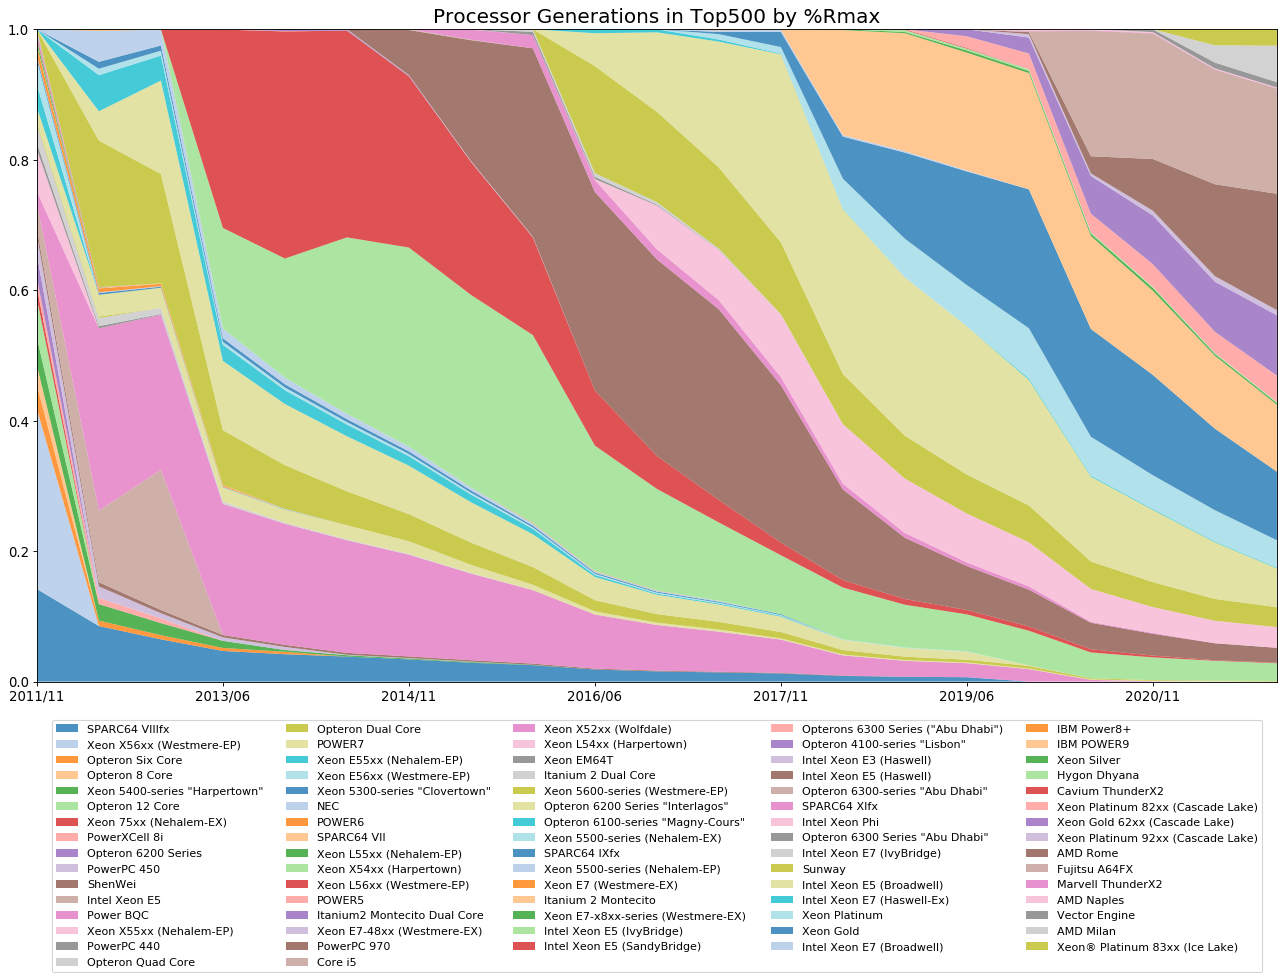

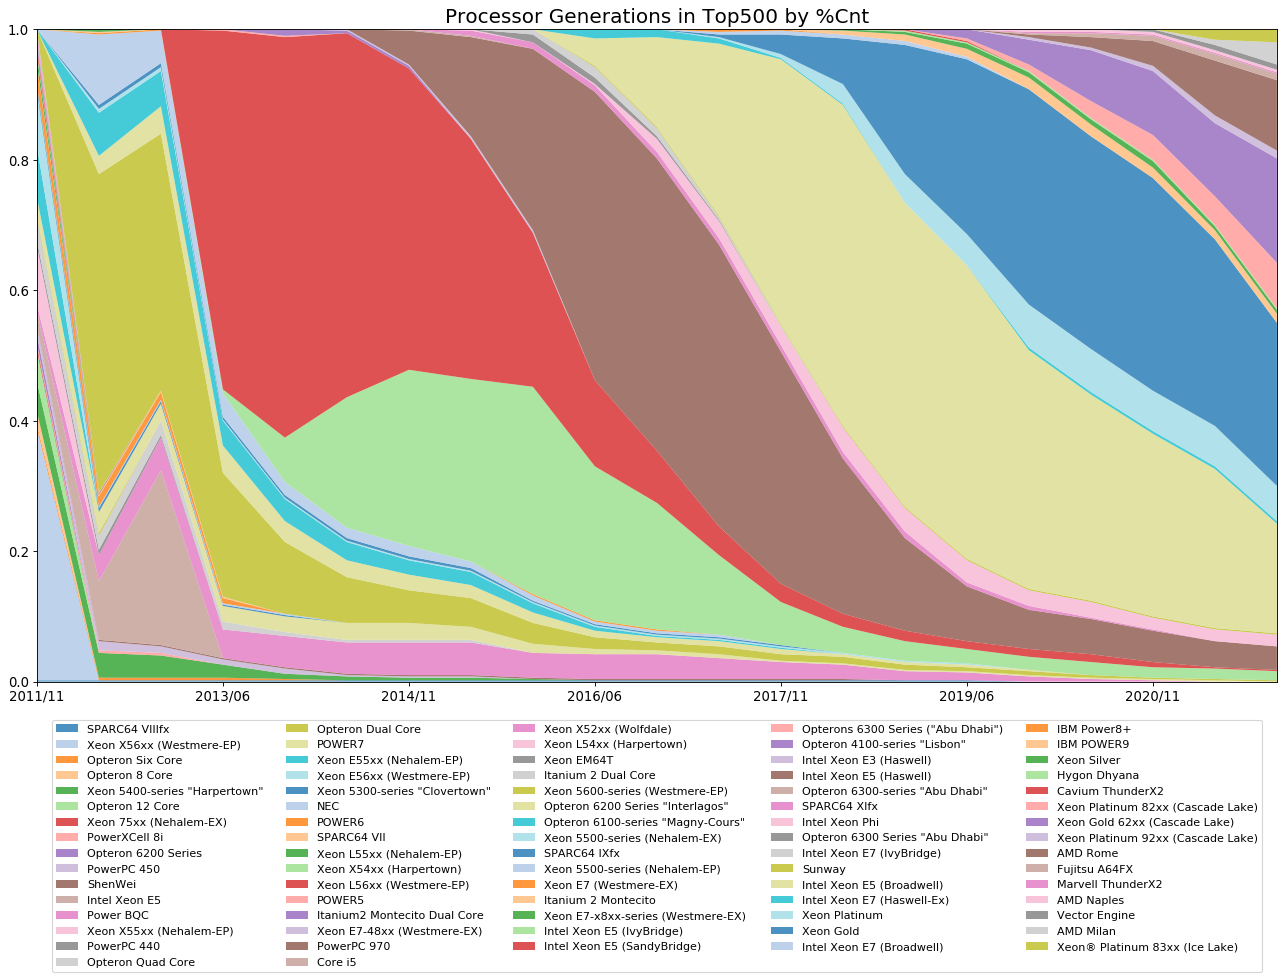

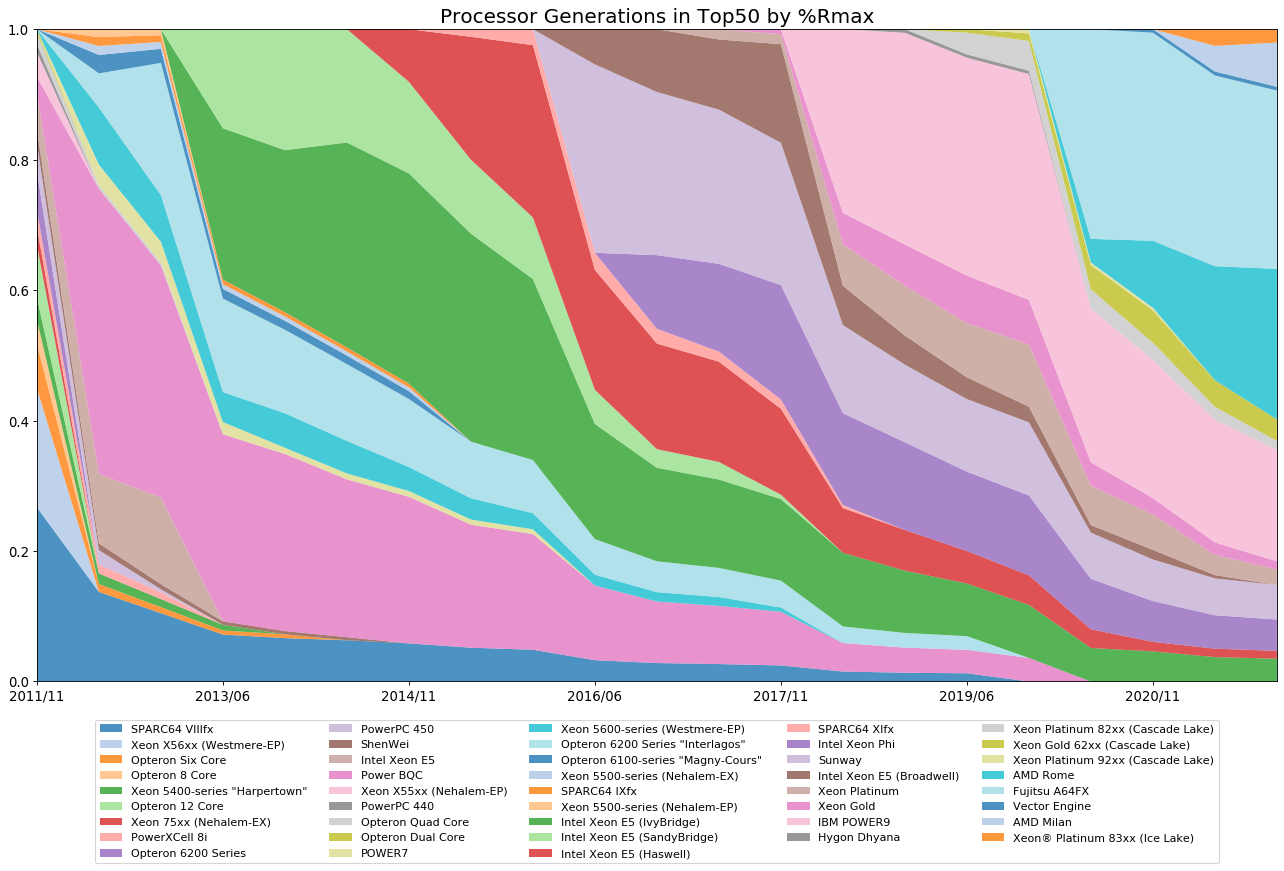

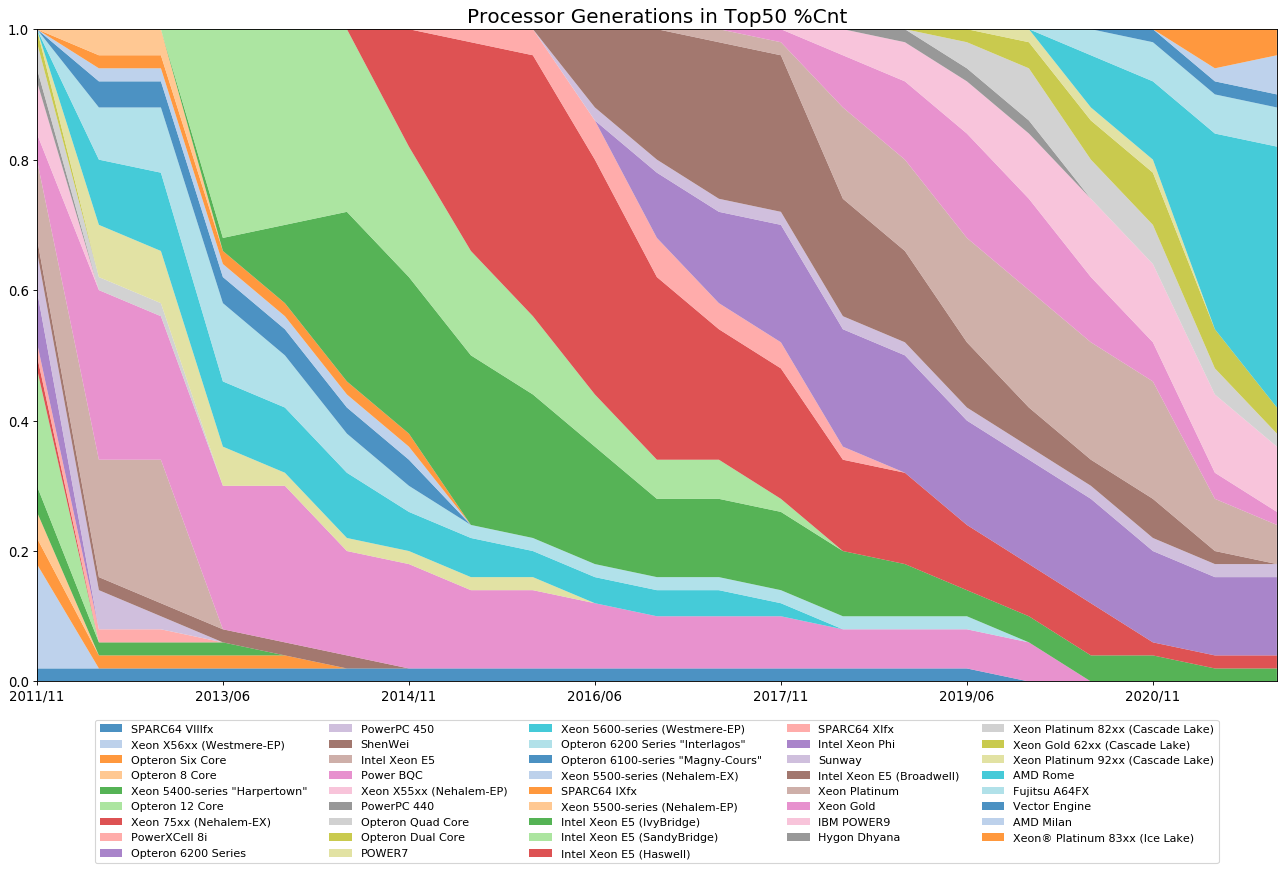

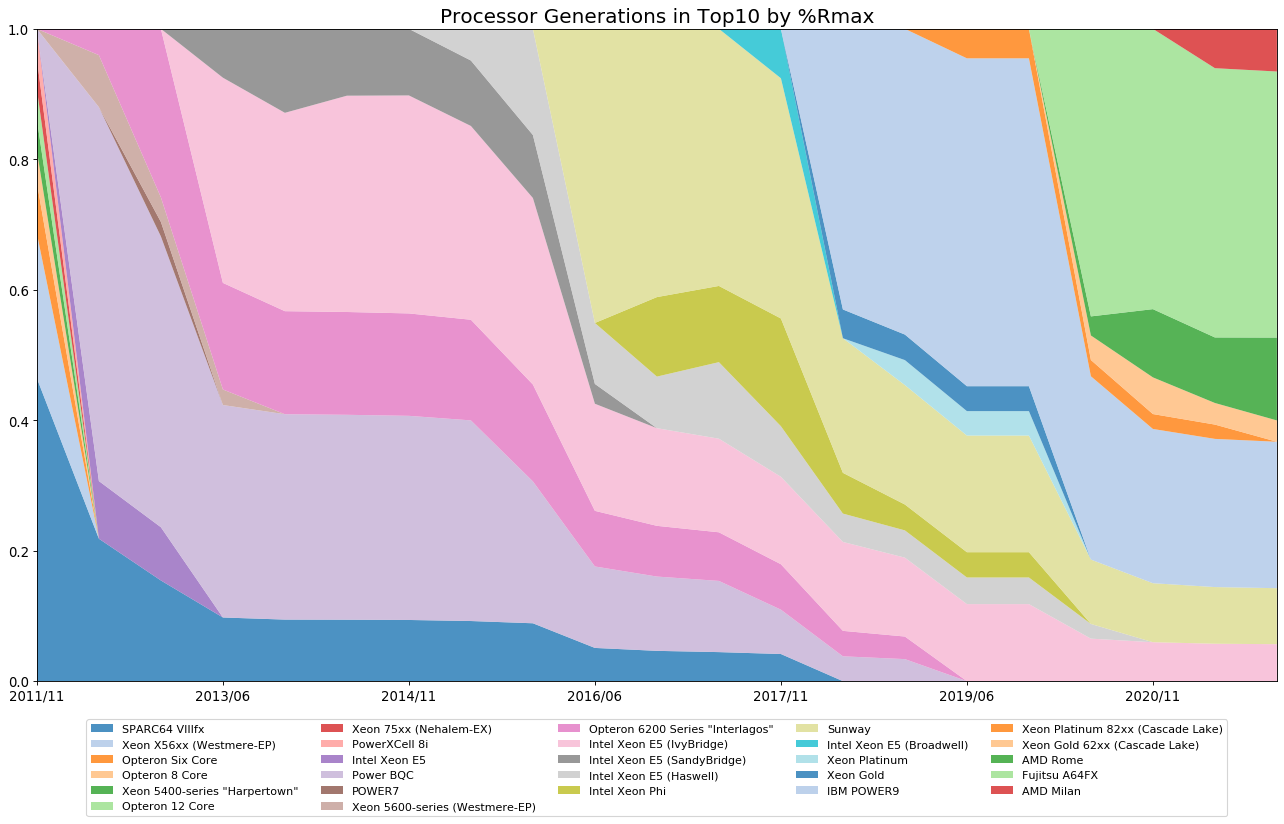

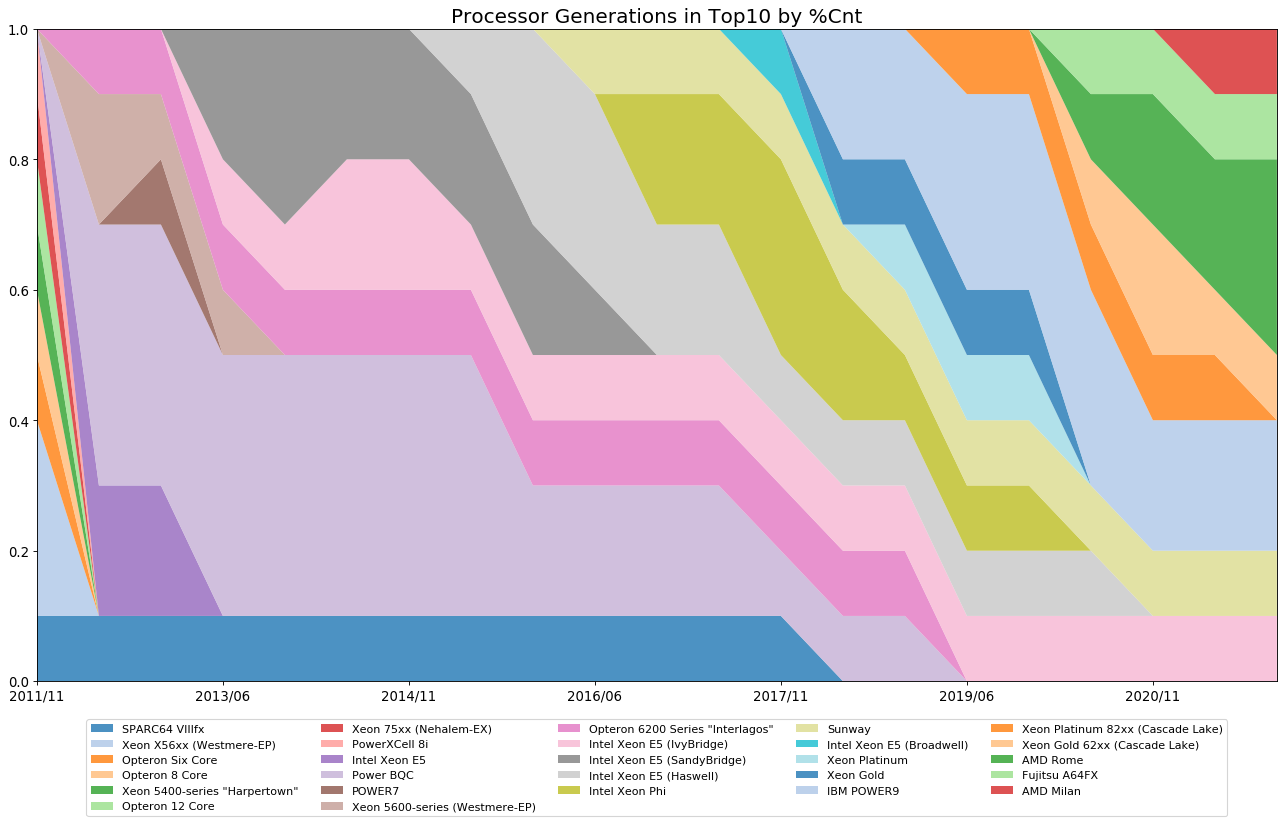

In [800]:
processor_generation_df = None
for date_string in data:
    # print(date_string)
    # processor_check = 'KSR'
    res = None
    if date_string < '2011/11':
        continue
    elif date_string < '2017/06':
        res = data[date_string].loc[:, ['Processor Generation', 'Rmax', 'Rpeak', 'Rank']]
        # try_print = data[date_string].loc[data[date_string]['Processor Technology'] == processor_check, 'Processor']
    else:
        res = data[date_string].loc[:, ['Processor Generation', 'Rmax [TFlop/s]', 'Rpeak [TFlop/s]', 'Rank']]
        # try_print = data[date_string].loc[data[date_string]['Processor Technology'] == processor_check, 'Processor']
        res.rename(columns = {'Rmax [TFlop/s]': 'Rmax', 'Rpeak [TFlop/s]': 'Rpeak'}, inplace = True)
    # print(try_print)

    res.loc[:, 'PubDate'] = date_string
    res.loc[:, 'PubYear'] = date_string[:4]
    res.loc[:, 'PubMonth'] = date_string[4:]
    if processor_generation_df is None:
        processor_generation_df = res
    else:
        processor_generation_df = pd.concat([processor_generation_df, res], ignore_index=True)
        
res = get_statistics_by_column(processor_generation_df, 'Processor Generation', keys, 500)
build_plot(res, 'Processor Generations in Top500 by %Rmax', '.* %Rmax$', legend_fontsize=10)
build_plot(res, 'Processor Generations in Top500 by %Cnt', '.* %Cnt$', 5, legend_fontsize=10)
res = get_statistics_by_column(processor_generation_df, 'Processor Generation', keys, 50)
build_plot(res, 'Processor Generations in Top50 by %Rmax', '.* %Rmax$', legend_fontsize=10)
build_plot(res, 'Processor Generations in Top50 %Cnt', '.* %Cnt$', 5, legend_fontsize=10)
res = get_statistics_by_column(processor_generation_df, 'Processor Generation', keys, 10)
build_plot(res, 'Processor Generations in Top10 by %Rmax', '.* %Rmax$', legend_fontsize=10)
build_plot(res, 'Processor Generations in Top10 by %Cnt', '.* %Cnt$', 5, legend_fontsize=10)

## Cores per socket

Анализирую среднее число процессоров топ10, топ50, топ500

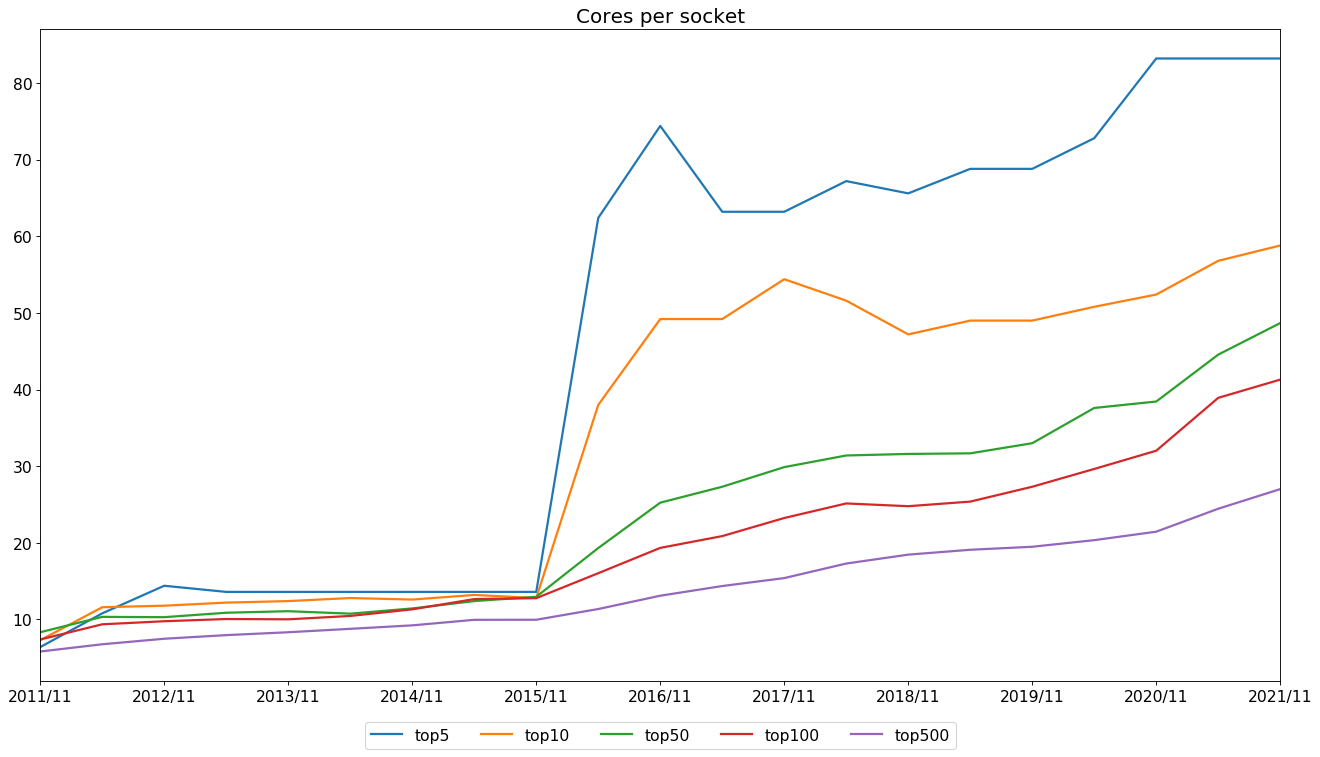

In [801]:
processor_cores_per_socket_df = None
for date_string in data:
    # print(date_string)
    # processor_check = 'KSR'
    res = None
    if date_string < '2011/11':
        continue
    elif date_string < '2017/06':
        res = data[date_string].loc[:, ['Cores per Socket', 'Rmax', 'Rpeak', 'Rank']]
        # try_print = data[date_string].loc[data[date_string]['Processor Technology'] == processor_check, 'Processor']
    else:
        res = data[date_string].loc[:, ['Cores per Socket', 'Rmax [TFlop/s]', 'Rpeak [TFlop/s]', 'Rank']]
        # try_print = data[date_string].loc[data[date_string]['Processor Technology'] == processor_check, 'Processor']
        res.rename(columns = {'Rmax [TFlop/s]': 'Rmax', 'Rpeak [TFlop/s]': 'Rpeak'}, inplace = True)
    # print(try_print)

    res.loc[:, 'PubDate'] = date_string
    res.loc[:, 'PubYear'] = date_string[:4]
    res.loc[:, 'PubMonth'] = date_string[4:]
    if processor_cores_per_socket_df is None:
        processor_cores_per_socket_df = res
    else:
        processor_cores_per_socket_df = pd.concat([processor_cores_per_socket_df, res], ignore_index=True)

def get_mean_statistics_by_column(data, column, keys, tops):
    columns = ['PubDate', 'PubYear', 'PubMonth']
    for top in tops:
        columns.append('top' + str(top))
    df = pd.DataFrame(columns=columns)
    for date in tqdm(keys):
        values_dict = {'PubDate': date, 'PubYear': date[:4], 'PubMonth': date[4:]}
        cnt = data[(data['PubDate'] == date) & 
                   (data['Rank'] <= top)].shape[0]
        for top in tops:
            values_dict['top' + str(top)] = data[(data['PubDate'] == date) & 
                   (data['Rank'] <= top)][column].mean()
        df = df.append(values_dict, ignore_index=True)
    return df

def build_line_plot(df, title, regex_string):
    reg_expr = re.compile(regex_string)
    columns = []
    for column in res.columns:
        if reg_expr.search(column) != None:
            columns.append(column)
    
    fig, ax = plt.subplots(1, 1, figsize=(20, 12), dpi=80)
    
    x = df['PubDate'].values.tolist()
    
    for column in columns:
        ax.plot(x, df[column].values.tolist(), linewidth=2.0, label=column)
    
    plt.xticks(x[::2], fontsize=14, horizontalalignment='center')
    plt.yticks(fontsize=14)
    ax.set_title(title, fontsize=18)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fontsize=14, ncol=5)

    plt.xlim(x[0], x[-1])
    plt.show()

res = get_mean_statistics_by_column(processor_cores_per_socket_df, 'Cores per Socket', keys, [5, 10, 50, 100, 500])
build_line_plot(res, 'Cores per socket', '^top')

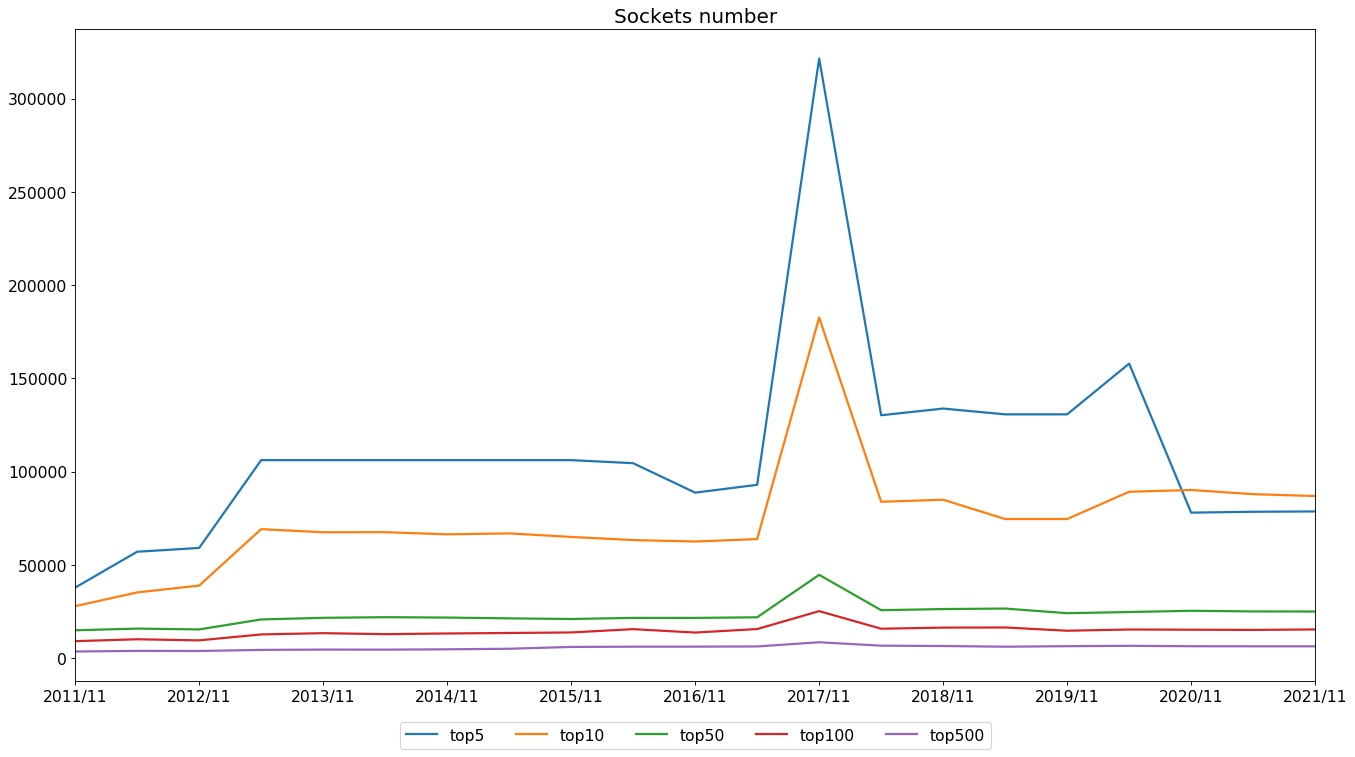

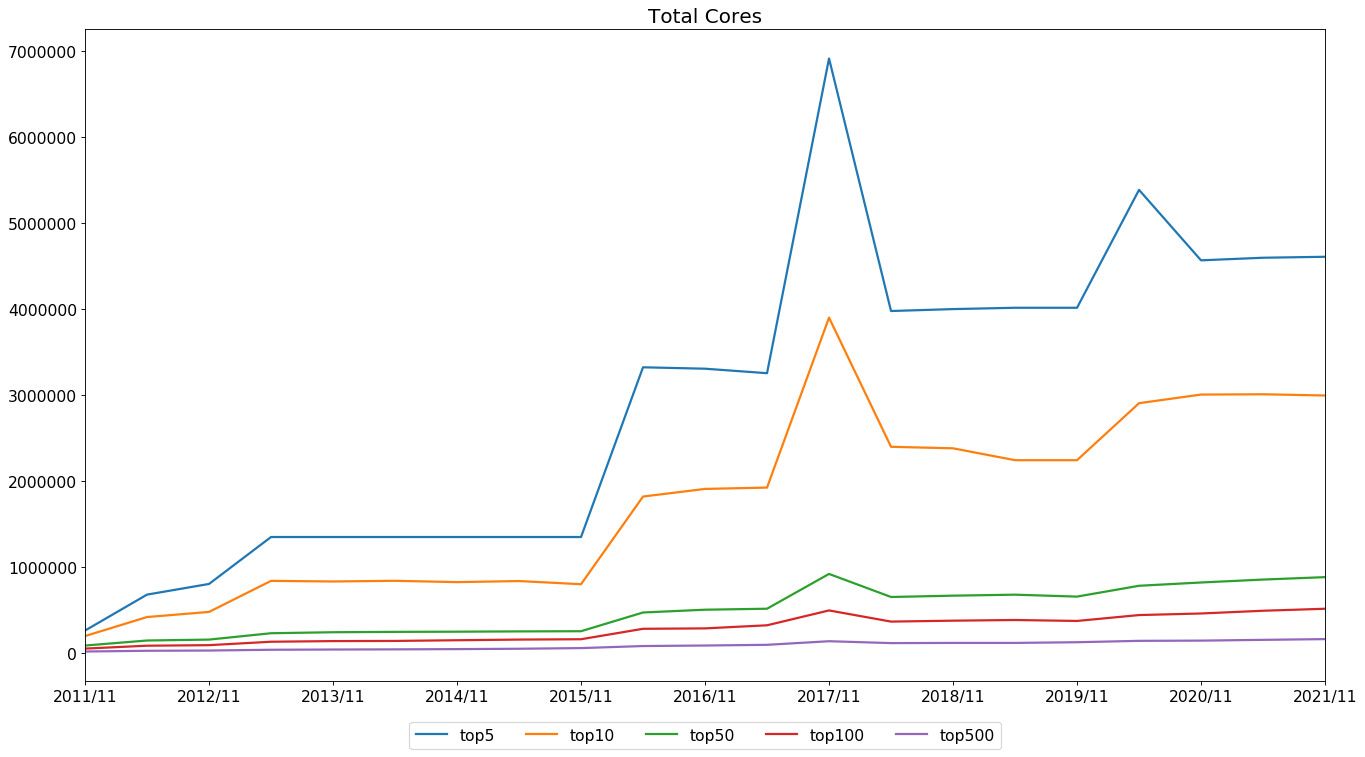

In [802]:
processor_num_socket_df = None
for date_string in data:
    # print(date_string)
    # processor_check = 'KSR'
    res = None
    if date_string < '2011/11':
        continue
    elif date_string < '2017/06':
        res = data[date_string].loc[:, ['Cores per Socket', 'Total Cores', 'Rmax', 'Rpeak', 'Rank']]
        # try_print = data[date_string].loc[data[date_string]['Processor Technology'] == processor_check, 'Processor']
    else:
        res = data[date_string].loc[:, ['Cores per Socket', 'Total Cores', 'Rmax [TFlop/s]', 'Rpeak [TFlop/s]', 'Rank']]
        # try_print = data[date_string].loc[data[date_string]['Processor Technology'] == processor_check, 'Processor']
        res.rename(columns = {'Rmax [TFlop/s]': 'Rmax', 'Rpeak [TFlop/s]': 'Rpeak'}, inplace = True)
    # print(try_print)

    res.loc[:, 'PubDate'] = date_string
    res.loc[:, 'PubYear'] = date_string[:4]
    res.loc[:, 'PubMonth'] = date_string[4:]
    if processor_num_socket_df is None:
        processor_num_socket_df = res
    else:
        processor_num_socket_df = pd.concat([processor_num_socket_df, res], ignore_index=True)
processor_num_socket_df 

processor_num_socket_df['Processors'] = processor_num_socket_df['Total Cores'] / \
processor_num_socket_df['Cores per Socket']

res = get_mean_statistics_by_column(processor_num_socket_df, 'Processors', keys, [5, 10, 50, 100, 500])
build_line_plot(res, 'Sockets number', '^top')
res = get_mean_statistics_by_column(processor_num_socket_df, 'Total Cores', keys, [5, 10, 50, 100, 500])
build_line_plot(res, 'Total Cores', '^top')

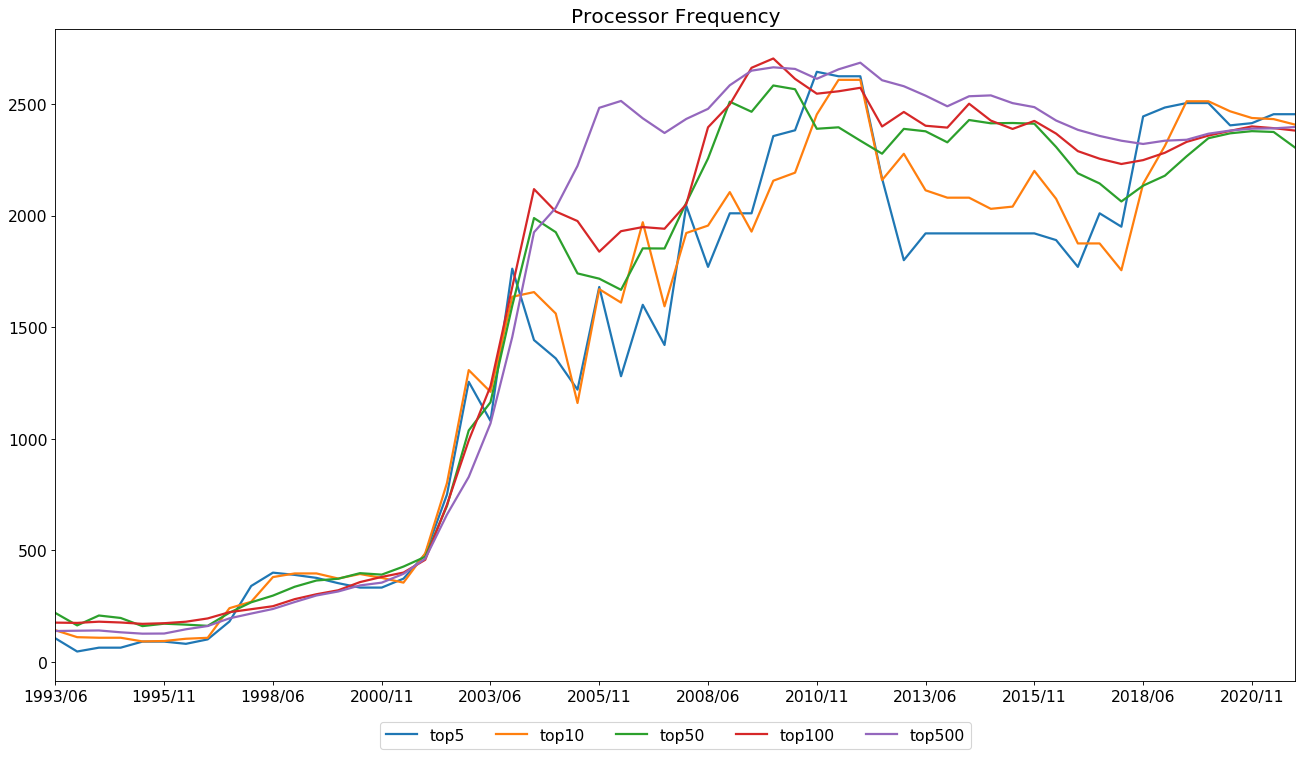

In [803]:
pr_freq_df = None
for date_string in data:
    # print(date_string)
    # processor_check = 'KSR'
    res = None
    if date_string < '2011/11':
        res = data[date_string].loc[:, ['Proc. Frequency', 'Rank']]
    else:
        res = data[date_string].loc[:, ['Processor Speed (MHz)', 'Rank']]
        res.rename(columns = {'Processor Speed (MHz)': 'Proc. Frequency'}, inplace = True)

    res.loc[:, 'PubDate'] = date_string
    res.loc[:, 'PubYear'] = date_string[:4]
    res.loc[:, 'PubMonth'] = date_string[4:]
    if pr_freq_df is None:
        pr_freq_df = res
    else:
        pr_freq_df = pd.concat([pr_freq_df, res], ignore_index=True)
pr_freq_df


def build_line_plot(df, title, regex_string):
    reg_expr = re.compile(regex_string)
    columns = []
    for column in res.columns:
        if reg_expr.search(column) != None:
            columns.append(column)
    
    fig, ax = plt.subplots(1, 1, figsize=(20, 12), dpi=80)
    
    x = df['PubDate'].values.tolist()
    
    for column in columns:
        ax.plot(x, df[column].values.tolist(), linewidth=2.0, label=column)
    
    plt.xticks(x[::5], fontsize=14, horizontalalignment='center')
    plt.yticks(fontsize=14)
    ax.set_title(title, fontsize=18)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fontsize=14, ncol=5)

    plt.xlim(x[0], x[-1])
    plt.show()

res = get_mean_statistics_by_column(pr_freq_df, 'Proc. Frequency', data.keys(), [5, 10, 50, 100, 500])
build_line_plot(res, 'Processor Frequency', '^top')

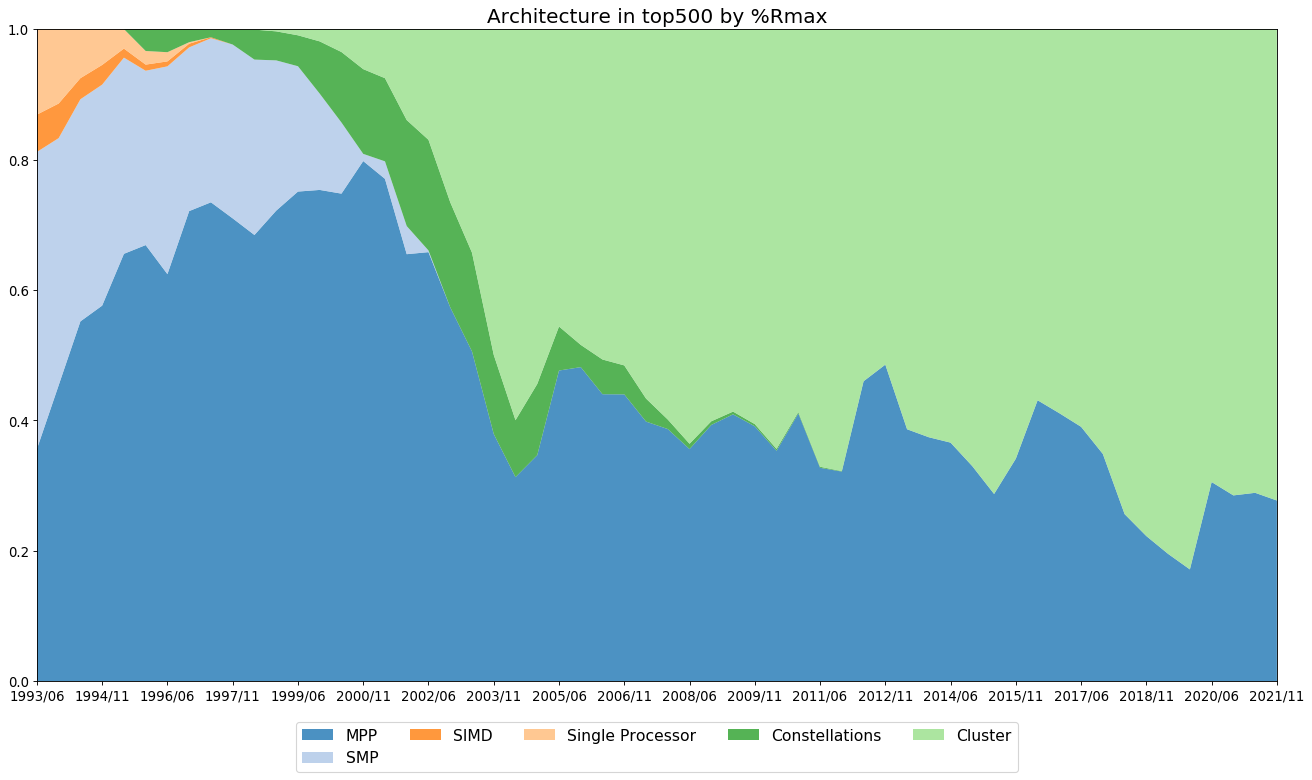

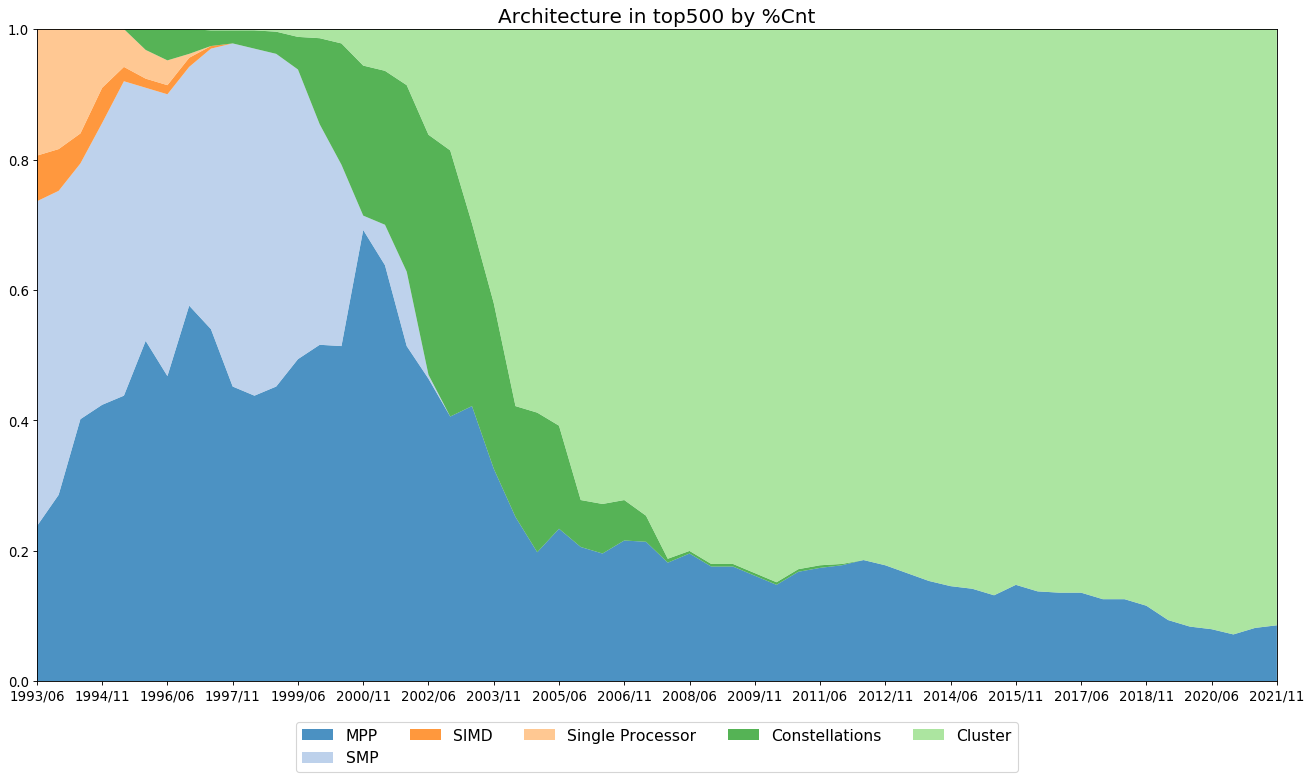

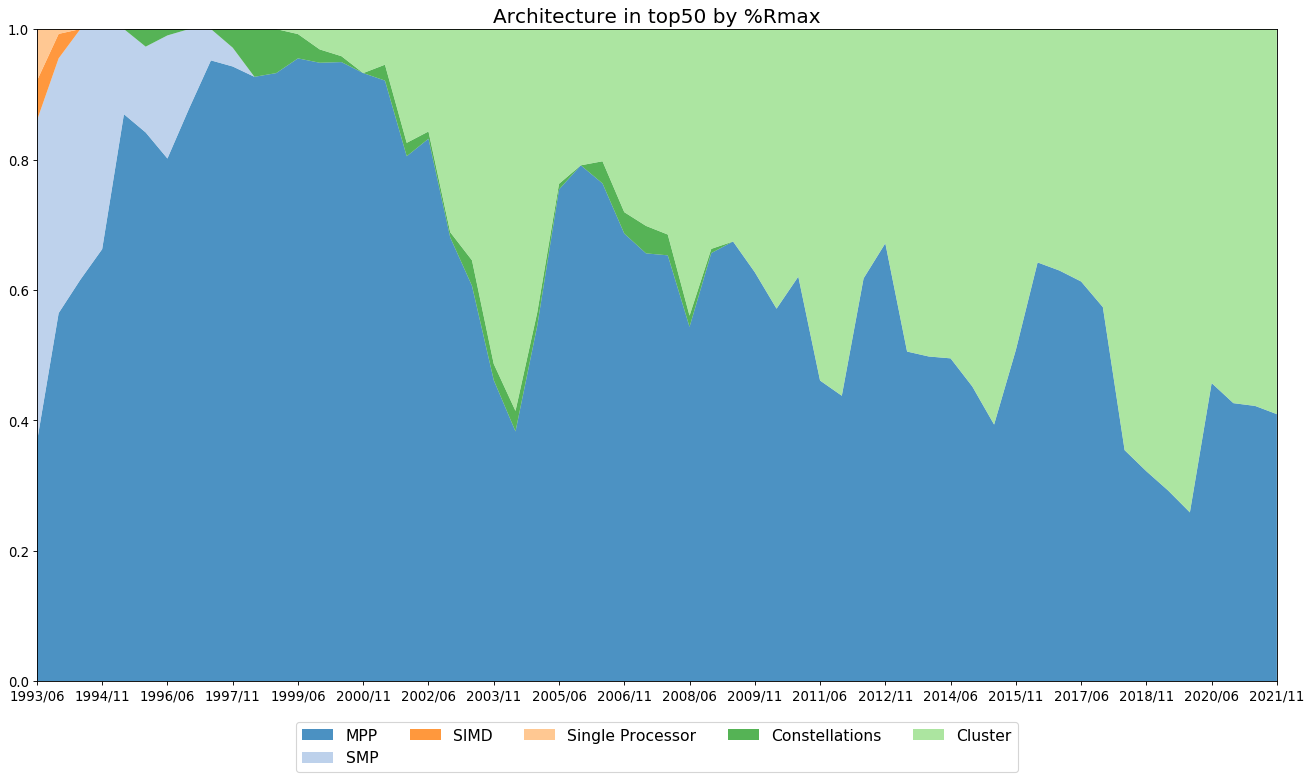

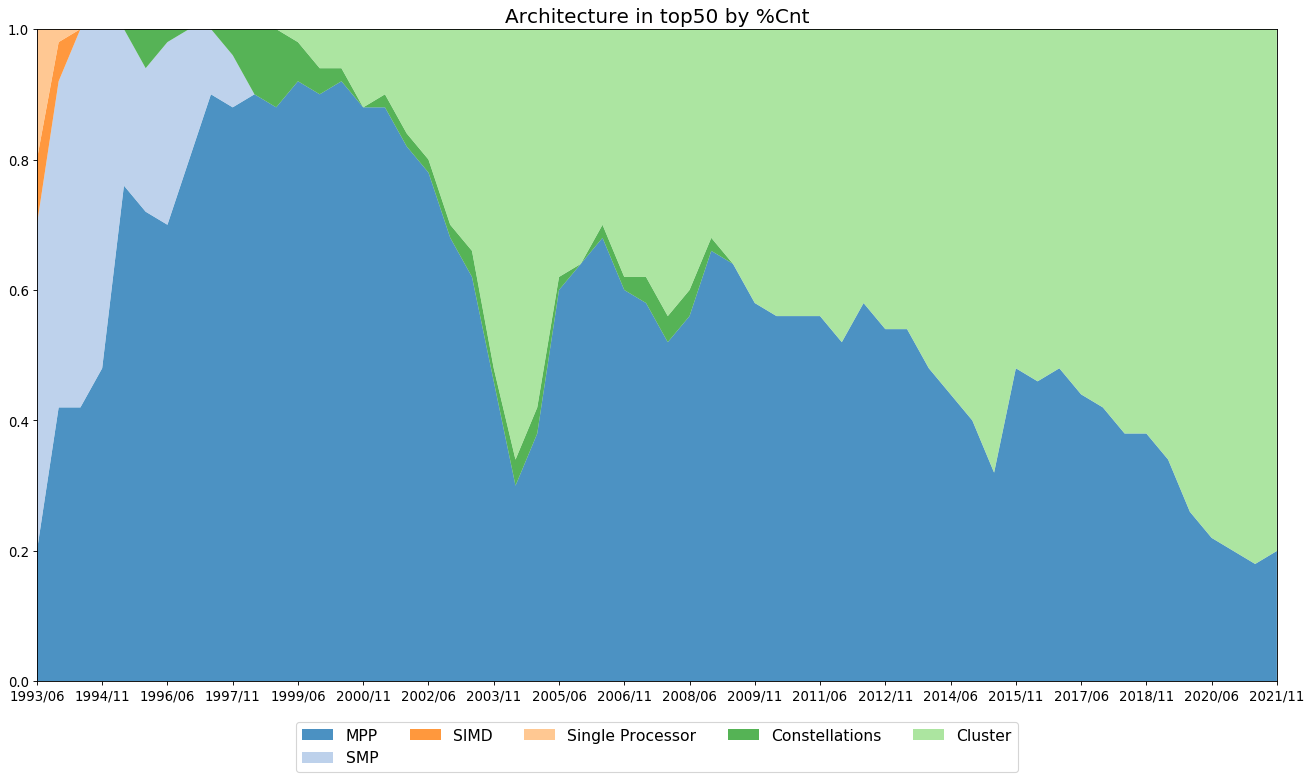

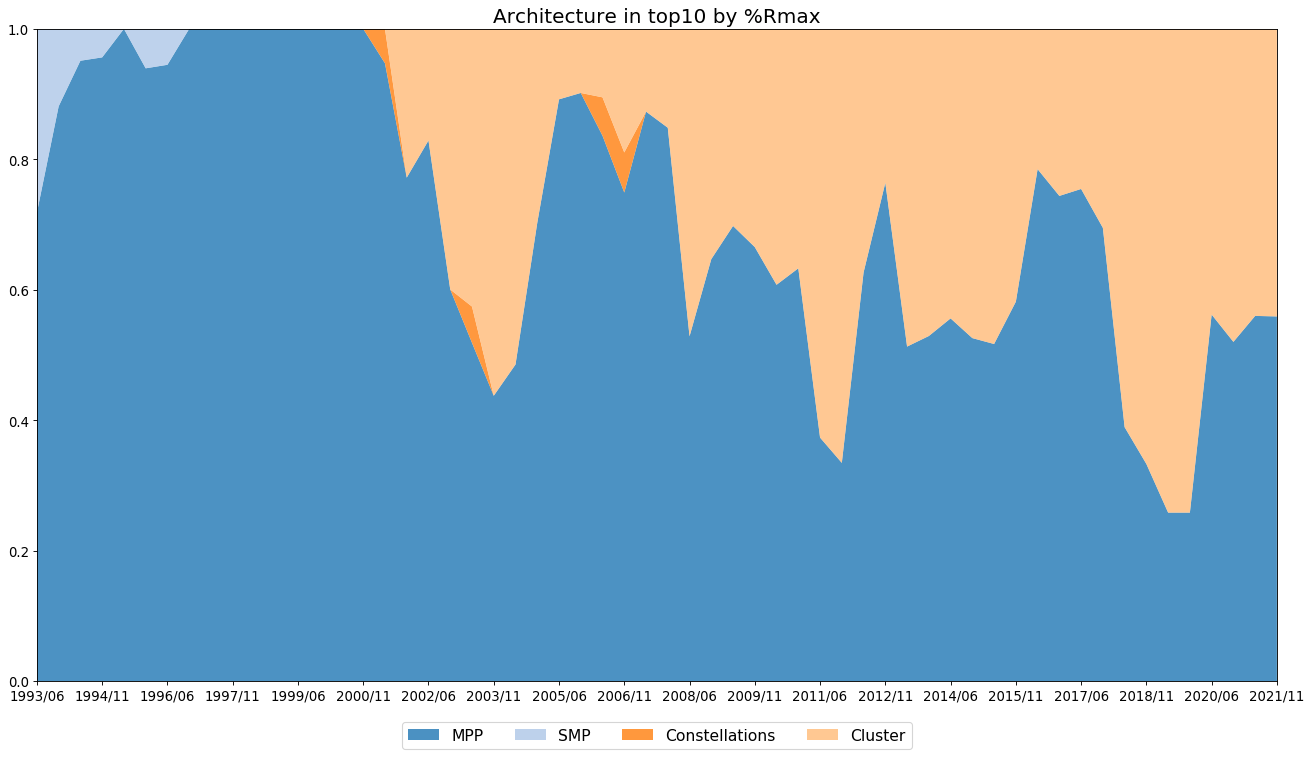

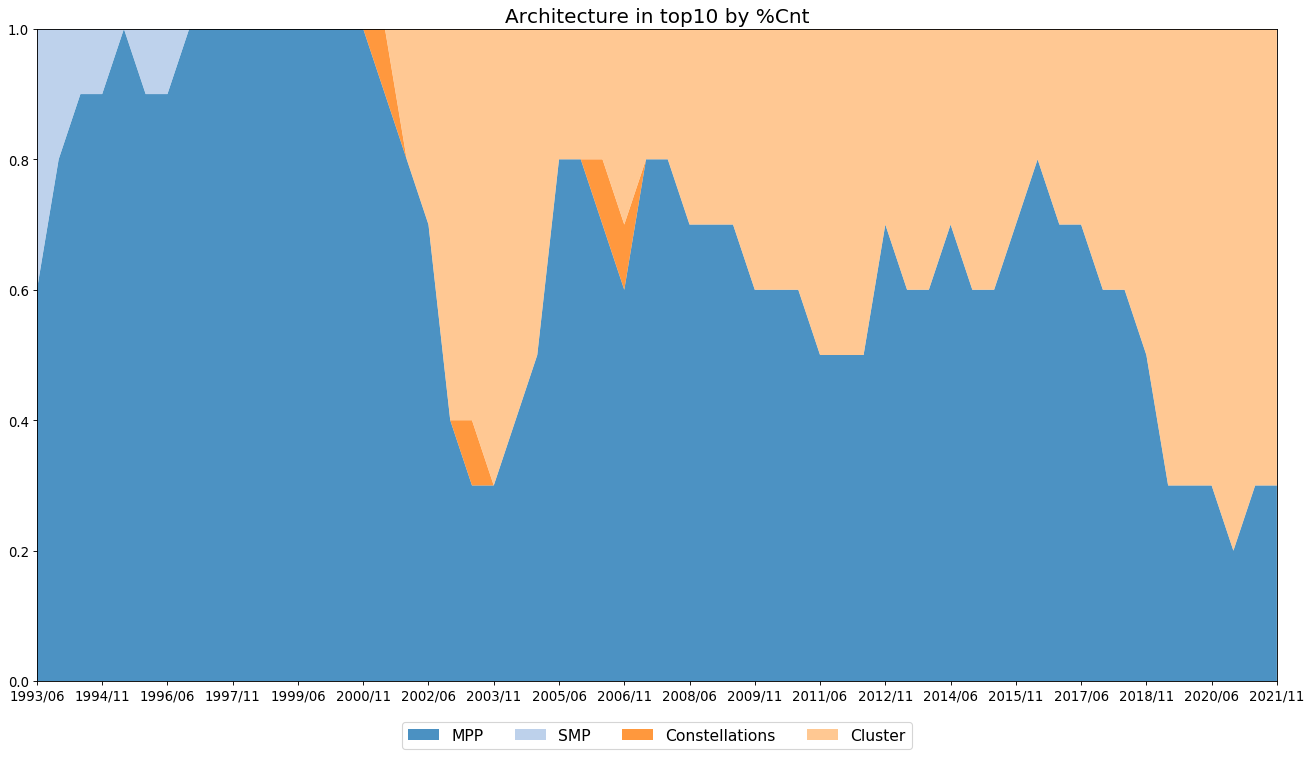

In [804]:
processor_architecture_df = None
for date_string in data:
    # print(date_string)
    # processor_check = 'KSR'
    res = None
    if date_string < '2011/11':
        res = data[date_string].loc[:, ['Architecture', 'RMax', 'RPeak', 'Rank']]
        res.rename(columns = {'RMax': 'Rmax', 
                              'RPeak': 'Rpeak'}, inplace = True)
        # try_print = data[date_string].loc[data[date_string]['Processor Family'] == processor_check, 'Processor']
    elif date_string < '2017/06':
        res = data[date_string].loc[:, ['Architecture', 'Rmax', 'Rpeak', 'Rank']]
        # try_print = data[date_string].loc[data[date_string]['Processor Technology'] == processor_check, 'Processor']
    else:
        res = data[date_string].loc[:, ['Architecture', 'Rmax [TFlop/s]', 'Rpeak [TFlop/s]', 'Rank']]
        # try_print = data[date_string].loc[data[date_string]['Processor Technology'] == processor_check, 'Processor']
        res.rename(columns = {'Rmax [TFlop/s]': 'Rmax', 'Rpeak [TFlop/s]': 'Rpeak'}, inplace = True)
    # print(try_print)

    res.loc[:, 'PubDate'] = date_string
    res.loc[:, 'PubYear'] = date_string[:4]
    res.loc[:, 'PubMonth'] = date_string[5:]
    if processor_architecture_df is None:
        processor_architecture_df = res
    else:
        processor_architecture_df = pd.concat([processor_architecture_df, res], ignore_index=True)

res = get_statistics_by_column(processor_architecture_df, 'Architecture', data.keys(), 500)
build_plot(res, 'Architecture in top500 by %Rmax', '.* %Rmax$', 6)
build_plot(res, 'Architecture in top500 by %Cnt', '.* %Cnt$', 5)
res = get_statistics_by_column(processor_architecture_df, 'Architecture', data.keys(), 50)
build_plot(res, 'Architecture in top50 by %Rmax', '.* %Rmax$', 6)
build_plot(res, 'Architecture in top50 by %Cnt', '.* %Cnt$', 5)
res = get_statistics_by_column(processor_architecture_df, 'Architecture', data.keys(), 10)
build_plot(res, 'Architecture in top10 by %Rmax', '.* %Rmax$', 6)
build_plot(res, 'Architecture in top10 by %Cnt', '.* %Cnt$', 5)

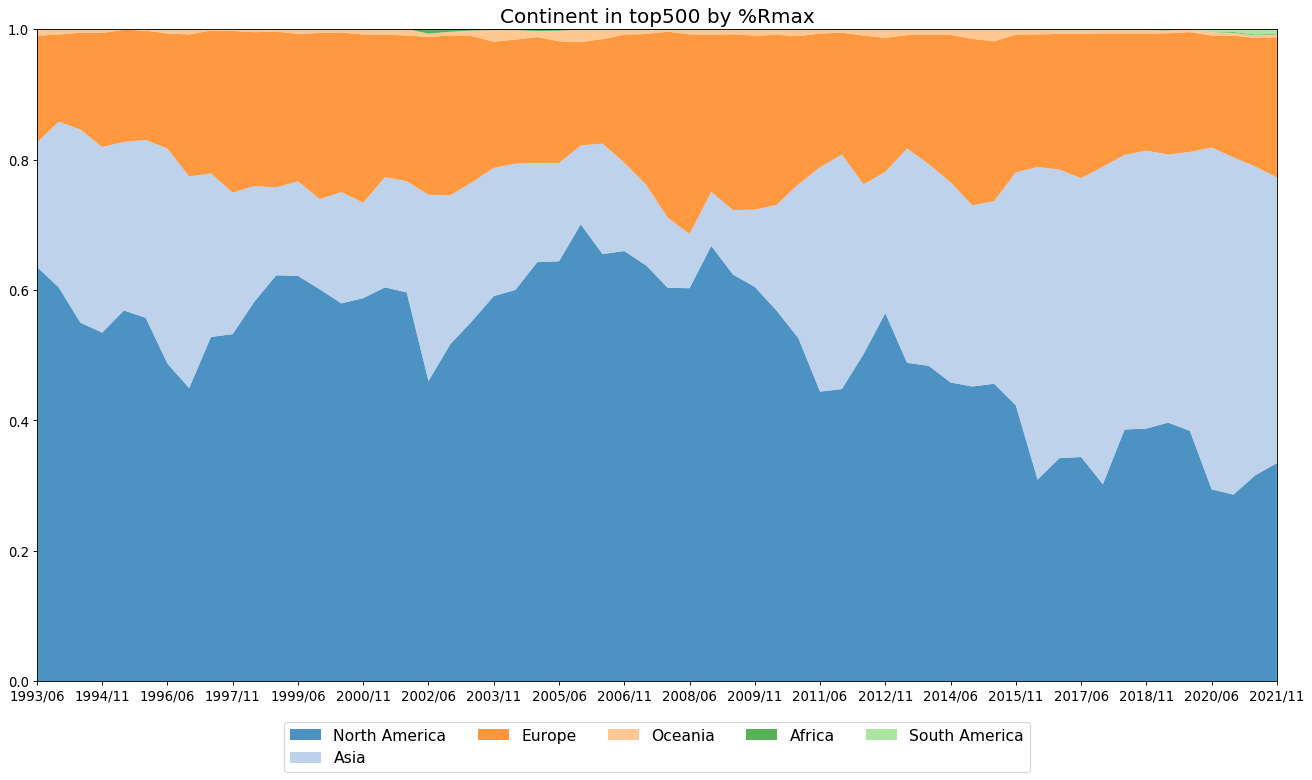

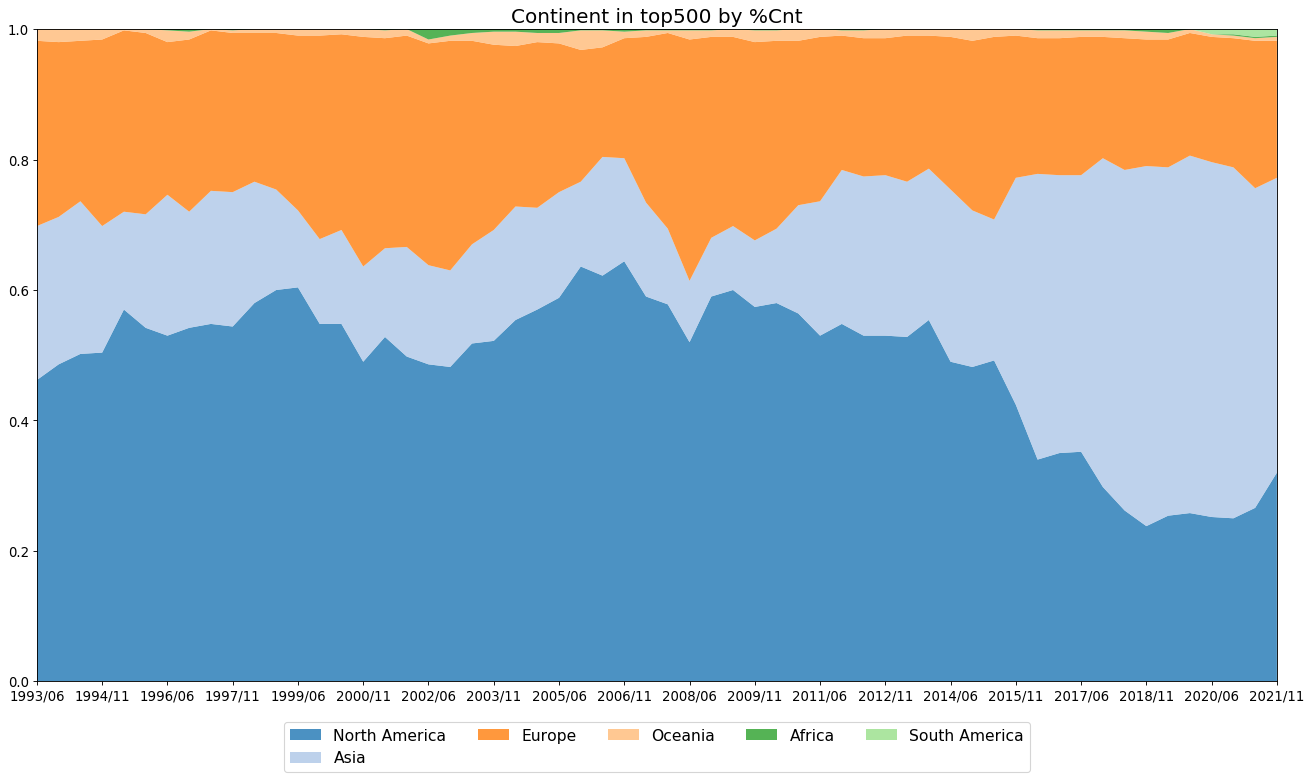

In [805]:
processor_continent_df = None
for date_string in data:
    # print(date_string)
    # processor_check = 'KSR'
    res = None
    if date_string < '2011/11':
        res = data[date_string].loc[:, ['Continent', 'RMax', 'RPeak', 'Rank']]
        res.rename(columns = {'RMax': 'Rmax', 
                              'RPeak': 'Rpeak'}, inplace = True)
        # try_print = data[date_string].loc[data[date_string]['Processor Family'] == processor_check, 'Processor']
    elif date_string < '2017/06':
        res = data[date_string].loc[:, ['Continent', 'Rmax', 'Rpeak', 'Rank']]
        # try_print = data[date_string].loc[data[date_string]['Processor Technology'] == processor_check, 'Processor']
    else:
        res = data[date_string].loc[:, ['Continent', 'Rmax [TFlop/s]', 'Rpeak [TFlop/s]', 'Rank']]
        # try_print = data[date_string].loc[data[date_string]['Processor Technology'] == processor_check, 'Processor']
        res.rename(columns = {'Rmax [TFlop/s]': 'Rmax', 'Rpeak [TFlop/s]': 'Rpeak'}, inplace = True)
    # print(try_print)

    res.loc[:, 'PubDate'] = date_string
    res.loc[:, 'PubYear'] = date_string[:4]
    res.loc[:, 'PubMonth'] = date_string[5:]
    if processor_continent_df is None:
        processor_continent_df = res
    else:
        processor_continent_df = pd.concat([processor_continent_df, res], ignore_index=True)
        
def change_cont(x):
    if x == 'Americas':
        return 'North America'
    else:
        return x

processor_continent_df['Continent'] = processor_continent_df['Continent'].apply(change_cont)

res = get_statistics_by_column(processor_continent_df, 'Continent', data.keys())
build_plot(res, 'Continent in top500 by %Rmax', '.* %Rmax$', 6)
build_plot(res, 'Continent in top500 by %Cnt', '.* %Cnt$', 5)

In [806]:
processor_end_df = None
for date_string in data:
    # print(date_string)
    # processor_check = 'KSR'
    res = None
    if date_string < '2011/11':
        res = data[date_string].loc[:, ['Processor Family', 'Continent', 'Segment', 'RMax', 'RPeak', 'Rank']]
        res.rename(columns = {'Processor Family': 'Processor Technology', 
                              'RMax': 'Rmax', 
                              'RPeak': 'Rpeak'}, inplace = True)
        # try_print = data[date_string].loc[data[date_string]['Processor Family'] == processor_check, 'Processor']
    elif date_string < '2017/06':
        res = data[date_string].loc[:, ['Processor Technology', 'Continent', 'Segment', 'Rmax', 'Rpeak', 'Rank']]
        # try_print = data[date_string].loc[data[date_string]['Processor Technology'] == processor_check, 'Processor']
    else:
        res = data[date_string].loc[:, ['Processor Technology', 'Continent', 'Segment', 'Rmax [TFlop/s]', 'Rpeak [TFlop/s]', 'Rank']]
        # try_print = data[date_string].loc[data[date_string]['Processor Technology'] == processor_check, 'Processor']
        res.rename(columns = {'Rmax [TFlop/s]': 'Rmax', 'Rpeak [TFlop/s]': 'Rpeak'}, inplace = True)
    # print(try_print)

    res.loc[:, 'PubDate'] = date_string
    res.loc[:, 'PubYear'] = date_string[:4]
    res.loc[:, 'PubMonth'] = date_string[5:]
    if processor_end_df is None:
        processor_end_df = res
    else:
        processor_end_df = pd.concat([processor_end_df, res], ignore_index=True)
        
def change_cont(x):
    if x == 'Americas':
        return 'North America'
    else:
        return x

processor_end_df['Continent'] = processor_end_df['Continent'].apply(change_cont)

processor_end_df['Processor Company'] = processor_end_df['Processor Technology'].copy()
processor_end_df['Processor Company'] = processor_end_df['Processor Company'].apply(
    lambda key: TechnologyCompanyMap[key])
processor_end_df

Processor Technology      Continent     Segment     Rmax    Rpeak  Rank  \
0                    Sparc  North America    Research    59.70   131.00     1   
1                    Sparc  North America    Industry    30.40    69.63     2   
2                    Sparc  North America    Academic    30.40    65.54     3   
3                    Sparc  North America  Classified    30.40    65.54     4   
4                      NEC           Asia      Vendor    23.20    25.60     5   
...                    ...            ...         ...      ...      ...   ...   
28995      Intel Broadwell         Europe    Industry  1649.11  2119.68   496   
28996      Intel Broadwell         Europe    Industry  1649.11  2119.68   497   
28997      Intel Broadwell         Europe    Industry  1649.11  2119.68   498   
28998      Intel Broadwell         Europe    Industry  1649.11  2119.68   499   
28999      Intel Broadwell         Europe    Industry  1649.11  2119.68   500   

       PubDate PubYear PubMonth Processor Company  
0      1993/06    1993       06  Sun Microsystems  
1      1993/06    1993       06  Sun Microsystems  
2      1993/06    1993       06  Sun Microsystems  
3      1993/06    1993       06  Sun Microsystems  
4      1993/06    1993       06               NEC  
...        ...     ...      ...               ...  
28995  2021/11    2021       11             Intel  
28996  2021/11    2021       11             Intel  
28997  2021/11    2021       11             Intel  
28998  2021/11    2021       11             Intel  
28999  2021/11    2021       11             Intel  

[29000 rows x 10 columns]

## Asia

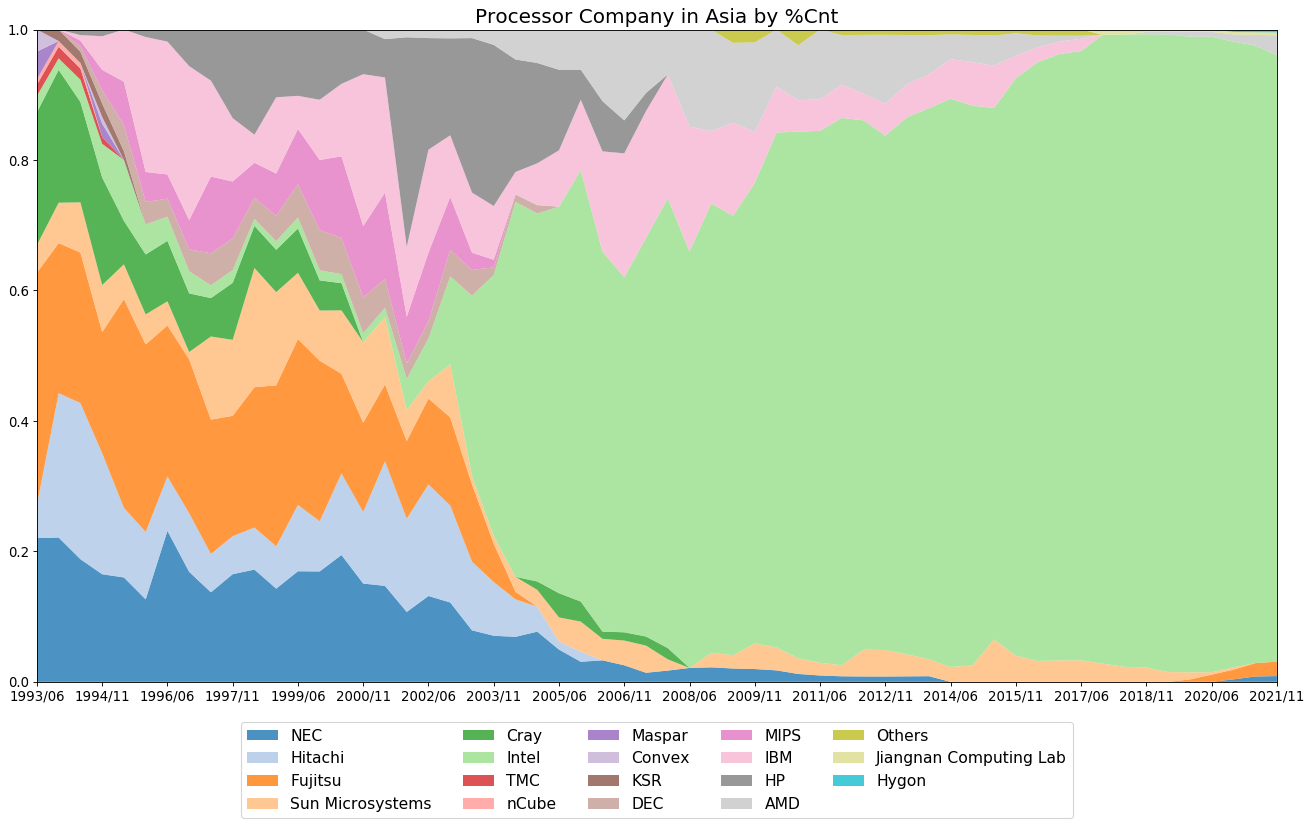

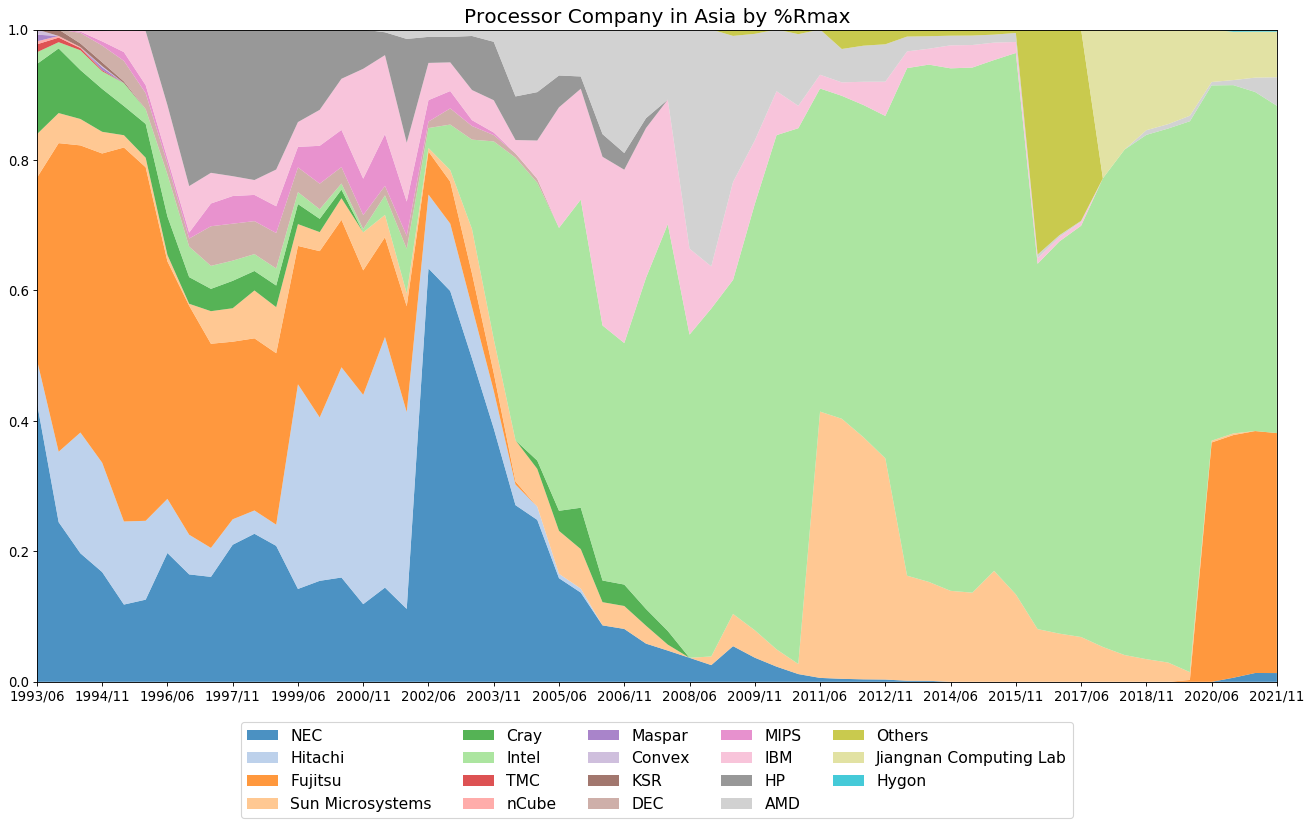

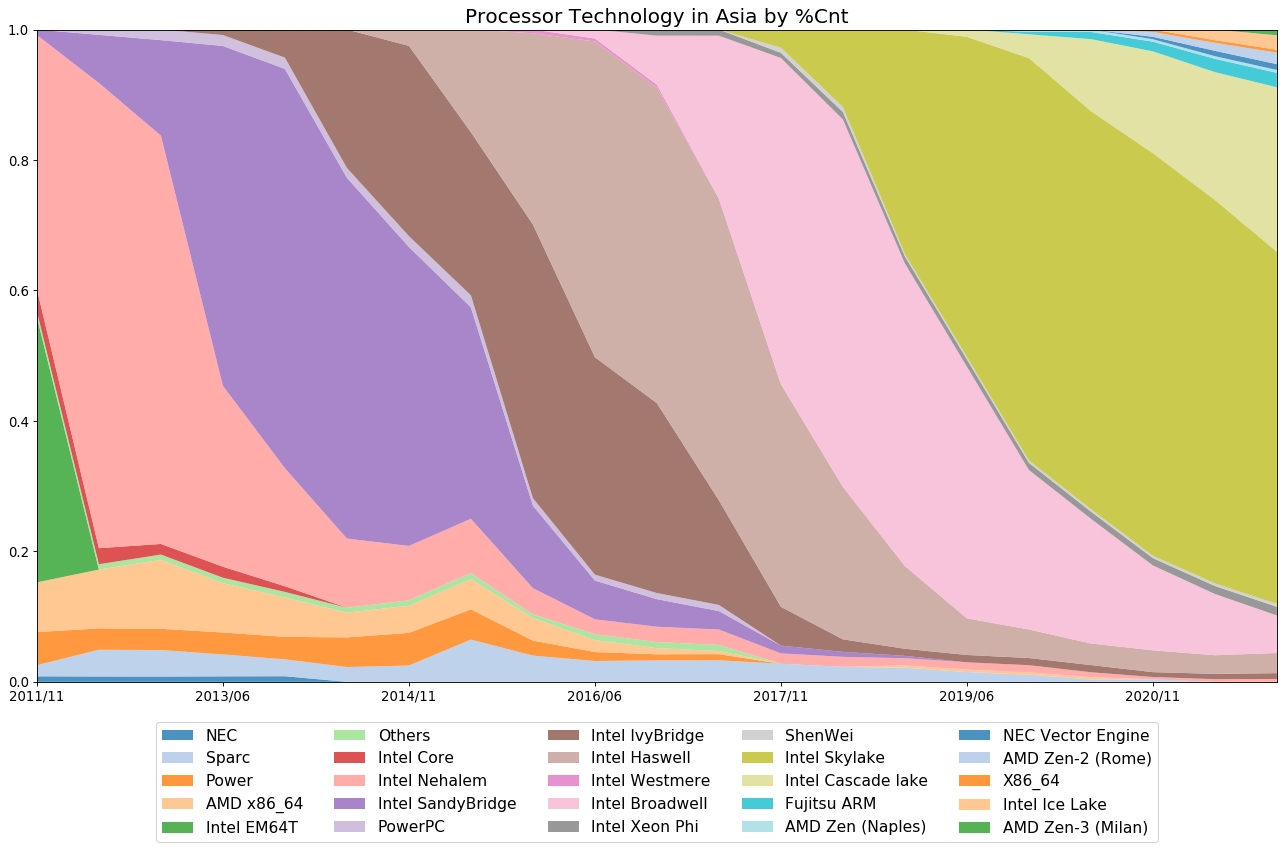

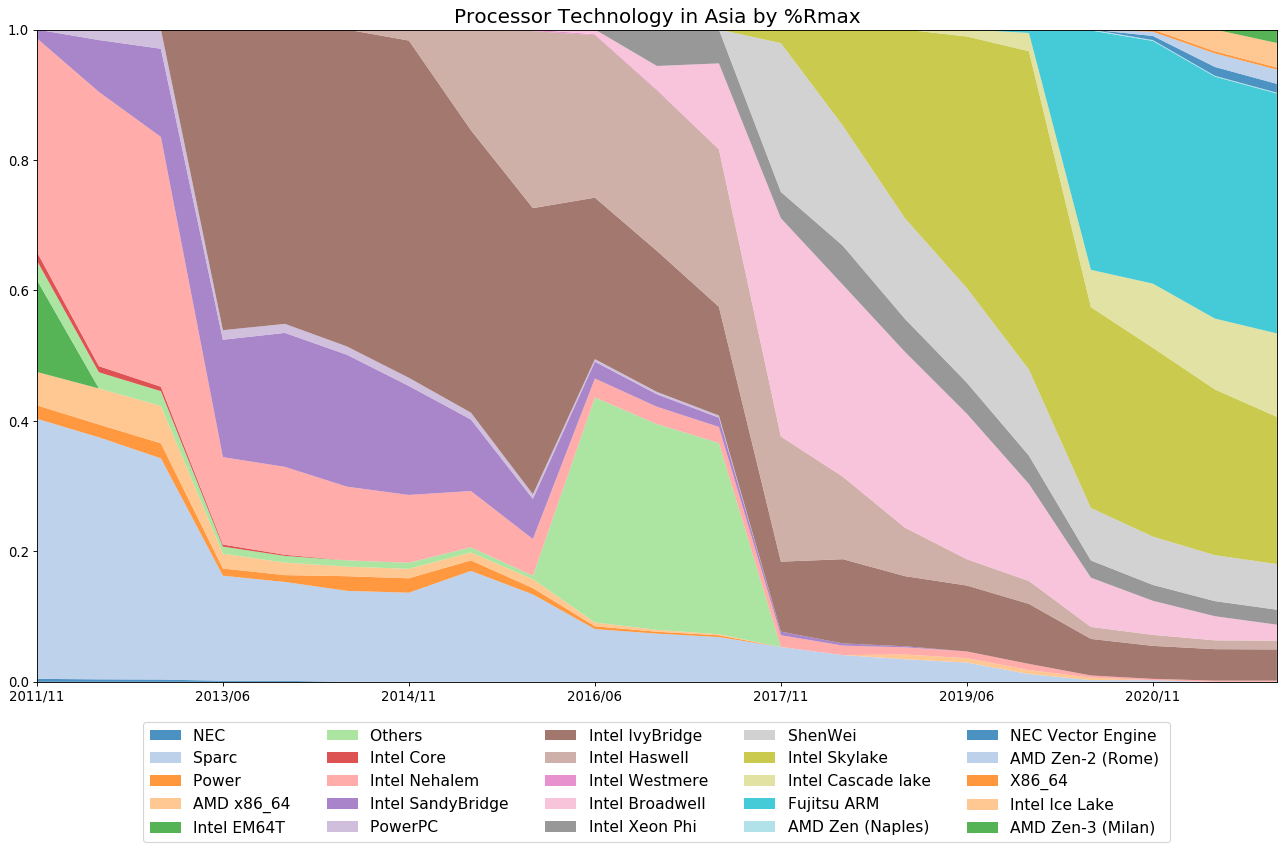

In [807]:
processor_asia_df = processor_end_df[processor_end_df['Continent'] == 'Asia']
res = get_statistics_by_column(processor_asia_df, 'Processor Company', data.keys())
build_plot(res, 'Processor Company in Asia by %Cnt', '.* %Cnt$', 5)
build_plot(res, 'Processor Company in Asia by %Rmax', '.* %Rmax$', 6)
res = get_statistics_by_column(processor_asia_df, 'Processor Technology', keys)
build_plot(res, 'Processor Technology in Asia by %Cnt', '.* %Cnt$', 5)
build_plot(res, 'Processor Technology in Asia by %Rmax', '.* %Rmax$', 5)

## North America

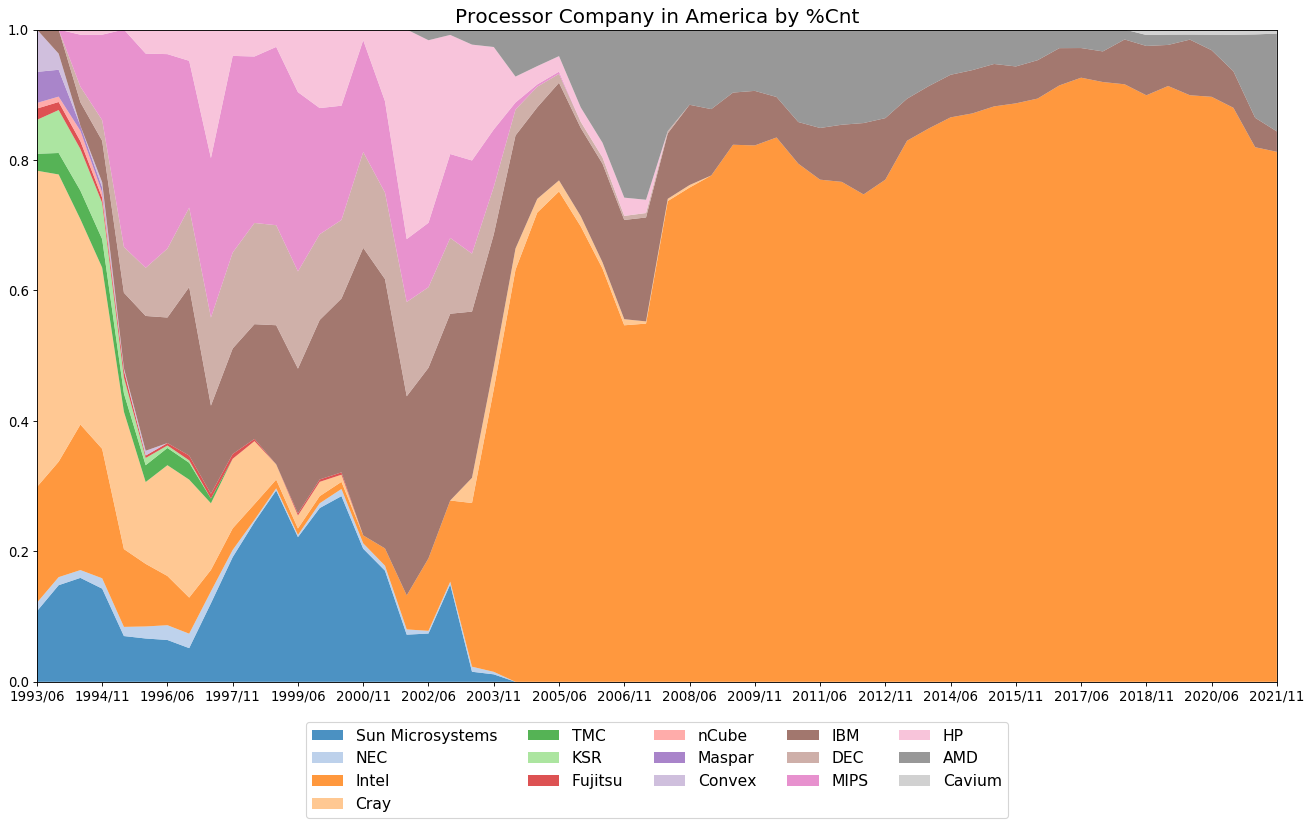

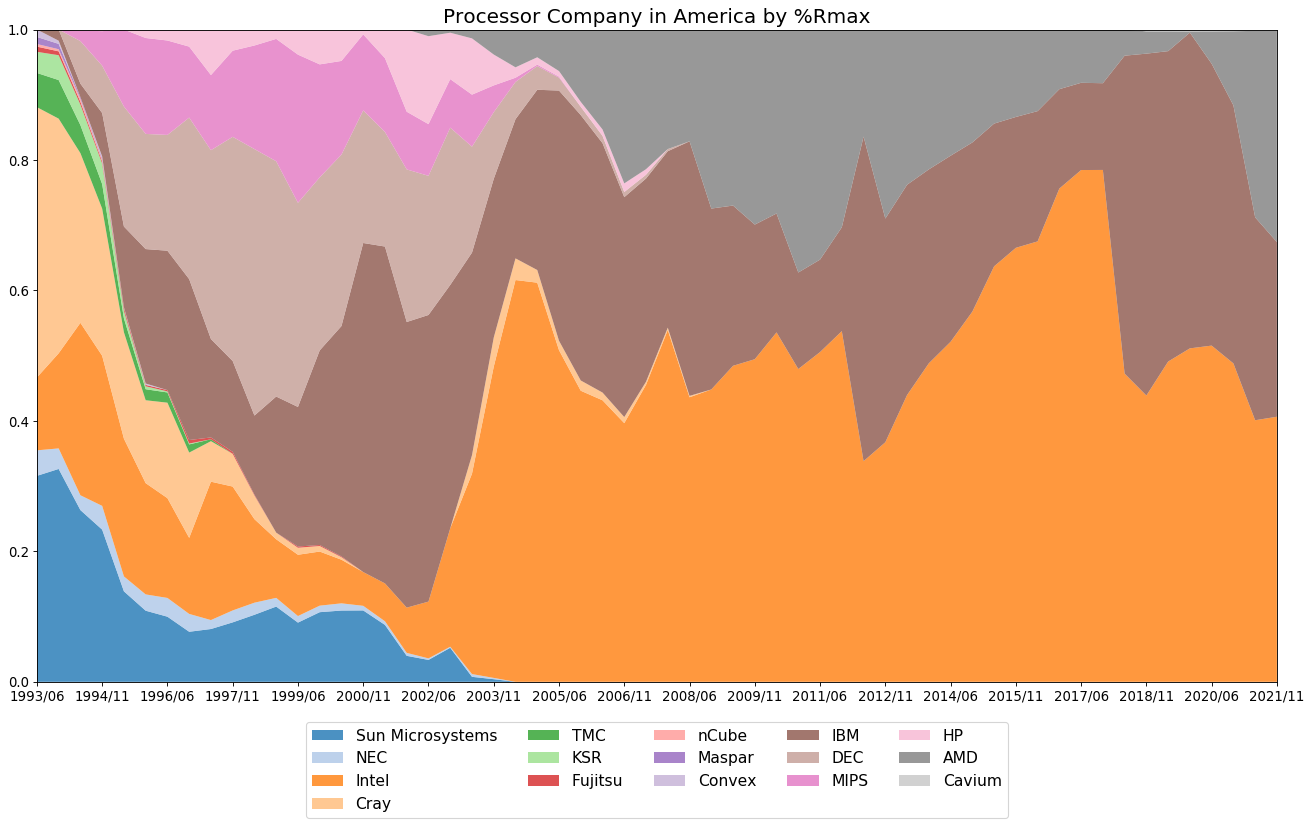

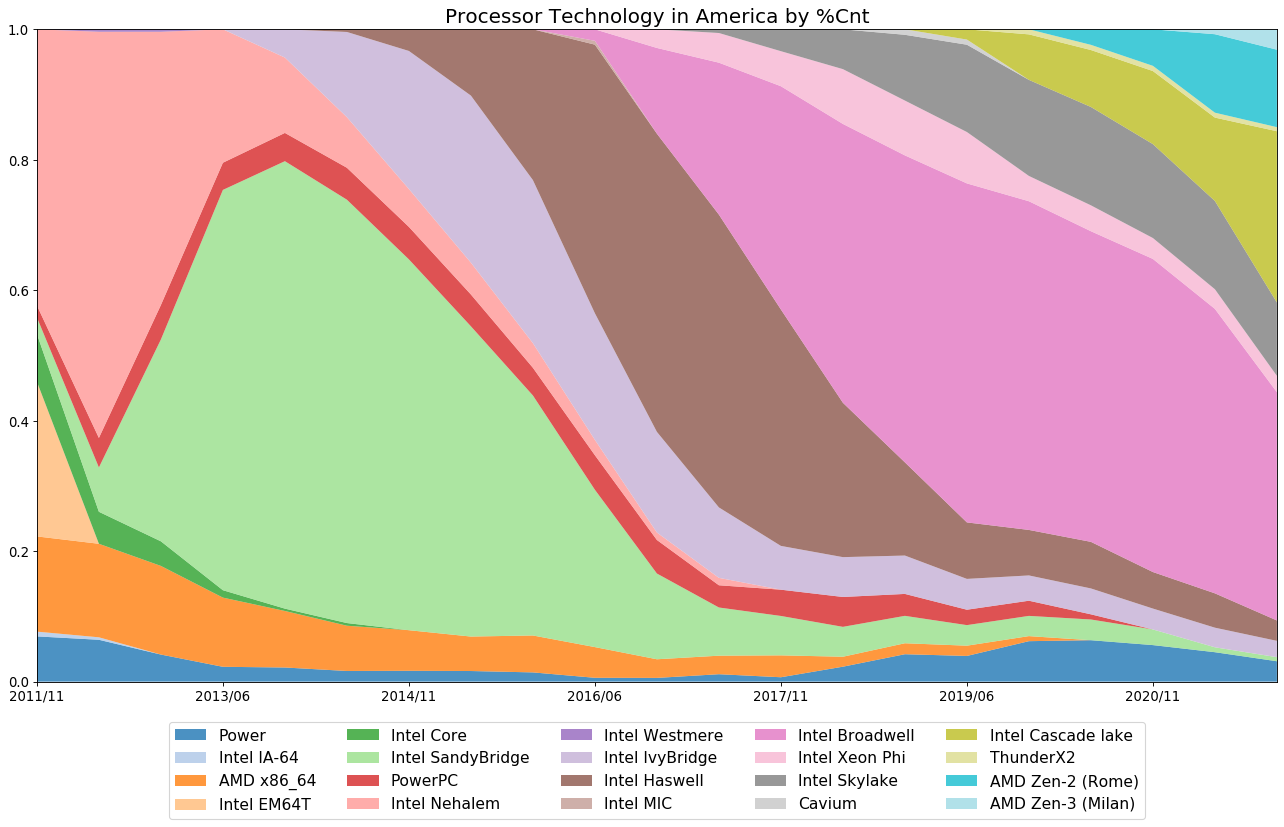

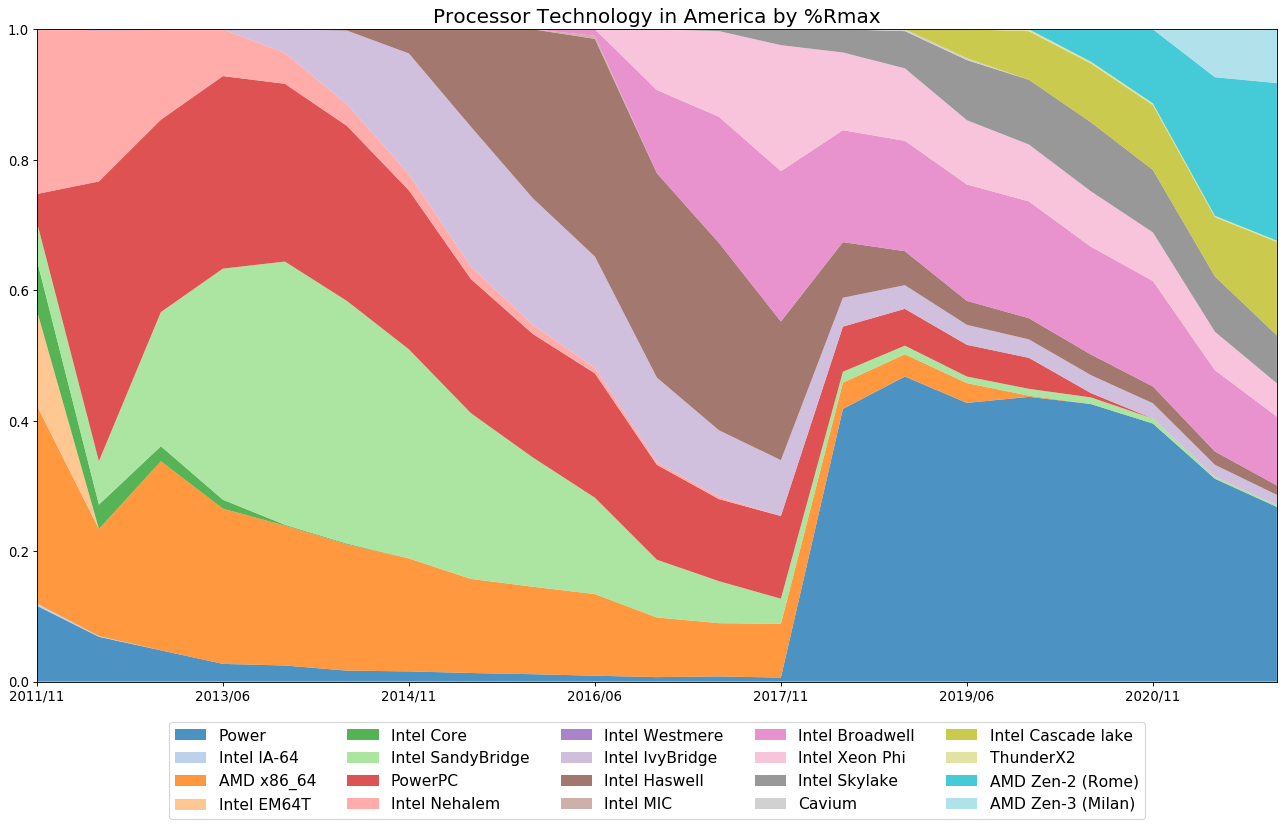

In [808]:
processor_america_df = processor_end_df[processor_end_df['Continent'] == 'North America']
res = get_statistics_by_column(processor_america_df, 'Processor Company', data.keys())
build_plot(res, 'Processor Company in America by %Cnt', '.* %Cnt$', 5)
build_plot(res, 'Processor Company in America by %Rmax', '.* %Rmax$')
res = get_statistics_by_column(processor_america_df, 'Processor Technology', keys)
build_plot(res, 'Processor Technology in America by %Cnt', '.* %Cnt$', 5)
build_plot(res, 'Processor Technology in America by %Rmax', '.* %Rmax$', 6)

## Europe

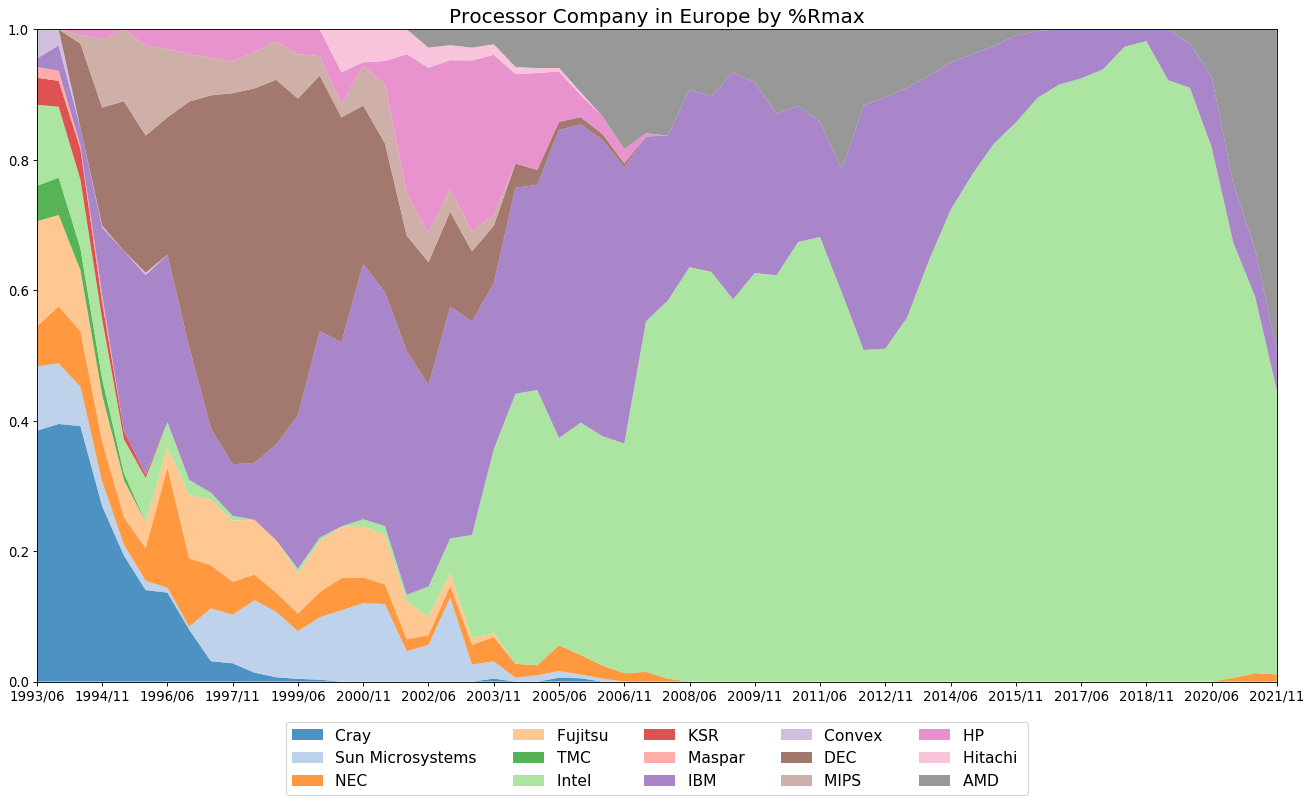

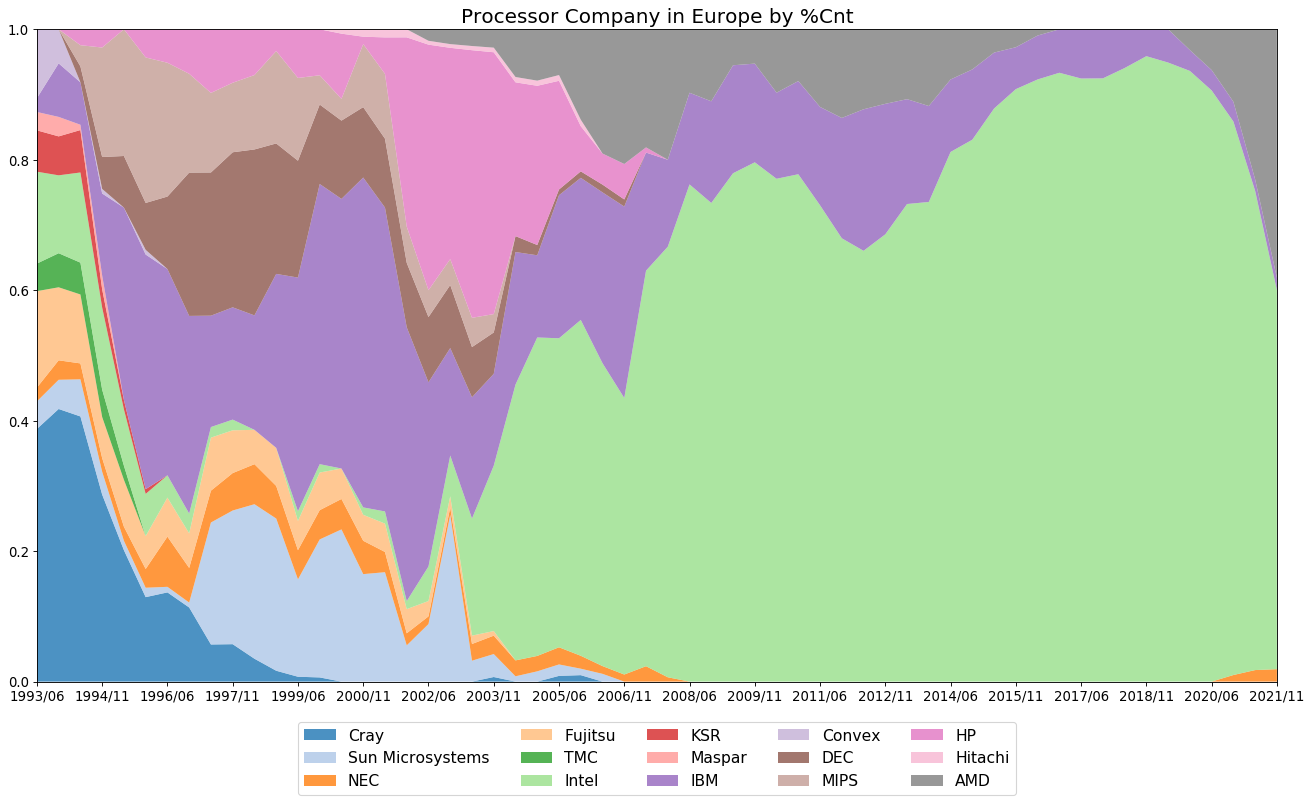

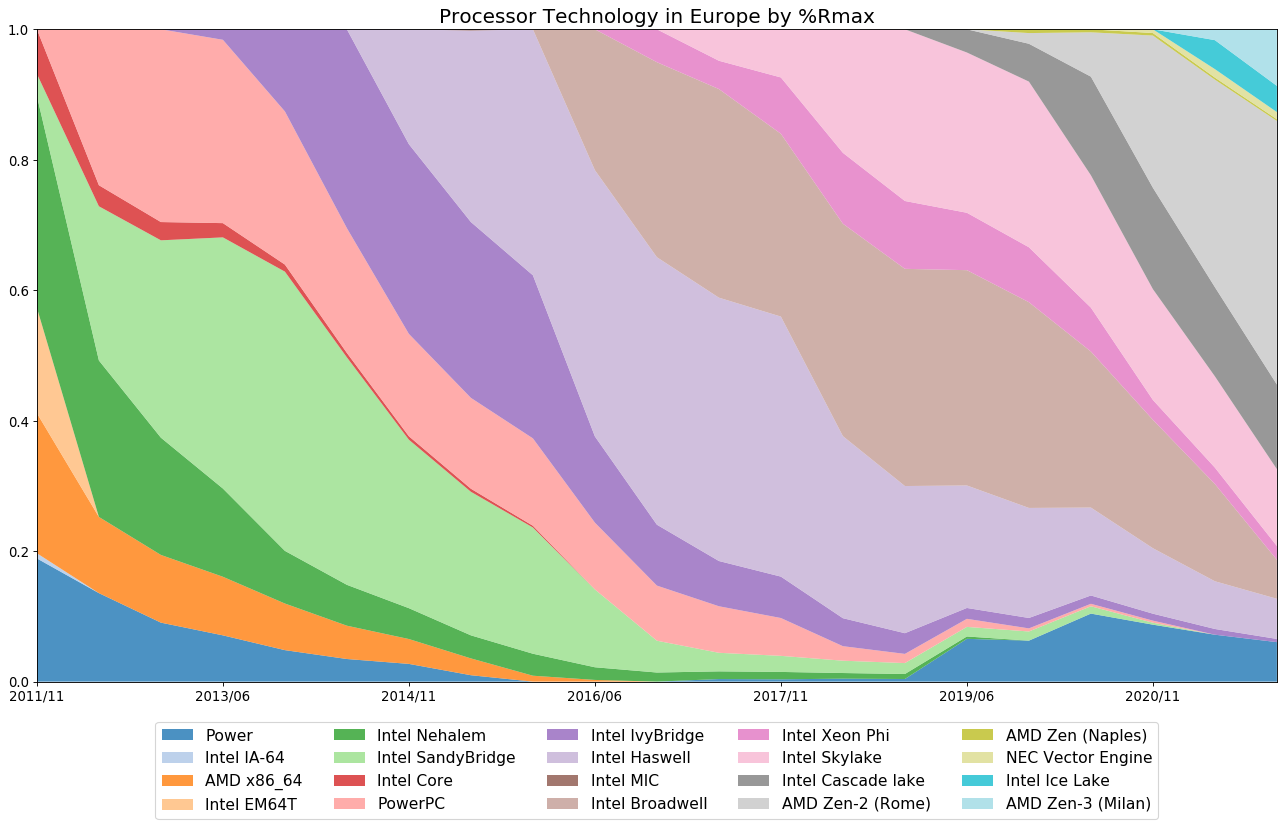

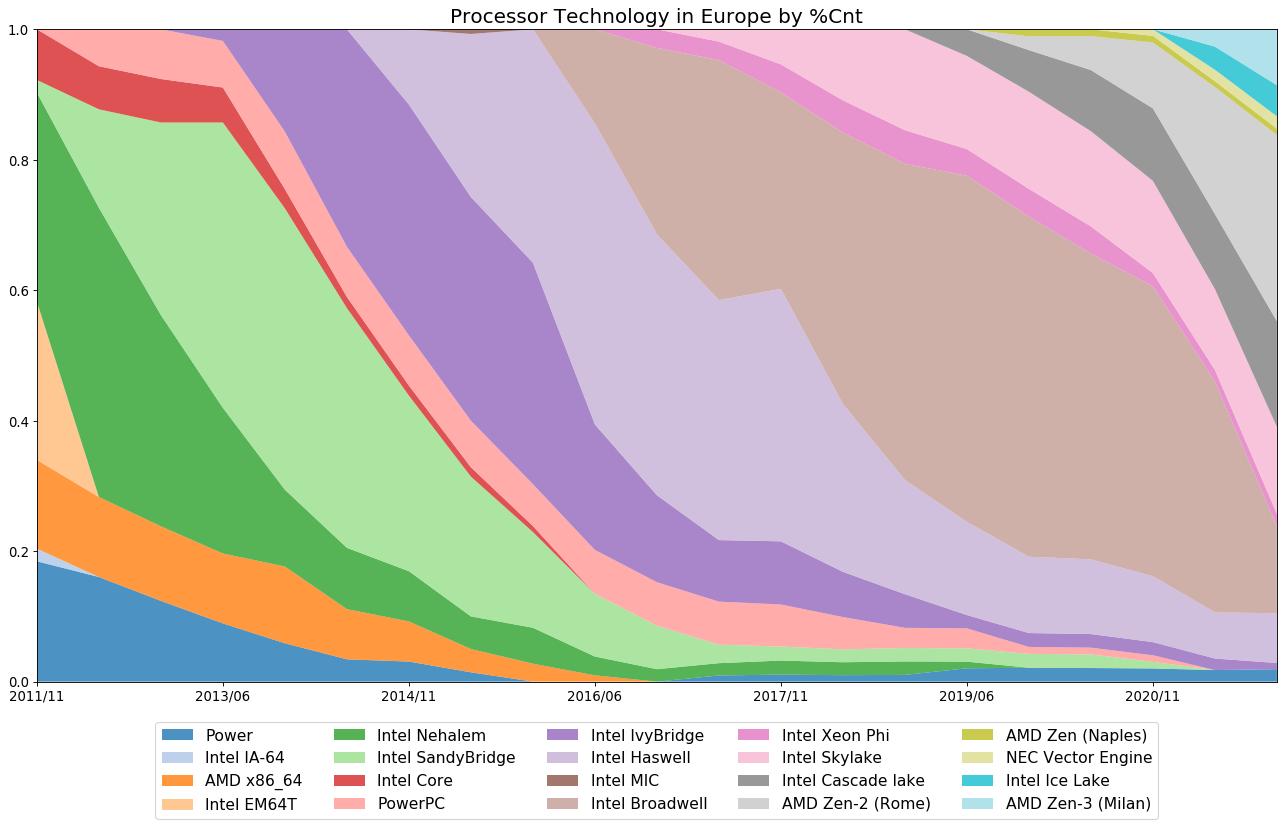

In [809]:
processor_europe_df = processor_end_df[processor_end_df['Continent'] == 'Europe']
res = get_statistics_by_column(processor_europe_df, 'Processor Company', data.keys())
build_plot(res, 'Processor Company in Europe by %Rmax', '.* %Rmax$', 5)
build_plot(res, 'Processor Company in Europe by %Cnt', '.* %Cnt$', 5)
res = get_statistics_by_column(processor_europe_df, 'Processor Technology', keys)
build_plot(res, 'Processor Technology in Europe by %Rmax', '.* %Rmax$', 6)
build_plot(res, 'Processor Technology in Europe by %Cnt', '.* %Cnt$', 5)

## Segment

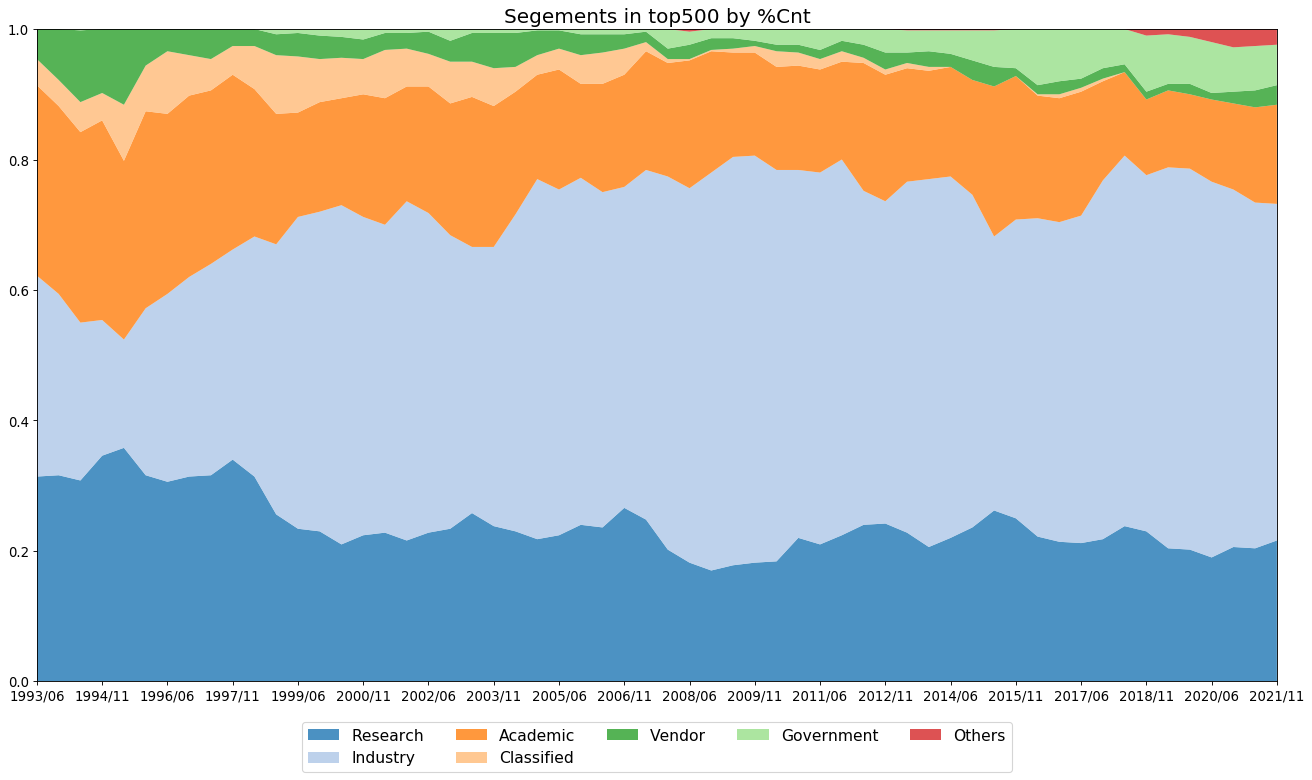

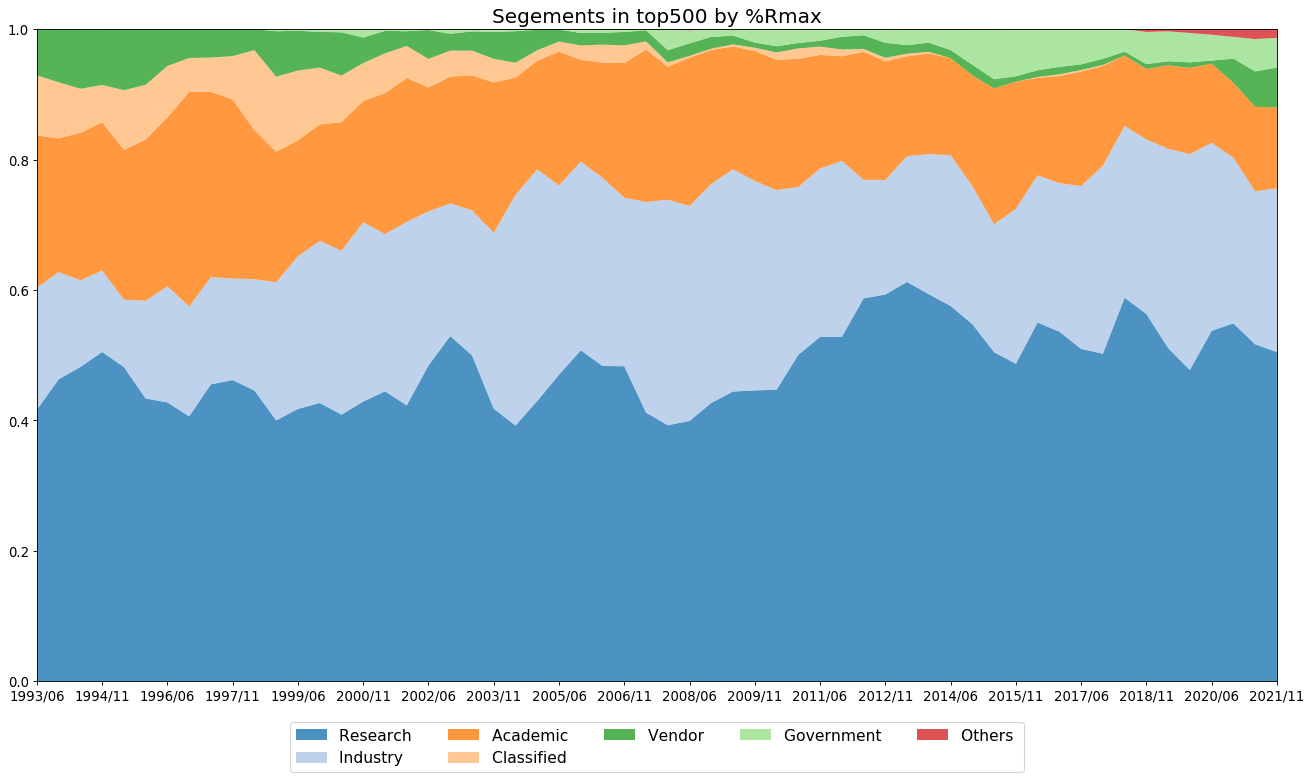

In [810]:
res = get_statistics_by_column(processor_end_df, 'Segment', data.keys(), 500)
build_plot(res, 'Segements in top500 by %Cnt', '.* %Cnt$', 5)
build_plot(res, 'Segements in top500 by %Rmax', '.* %Rmax$', 5)

## Research

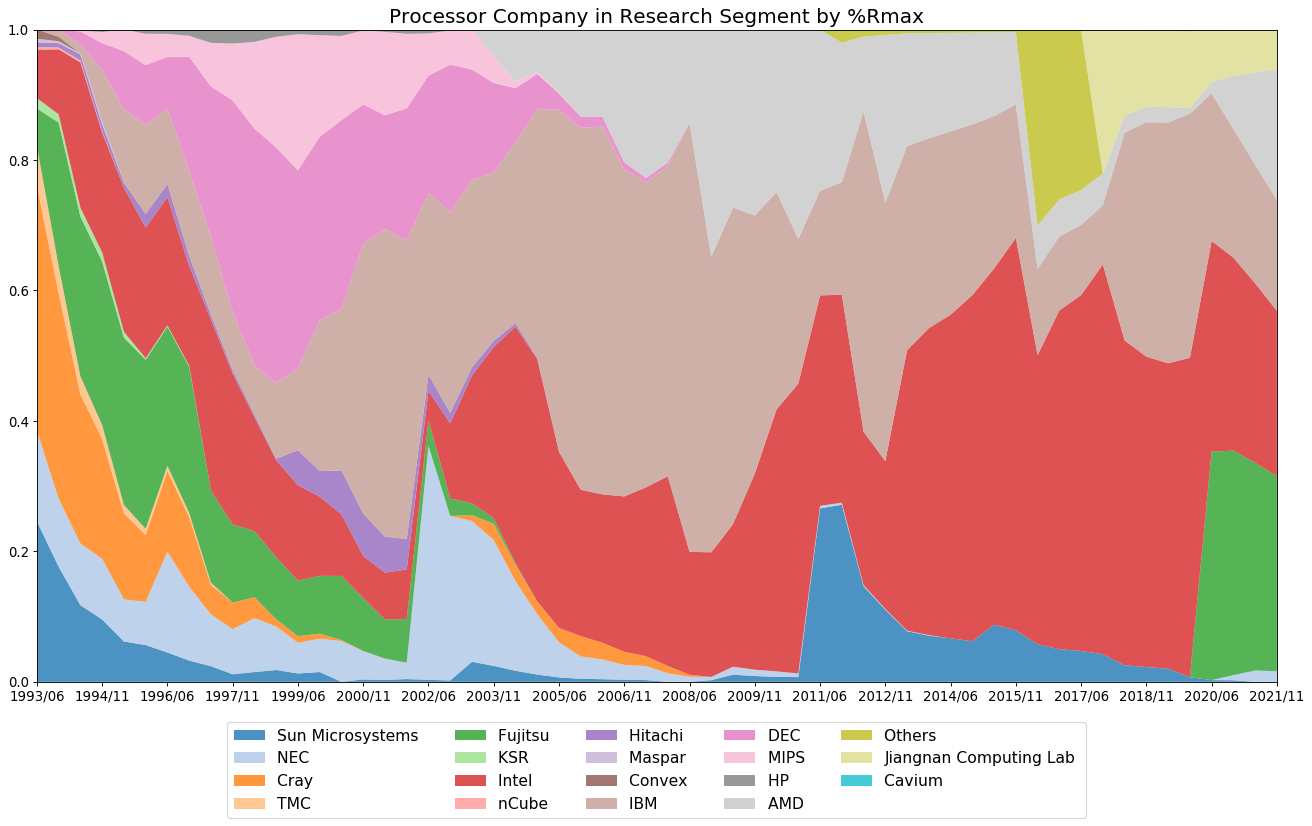

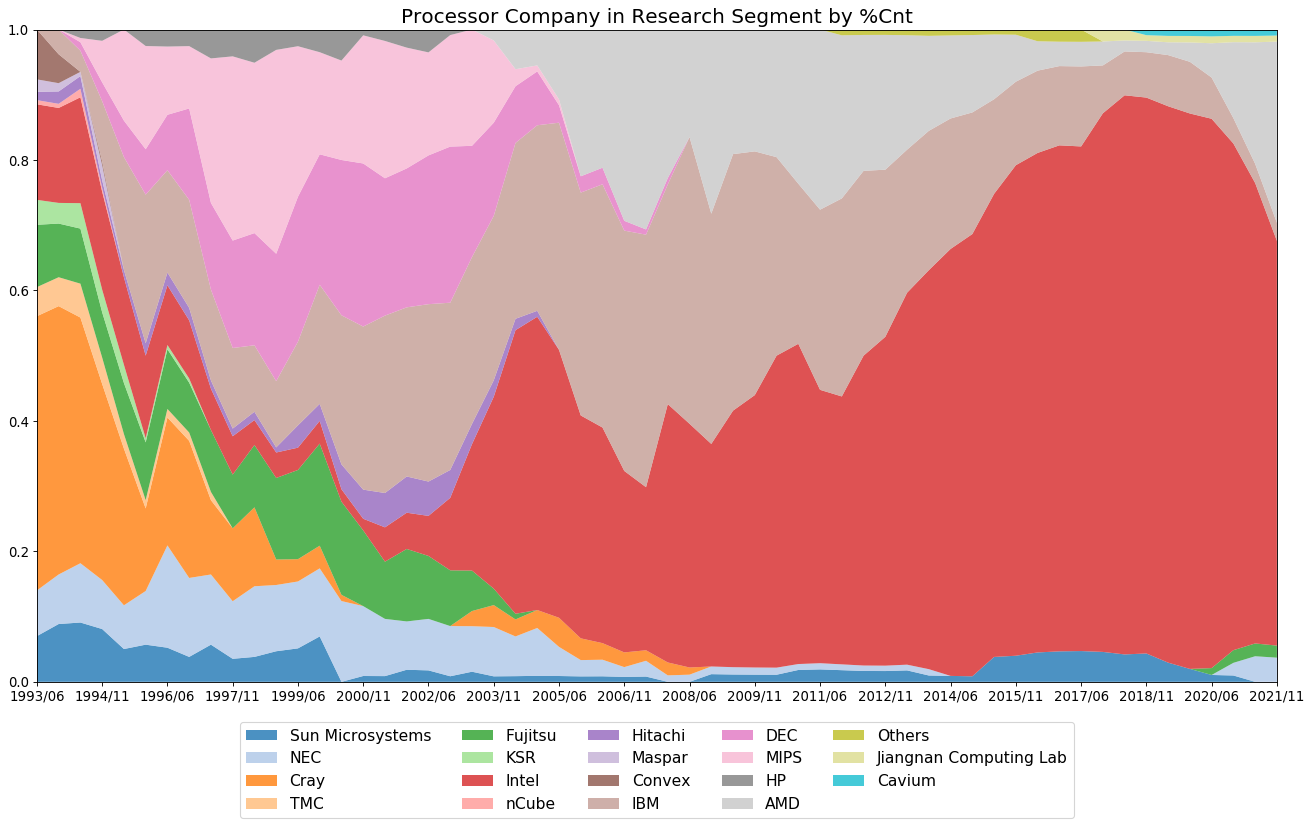

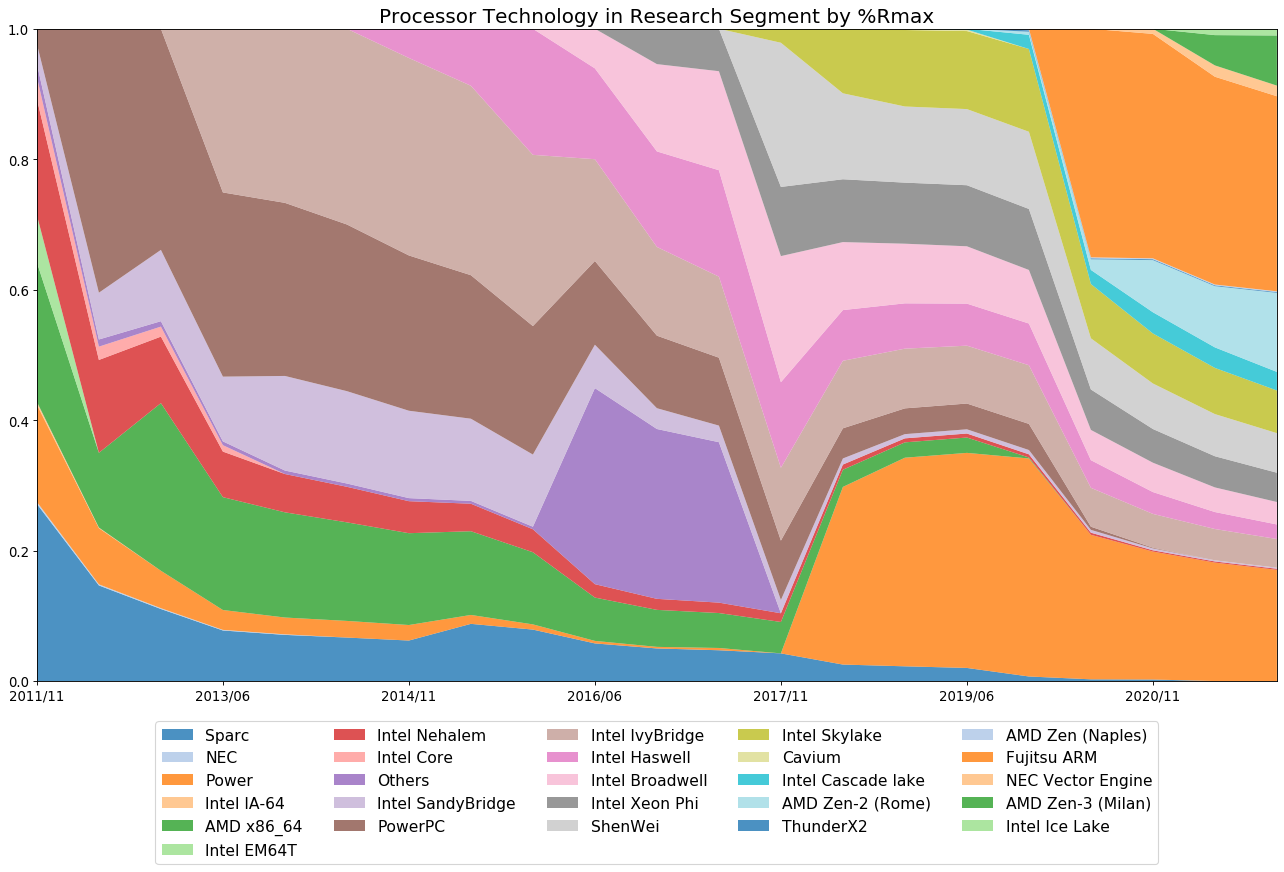

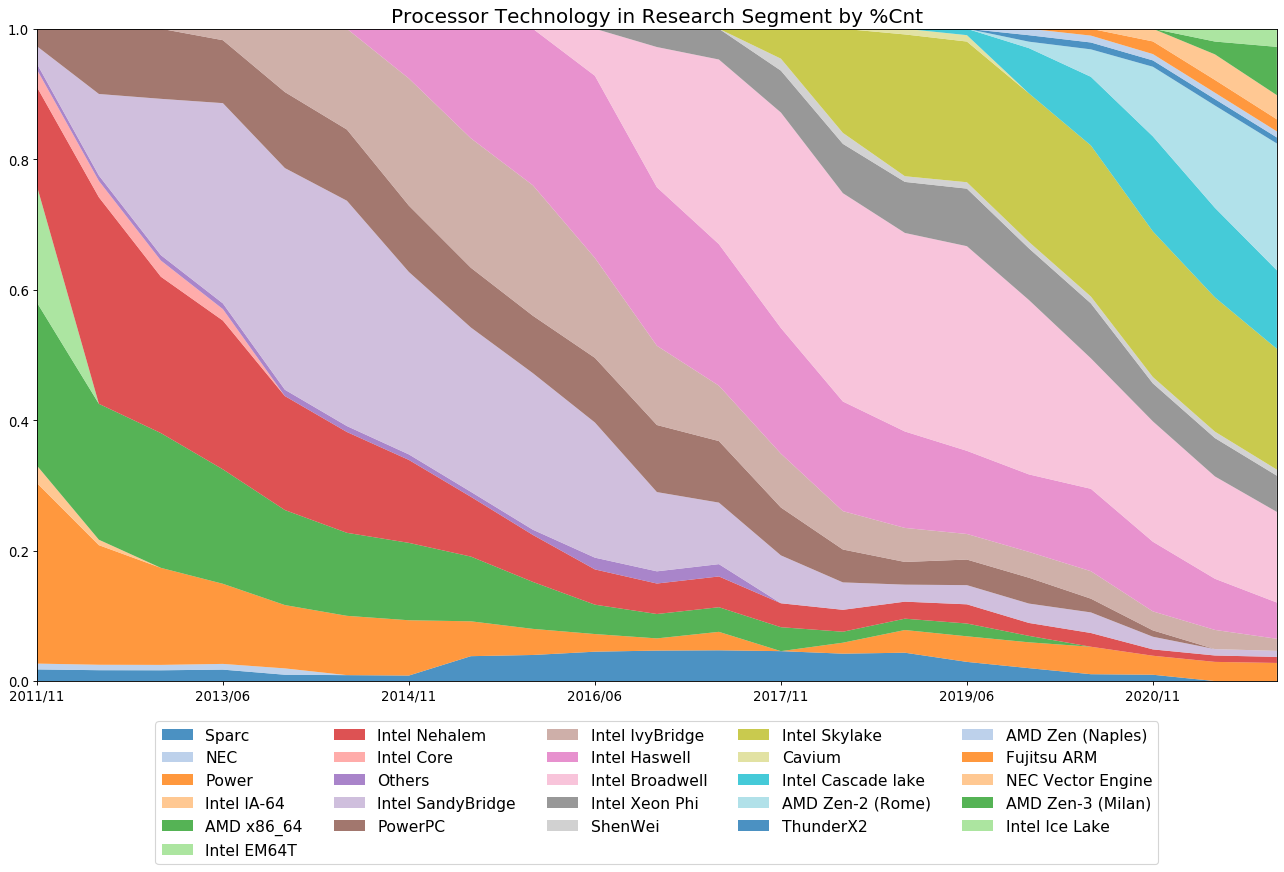

In [811]:
processor_research_df = processor_end_df[processor_end_df['Segment'] == 'Research']
res = get_statistics_by_column(processor_research_df, 'Processor Company', data.keys())
build_plot(res, 'Processor Company in Research Segment by %Rmax', '.* %Rmax$', 5)
build_plot(res, 'Processor Company in Research Segment by %Cnt', '.* %Cnt$', 5)
res = get_statistics_by_column(processor_research_df, 'Processor Technology', keys)
build_plot(res, 'Processor Technology in Research Segment by %Rmax', '.* %Rmax$', 6)
build_plot(res, 'Processor Technology in Research Segment by %Cnt', '.* %Cnt$', 5)

## Industry

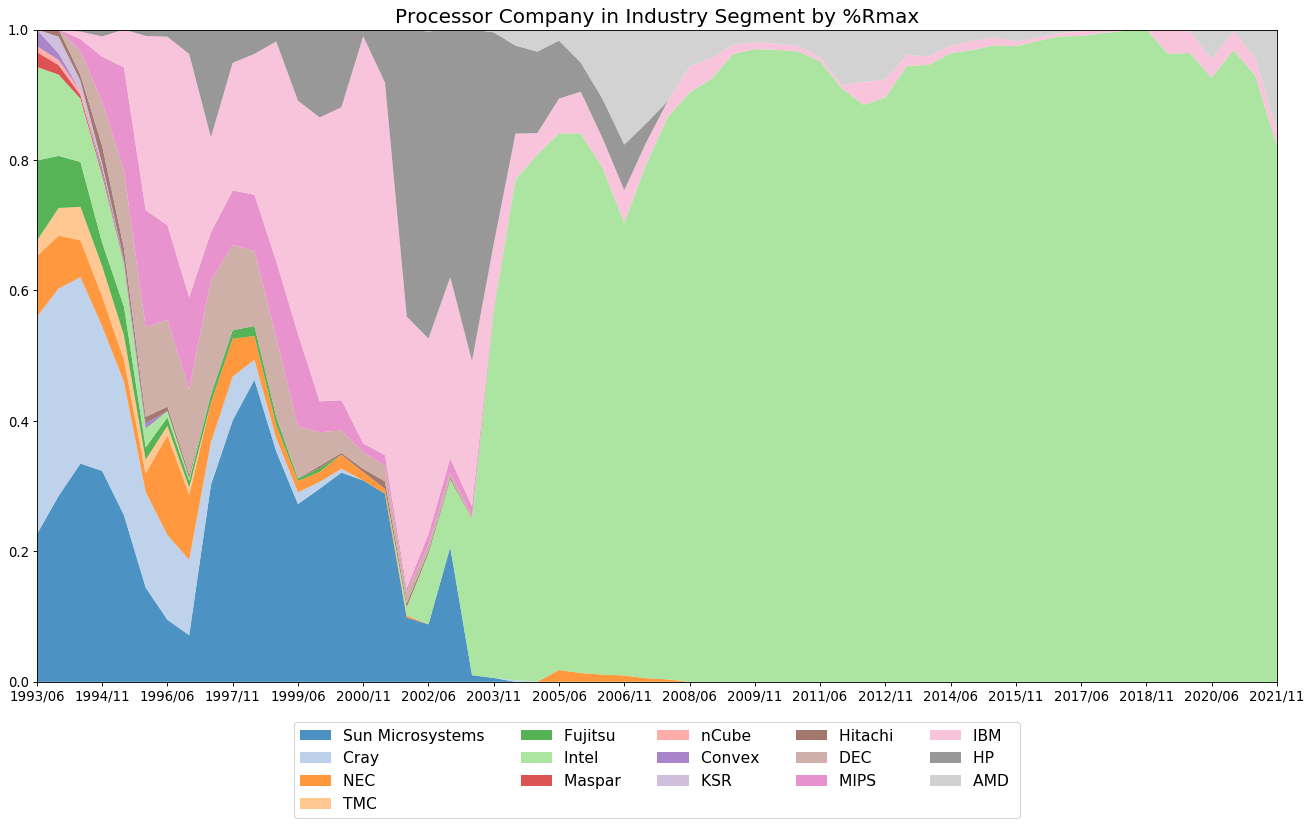

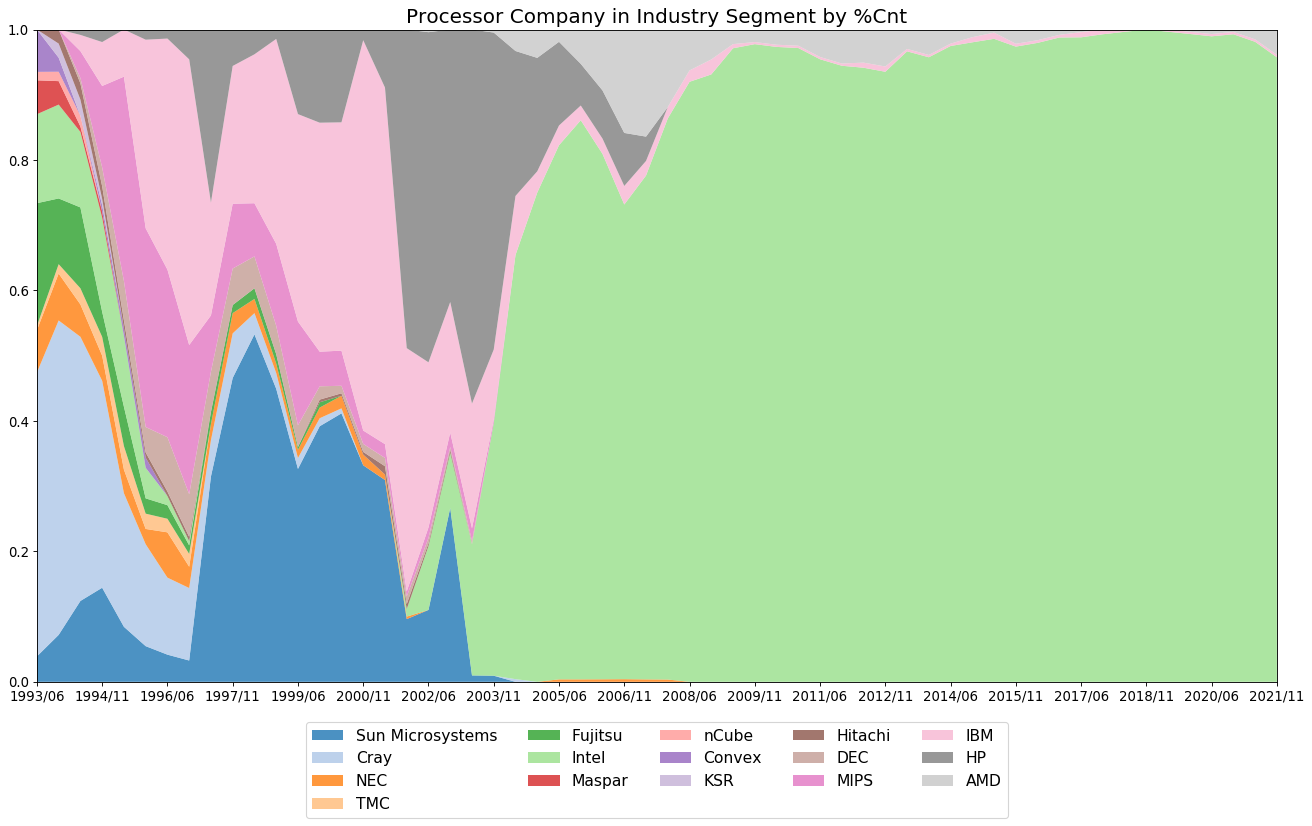

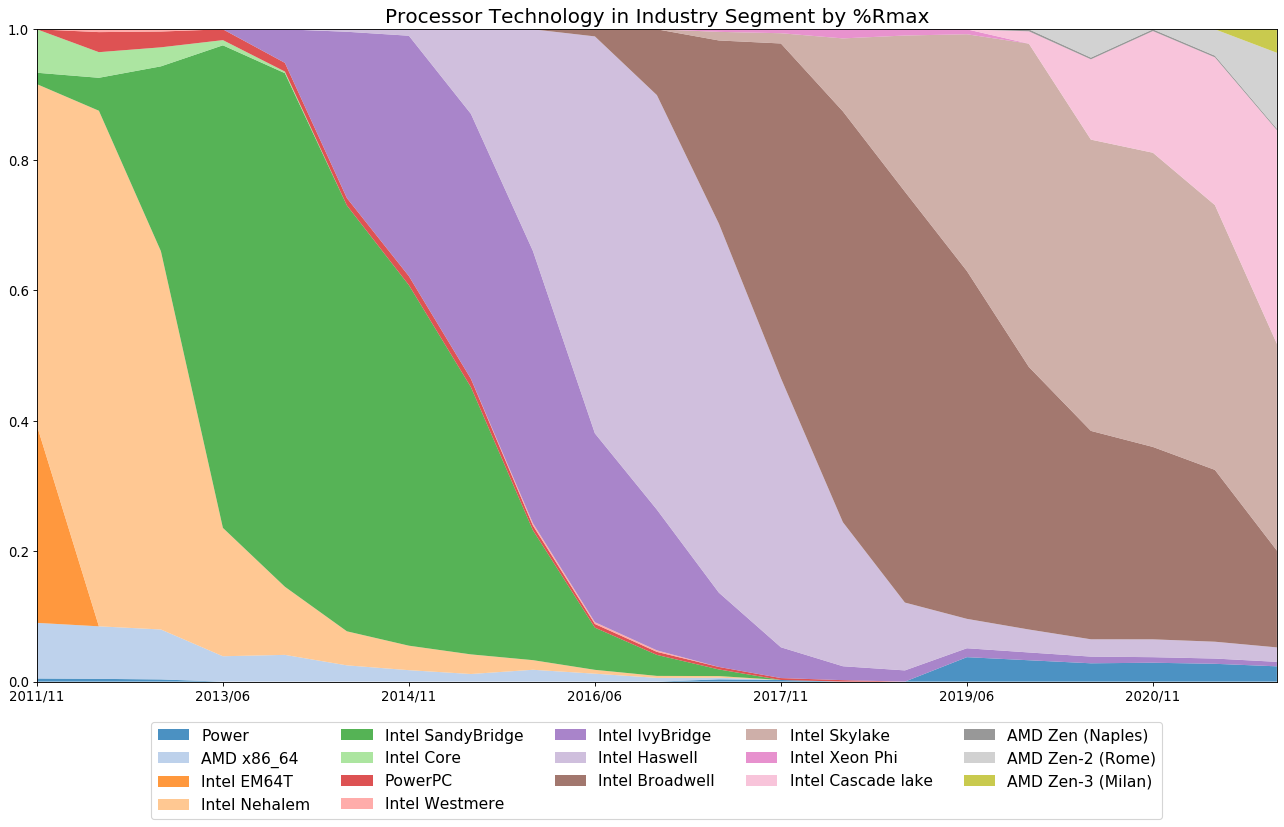

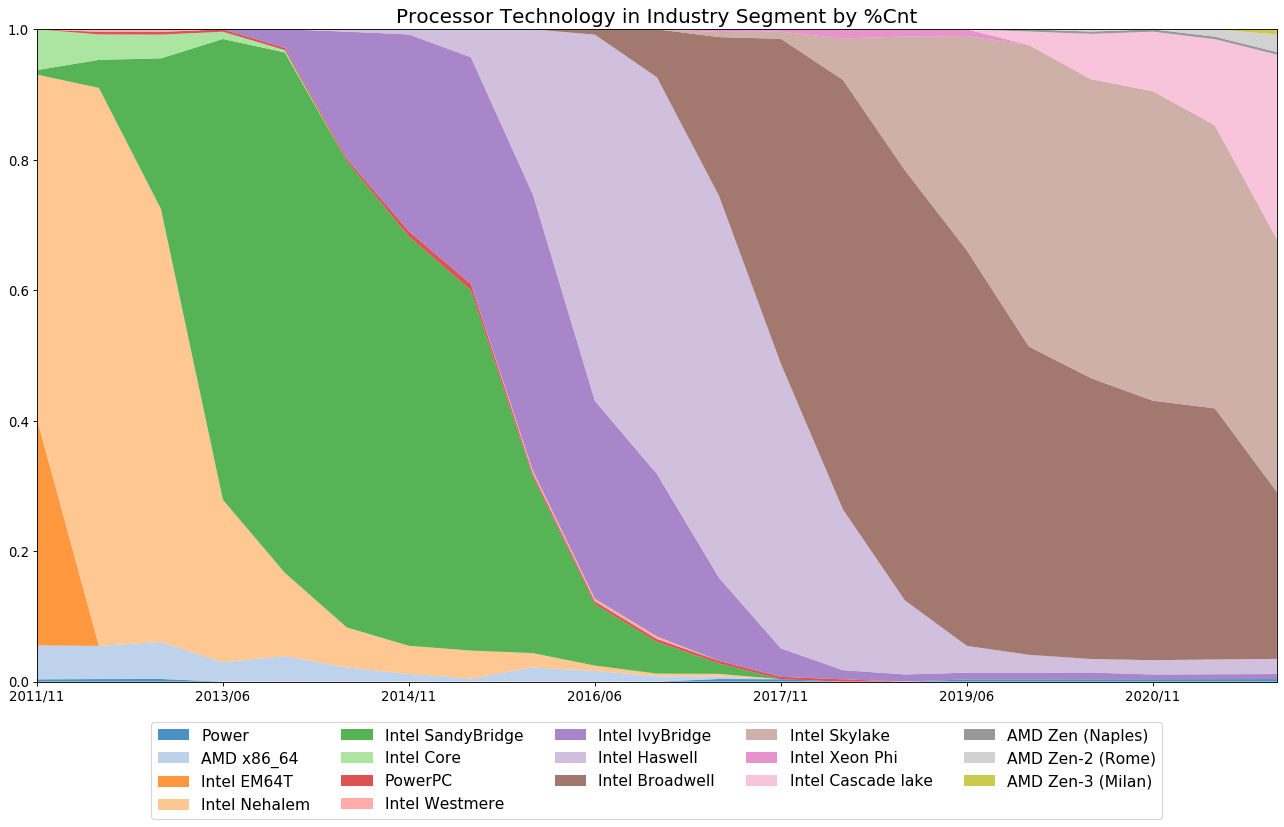

In [813]:
processor_industry_df = processor_end_df[processor_end_df['Segment'] == 'Industry']
res = get_statistics_by_column(processor_industry_df, 'Processor Company', data.keys())
build_plot(res, 'Processor Company in Industry Segment by %Rmax', '.* %Rmax$', 5)
build_plot(res, 'Processor Company in Industry Segment by %Cnt', '.* %Cnt$', 5)
res = get_statistics_by_column(processor_industry_df, 'Processor Technology', keys)
build_plot(res, 'Processor Technology in Industry Segment by %Rmax', '.* %Rmax$', 6)
build_plot(res, 'Processor Technology in Industry Segment by %Cnt', '.* %Cnt$', 5)

## Academic

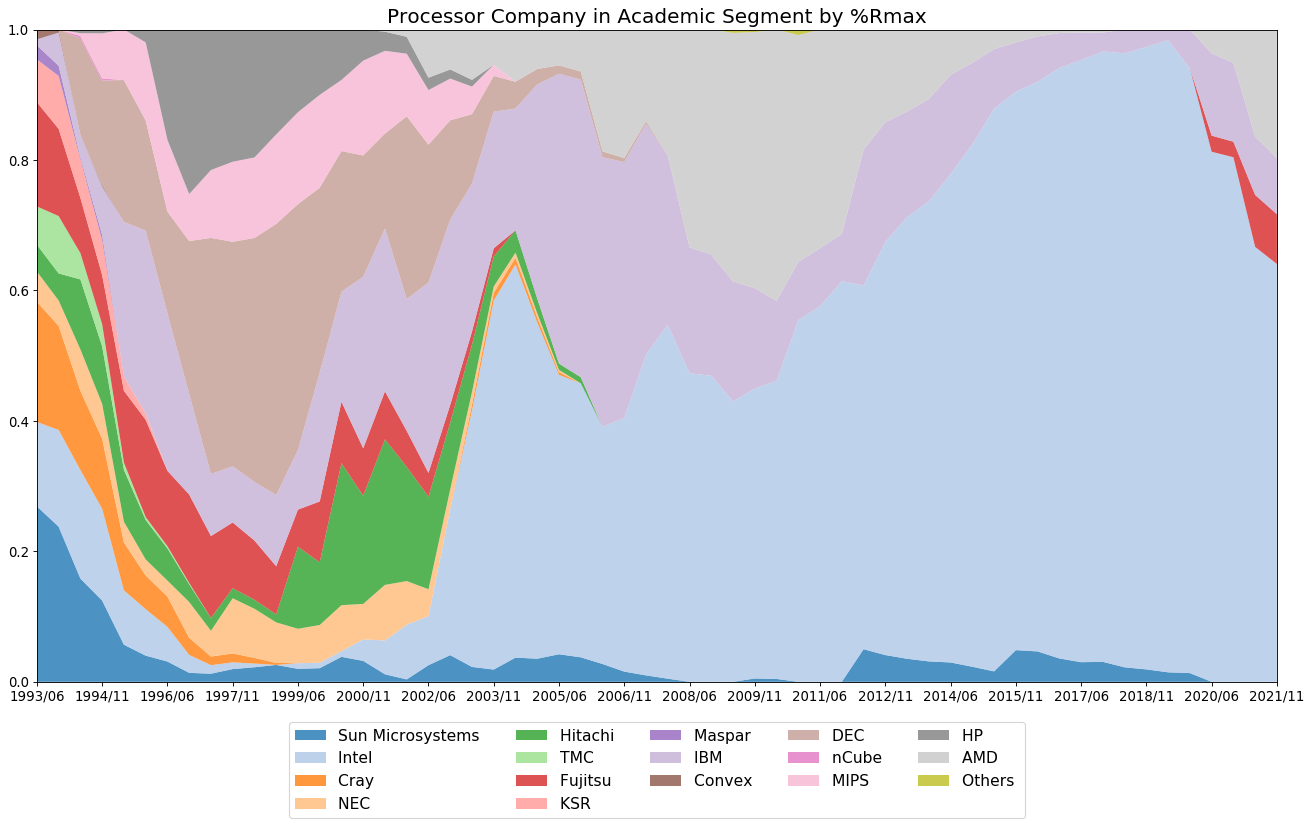

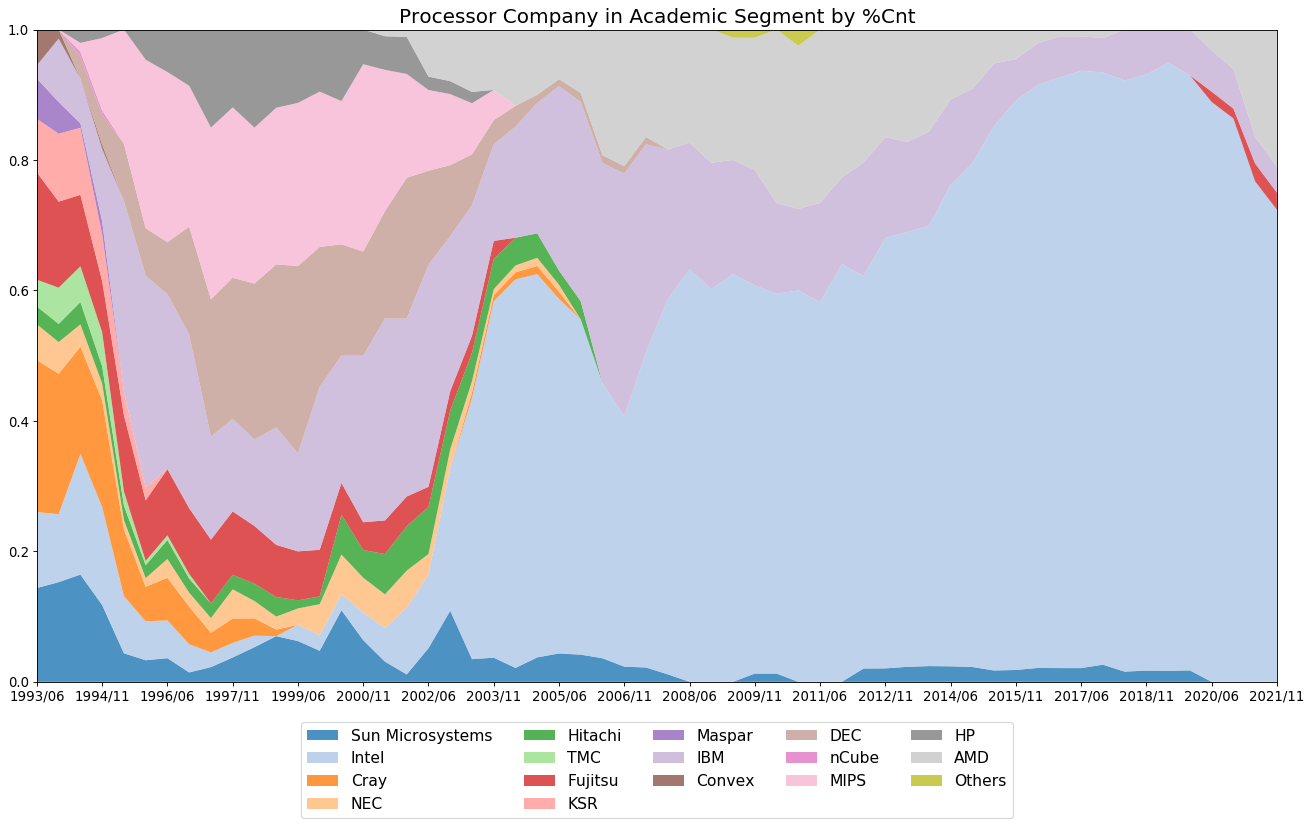

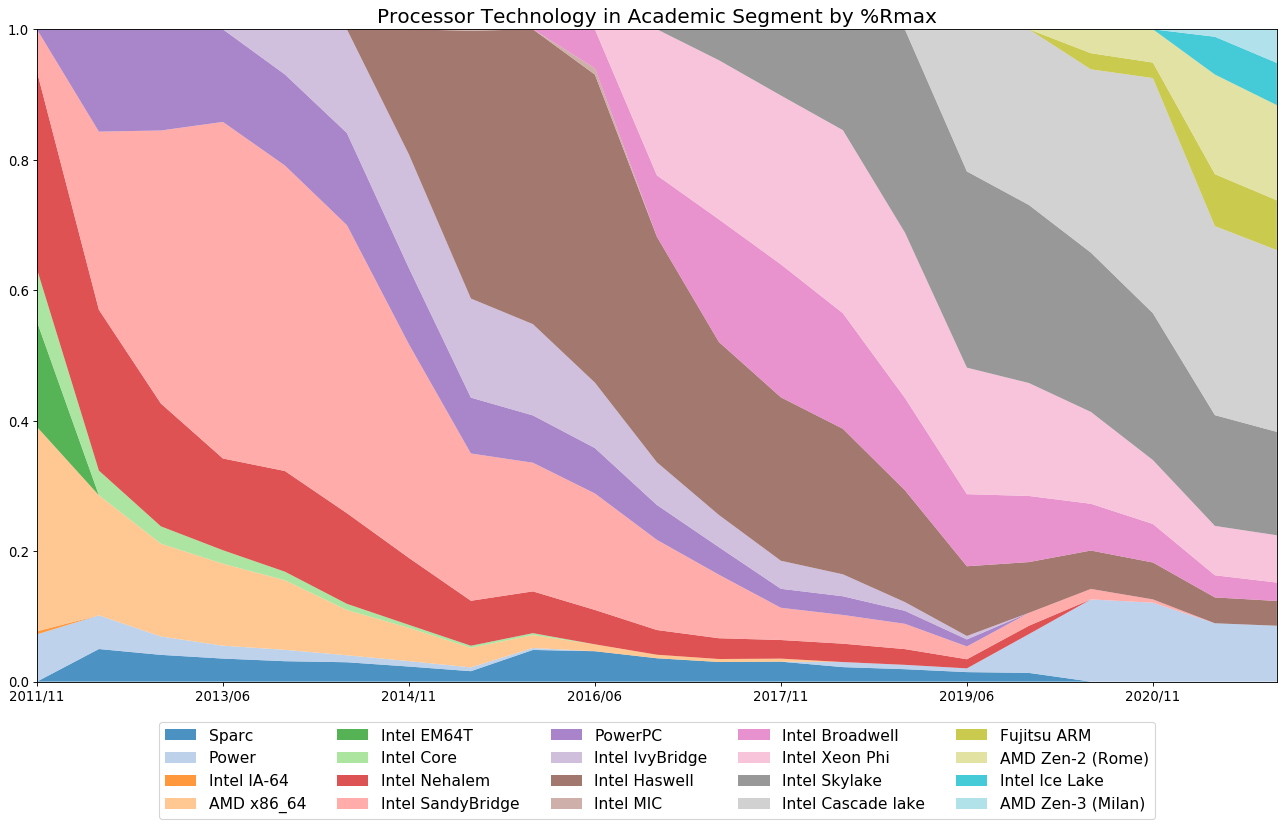

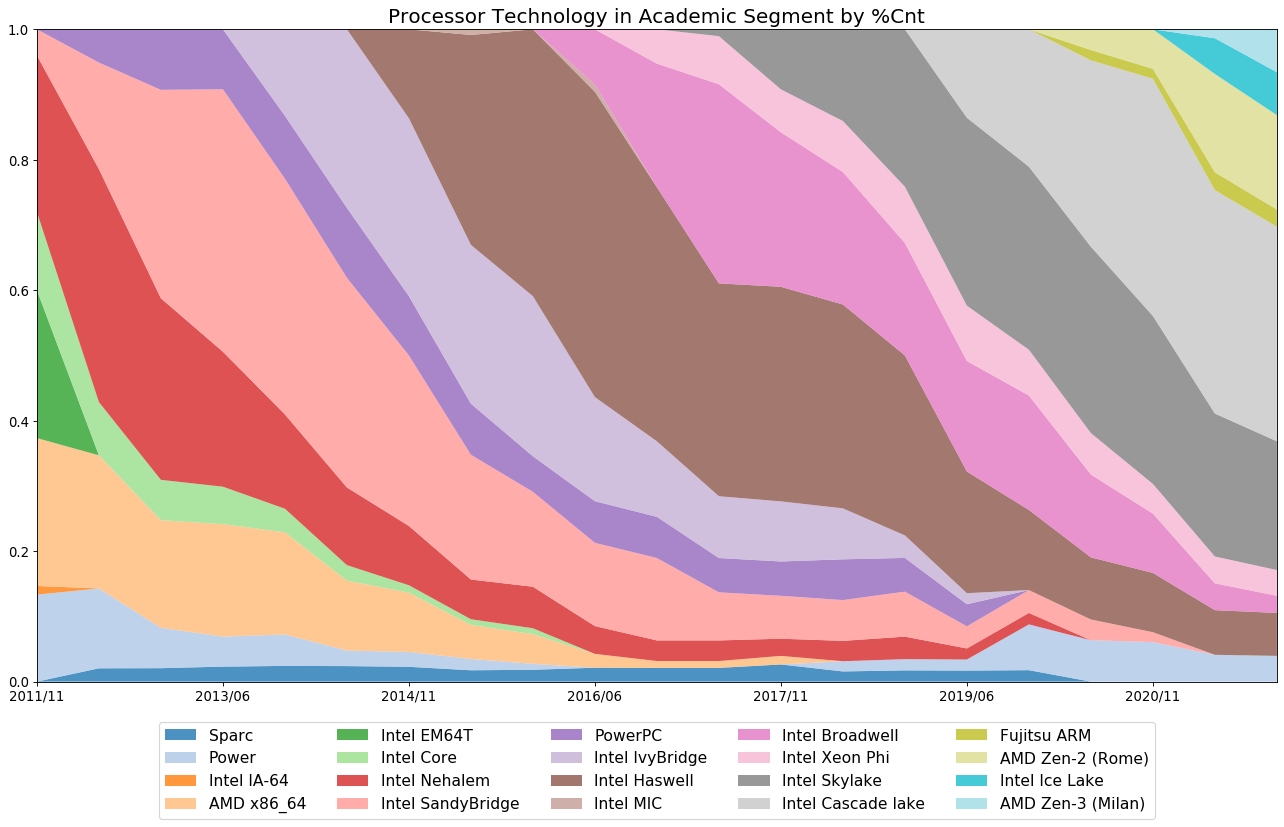

In [814]:
processor_academic_df = processor_end_df[processor_end_df['Segment'] == 'Academic']
res = get_statistics_by_column(processor_academic_df, 'Processor Company', data.keys())
build_plot(res, 'Processor Company in Academic Segment by %Rmax', '.* %Rmax$', 5)
build_plot(res, 'Processor Company in Academic Segment by %Cnt', '.* %Cnt$', 5)
res = get_statistics_by_column(processor_academic_df, 'Processor Technology', keys)
build_plot(res, 'Processor Technology in Academic Segment by %Rmax', '.* %Rmax$', 6)
build_plot(res, 'Processor Technology in Academic Segment by %Cnt', '.* %Cnt$', 5)